# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2020.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           198 non-null    float64
 1   Ln_M_stem_kg_m2       198 non-null    float64
 2   Ln_M_stem_bark_kg_m2  198 non-null    float64
 3   Ln_M_crown_kg_m2      198 non-null    float64
 4   Ln_M_foliage_kg_m2    198 non-null    float64
 5   Ln_M_AG_kg_m2         198 non-null    float64
 6   Ln_Cs_wood            198 non-null    float64
 7   Ln_Sr_wood            198 non-null    float64
 8   Ln_Tag_Cs             198 non-null    float64
 9   Ln_Tag_Sr             198 non-null    float64
 10  r2020B01              198 non-null    float64
 11  r2020B02              198 non-null    float64
 12  r2020B03              198 non-null    float64
 13  r2020B04              198 non-null    float64
 14  r2020B05              198 non-null    float64
 15  r2020B06              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_52219/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            123.0  304.699187  185.582068    2.0  150.5  319.0  457.5   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          123.0  11.991789  7.094609   0.05   6.285  12.37   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.645  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.234646,2.081717,-0.039242,0.171313,-0.953081,2.305758,6.052020,7.395960,-0.566667,2.342424,...,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.129652,1.126519,0.789675,0.588506,0.719719,0.931192,2.089707,2.070848,1.250989,0.939283,...,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.960000,1.812500,-0.190000,-0.025000,-1.525000,2.052500,4.300000,5.800000,-1.300000,1.700000,...,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.510000,2.420000,0.060000,0.310000,-0.690000,2.580000,6.400000,7.600000,-0.500000,2.500000,...,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.987500,2.807500,0.387500,0.530000,-0.360000,2.937500,7.400000,8.800000,0.400000,3.000000,...,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


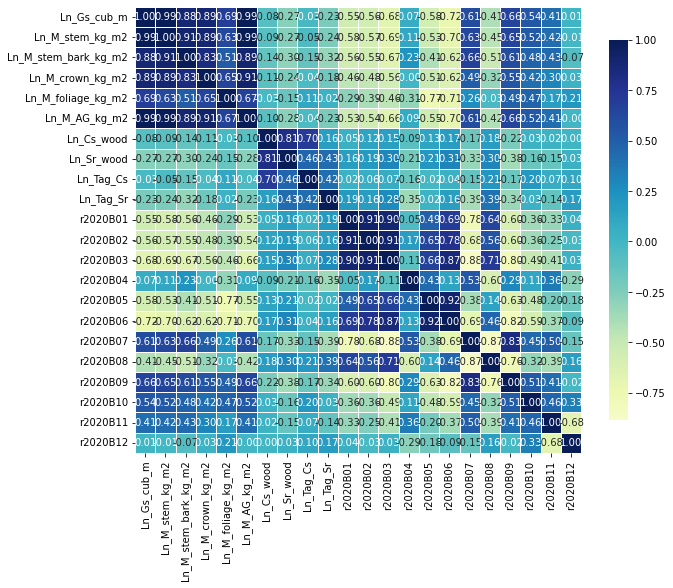

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2020B01', 'r2020B03', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B10', 'r2020B11'])
y = pd.DataFrame(select, columns= ['Ln_M_AG_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B03,r2020B05,r2020B06,r2020B07,r2020B10,r2020B11
0,0.019397,0.028616,0.175280,0.086611,0.797761,-15.527246,-11.385074
1,0.019167,0.022230,0.092225,0.047120,0.789129,-16.547673,-10.947565
2,0.019568,0.021190,0.093062,0.043824,0.812120,-14.341917,-11.884799
3,0.020556,0.025284,0.102872,0.048585,0.762431,-14.885610,-11.725163
4,0.019003,0.024911,0.096981,0.044880,0.793606,-14.647913,-11.512282


In [11]:
# Columns in "y" data collections
y.head()

,Ln_M_AG_kg_m2
0,1.91
1,2.63
2,2.70
3,2.78
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.14512246333049106, 0.4856957299326523, 0.13481951394520808]
    Mean: 0.255
    Std: 0.163

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.77501544 0.84439874 0.8763961 ]
    Mean: 0.832
    Std: 0.042

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5259487984035953, 0.5758146144946417, 0.6635674634846774]
    Mean: 0.588
    Std: 0.057

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.290 (std: 0.228)
Parameters: {'colsample_bytree': 0.19889386656261027, 'gamma': 0.4101907802915649, 'learning_rate': 0.04473444304408665, 'max_depth': 2, 'n_estimators': 114, 'subsample': 0.4126482988885791}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.10857539, 0.22338643, 0.40494814, ..., 0.70008297, 0.20080323,
       0.35772376]), 'std_fit_time': array([0.01480253, 0.01695459, 0.12574915, ..., 0.06537874, 0.01110088,
       0.02976274]), 'mean_score_time': array([0.00456562, 0.00469871, 0.00470834, ..., 0.00661993, 0.00691314,
       0.0059001 ]), 'std_score_time': array([0.00012717, 0.0001632 , 0.00013231, ..., 0.0022937 , 0.00157975,
       0.00060589]), 'param_colsample_bytree': masked_array(data=[0.32094131463811737, 0.9191339718194123,
                   0.5645391132647136, ..., 0.4173975858487754,
                   0.2747210541312411, 0.7241169770221955],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.20852280460199035, 0.2468556933662241,
                   0.4849492207827636, ..., 0.42946800479050123,
                   0.3452384170634575, 0.28491577371229077],
             mask=[False, Fal

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.19889386656261027
Gamma: 0.4101907802915649
Learning_rate: 0.04473444304408665
Max_depth: 2
N_estimators: 114
Subsample: 0.4126482988885791


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.92975	validation_1-rmse:2.06116
[1]	validation_0-rmse:1.85631	validation_1-rmse:1.98536
[2]	validation_0-rmse:1.78790	validation_1-rmse:1.91189
[3]	validation_0-rmse:1.72644	validation_1-rmse:1.84728
[4]	validation_0-rmse:1.67006	validation_1-rmse:1.78416
[5]	validation_0-rmse:1.61374	validation_1-rmse:1.72206


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.56367	validation_1-rmse:1.66875
[7]	validation_0-rmse:1.50822	validation_1-rmse:1.61040
[8]	validation_0-rmse:1.45723	validation_1-rmse:1.55500
[9]	validation_0-rmse:1.40874	validation_1-rmse:1.50160
[10]	validation_0-rmse:1.36514	validation_1-rmse:1.45273
[11]	validation_0-rmse:1.32165	validation_1-rmse:1.40268
[12]	validation_0-rmse:1.27878	validation_1-rmse:1.35572
[13]	validation_0-rmse:1.24499	validation_1-rmse:1.31595
[14]	validation_0-rmse:1.20725	validation_1-rmse:1.27513
[15]	validation_0-rmse:1.17391	validation_1-rmse:1.23627
[16]	validation_0-rmse:1.14121	validation_1-rmse:1.20099
[17]	validation_0-rmse:1.10816	validation_1-rmse:1.16376
[18]	validation_0-rmse:1.08010	validation_1-rmse:1.13531
[19]	validation_0-rmse:1.05460	validation_1-rmse:1.10704
[20]	validation_0-rmse:1.02754	validation_1-rmse:1.07405
[21]	validation_0-rmse:1.00220	validation_1-rmse:1.05801
[22]	validation_0-rmse:0.97867	validation_1-rmse:1.02991
[23]	validation_0-rmse:0.95778	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11113	validation_1-rmse:1.10790
[18]	validation_0-rmse:1.08690	validation_1-rmse:1.08161
[19]	validation_0-rmse:1.05591	validation_1-rmse:1.05389
[20]	validation_0-rmse:1.02759	validation_1-rmse:1.02281
[21]	validation_0-rmse:0.99896	validation_1-rmse:0.99500
[22]	validation_0-rmse:0.97183	validation_1-rmse:0.96985
[23]	validation_0-rmse:0.94733	validation_1-rmse:0.94460
[24]	validation_0-rmse:0.92583	validation_1-rmse:0.92566
[25]	validation_0-rmse:0.90168	validation_1-rmse:0.90192
[26]	validation_0-rmse:0.87982	validation_1-rmse:0.88157
[27]	validation_0-rmse:0.86200	validation_1-rmse:0.86346
[28]	validation_0-rmse:0.84807	validation_1-rmse:0.84852
[29]	validation_0-rmse:0.83052	validation_1-rmse:0.83024
[30]	validation_0-rmse:0.81361	validation_1-rmse:0.81783
[31]	validation_0-rmse:0.80146	validation_1-rmse:0.80650
[32]	validation_0-rmse:0.78700	validation_1-rmse:0.79248
[33]	validation_0-rmse:0.77475	validation_1-rmse:0.78132
[34]	validation_0-rmse:0.76307	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09872	validation_1-rmse:1.06080
[18]	validation_0-rmse:1.07021	validation_1-rmse:1.03303
[19]	validation_0-rmse:1.04402	validation_1-rmse:1.00685
[20]	validation_0-rmse:1.01974	validation_1-rmse:0.98725
[21]	validation_0-rmse:0.99844	validation_1-rmse:0.96681
[22]	validation_0-rmse:0.97480	validation_1-rmse:0.94288
[23]	validation_0-rmse:0.94957	validation_1-rmse:0.92090
[24]	validation_0-rmse:0.92954	validation_1-rmse:0.90151
[25]	validation_0-rmse:0.90690	validation_1-rmse:0.87925
[26]	validation_0-rmse:0.89188	validation_1-rmse:0.86252
[27]	validation_0-rmse:0.87345	validation_1-rmse:0.84431
[28]	validation_0-rmse:0.85821	validation_1-rmse:0.83001
[29]	validation_0-rmse:0.83883	validation_1-rmse:0.81200
[30]	validation_0-rmse:0.82704	validation_1-rmse:0.80052
[31]	validation_0-rmse:0.81334	validation_1-rmse:0.78736
[32]	validation_0-rmse:0.79769	validation_1-rmse:0.77255
[33]	validation_0-rmse:0.78803	validation_1-rmse:0.76379
[34]	validation_0-rmse:0.77644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09220	validation_1-rmse:1.12070
[18]	validation_0-rmse:1.06498	validation_1-rmse:1.10057
[19]	validation_0-rmse:1.03533	validation_1-rmse:1.07731
[20]	validation_0-rmse:1.00560	validation_1-rmse:1.05153
[21]	validation_0-rmse:0.98246	validation_1-rmse:1.03219
[22]	validation_0-rmse:0.95671	validation_1-rmse:1.01067
[23]	validation_0-rmse:0.93079	validation_1-rmse:0.99198
[24]	validation_0-rmse:0.90974	validation_1-rmse:0.97405
[25]	validation_0-rmse:0.89007	validation_1-rmse:0.96143
[26]	validation_0-rmse:0.87428	validation_1-rmse:0.94915
[27]	validation_0-rmse:0.85537	validation_1-rmse:0.93505
[28]	validation_0-rmse:0.83910	validation_1-rmse:0.92442
[29]	validation_0-rmse:0.81851	validation_1-rmse:0.91086
[30]	validation_0-rmse:0.80349	validation_1-rmse:0.90139
[31]	validation_0-rmse:0.78967	validation_1-rmse:0.89340
[32]	validation_0-rmse:0.77259	validation_1-rmse:0.88303
[33]	validation_0-rmse:0.75985	validation_1-rmse:0.87318
[34]	validation_0-rmse:0.74849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.26092	validation_1-rmse:1.36944
[13]	validation_0-rmse:1.22048	validation_1-rmse:1.33693
[14]	validation_0-rmse:1.18025	validation_1-rmse:1.30555
[15]	validation_0-rmse:1.14142	validation_1-rmse:1.27892
[16]	validation_0-rmse:1.10624	validation_1-rmse:1.25153
[17]	validation_0-rmse:1.07189	validation_1-rmse:1.22269
[18]	validation_0-rmse:1.04240	validation_1-rmse:1.20230
[19]	validation_0-rmse:1.01171	validation_1-rmse:1.18081
[20]	validation_0-rmse:0.98479	validation_1-rmse:1.16082
[21]	validation_0-rmse:0.95581	validation_1-rmse:1.13973
[22]	validation_0-rmse:0.92644	validation_1-rmse:1.11934
[23]	validation_0-rmse:0.90092	validation_1-rmse:1.10206
[24]	validation_0-rmse:0.87748	validation_1-rmse:1.08826
[25]	validation_0-rmse:0.85259	validation_1-rmse:1.07063
[26]	validation_0-rmse:0.83371	validation_1-rmse:1.05730
[27]	validation_0-rmse:0.81427	validation_1-rmse:1.04704
[28]	validation_0-rmse:0.79799	validation_1-rmse:1.03840
[29]	validation_0-rmse:0.77958	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89236	validation_1-rmse:0.94776
[27]	validation_0-rmse:0.87340	validation_1-rmse:0.92937
[28]	validation_0-rmse:0.86059	validation_1-rmse:0.92012
[29]	validation_0-rmse:0.84286	validation_1-rmse:0.90690
[30]	validation_0-rmse:0.82657	validation_1-rmse:0.89066
[31]	validation_0-rmse:0.81269	validation_1-rmse:0.87733
[32]	validation_0-rmse:0.79724	validation_1-rmse:0.86252
[33]	validation_0-rmse:0.78649	validation_1-rmse:0.84919
[34]	validation_0-rmse:0.77483	validation_1-rmse:0.83894
[35]	validation_0-rmse:0.76342	validation_1-rmse:0.83079
[36]	validation_0-rmse:0.75295	validation_1-rmse:0.82327
[37]	validation_0-rmse:0.74047	validation_1-rmse:0.81315
[38]	validation_0-rmse:0.73139	validation_1-rmse:0.80720
[39]	validation_0-rmse:0.72496	validation_1-rmse:0.80270
[40]	validation_0-rmse:0.71895	validation_1-rmse:0.80205
[41]	validation_0-rmse:0.70938	validation_1-rmse:0.79306
[42]	validation_0-rmse:0.69916	validation_1-rmse:0.78510
[43]	validation_0-rmse:0.69477	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04958	validation_1-rmse:1.06323
[20]	validation_0-rmse:1.02364	validation_1-rmse:1.03802
[21]	validation_0-rmse:0.99983	validation_1-rmse:1.01101
[22]	validation_0-rmse:0.97458	validation_1-rmse:0.98490
[23]	validation_0-rmse:0.95005	validation_1-rmse:0.96003
[24]	validation_0-rmse:0.92893	validation_1-rmse:0.93821
[25]	validation_0-rmse:0.91034	validation_1-rmse:0.91969
[26]	validation_0-rmse:0.89454	validation_1-rmse:0.90295
[27]	validation_0-rmse:0.87825	validation_1-rmse:0.88608
[28]	validation_0-rmse:0.86207	validation_1-rmse:0.87068
[29]	validation_0-rmse:0.84648	validation_1-rmse:0.85511
[30]	validation_0-rmse:0.83126	validation_1-rmse:0.84065
[31]	validation_0-rmse:0.81712	validation_1-rmse:0.82710
[32]	validation_0-rmse:0.80309	validation_1-rmse:0.81183
[33]	validation_0-rmse:0.79173	validation_1-rmse:0.79612
[34]	validation_0-rmse:0.78193	validation_1-rmse:0.78428
[35]	validation_0-rmse:0.77180	validation_1-rmse:0.77192
[36]	validation_0-rmse:0.76280	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.26554	validation_1-rmse:1.35417
[13]	validation_0-rmse:1.23139	validation_1-rmse:1.33090
[14]	validation_0-rmse:1.19516	validation_1-rmse:1.29967
[15]	validation_0-rmse:1.15743	validation_1-rmse:1.26750
[16]	validation_0-rmse:1.11820	validation_1-rmse:1.23417
[17]	validation_0-rmse:1.08560	validation_1-rmse:1.20448
[18]	validation_0-rmse:1.05450	validation_1-rmse:1.18448
[19]	validation_0-rmse:1.02984	validation_1-rmse:1.16498
[20]	validation_0-rmse:1.00315	validation_1-rmse:1.14155
[21]	validation_0-rmse:0.97696	validation_1-rmse:1.11904
[22]	validation_0-rmse:0.95165	validation_1-rmse:1.09592
[23]	validation_0-rmse:0.92928	validation_1-rmse:1.08290
[24]	validation_0-rmse:0.90654	validation_1-rmse:1.06346
[25]	validation_0-rmse:0.88124	validation_1-rmse:1.04380
[26]	validation_0-rmse:0.86221	validation_1-rmse:1.02868
[27]	validation_0-rmse:0.84397	validation_1-rmse:1.01435
[28]	validation_0-rmse:0.82861	validation_1-rmse:1.00458
[29]	validation_0-rmse:0.81361	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.16678	validation_1-rmse:1.32122
[15]	validation_0-rmse:1.12974	validation_1-rmse:1.28967
[16]	validation_0-rmse:1.09224	validation_1-rmse:1.25621
[17]	validation_0-rmse:1.05660	validation_1-rmse:1.22627
[18]	validation_0-rmse:1.02953	validation_1-rmse:1.20744
[19]	validation_0-rmse:1.00180	validation_1-rmse:1.18307
[20]	validation_0-rmse:0.97521	validation_1-rmse:1.16117
[21]	validation_0-rmse:0.94973	validation_1-rmse:1.13935
[22]	validation_0-rmse:0.92436	validation_1-rmse:1.11868
[23]	validation_0-rmse:0.90033	validation_1-rmse:1.09862
[24]	validation_0-rmse:0.88008	validation_1-rmse:1.08268
[25]	validation_0-rmse:0.86069	validation_1-rmse:1.06837
[26]	validation_0-rmse:0.84319	validation_1-rmse:1.05609
[27]	validation_0-rmse:0.82414	validation_1-rmse:1.04212
[28]	validation_0-rmse:0.80924	validation_1-rmse:1.03456
[29]	validation_0-rmse:0.78868	validation_1-rmse:1.02032
[30]	validation_0-rmse:0.77296	validation_1-rmse:1.00689
[31]	validation_0-rmse:0.75968	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.06120	validation_1-rmse:1.12778
[19]	validation_0-rmse:1.03681	validation_1-rmse:1.10698
[20]	validation_0-rmse:1.00950	validation_1-rmse:1.08119
[21]	validation_0-rmse:0.98411	validation_1-rmse:1.05542
[22]	validation_0-rmse:0.95853	validation_1-rmse:1.03196
[23]	validation_0-rmse:0.93397	validation_1-rmse:1.00851
[24]	validation_0-rmse:0.91399	validation_1-rmse:0.98980
[25]	validation_0-rmse:0.88962	validation_1-rmse:0.96555
[26]	validation_0-rmse:0.86913	validation_1-rmse:0.94512
[27]	validation_0-rmse:0.85141	validation_1-rmse:0.92812
[28]	validation_0-rmse:0.83808	validation_1-rmse:0.91417
[29]	validation_0-rmse:0.82043	validation_1-rmse:0.89935
[30]	validation_0-rmse:0.80379	validation_1-rmse:0.88253
[31]	validation_0-rmse:0.79310	validation_1-rmse:0.87288
[32]	validation_0-rmse:0.77975	validation_1-rmse:0.86118
[33]	validation_0-rmse:0.76955	validation_1-rmse:0.85110
[34]	validation_0-rmse:0.76051	validation_1-rmse:0.83987
[35]	validation_0-rmse:0.74967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.35130	validation_1-rmse:1.42467
[11]	validation_0-rmse:1.30861	validation_1-rmse:1.38261
[12]	validation_0-rmse:1.26401	validation_1-rmse:1.33688
[13]	validation_0-rmse:1.22310	validation_1-rmse:1.29575
[14]	validation_0-rmse:1.18846	validation_1-rmse:1.25942
[15]	validation_0-rmse:1.15307	validation_1-rmse:1.22238
[16]	validation_0-rmse:1.11582	validation_1-rmse:1.18592
[17]	validation_0-rmse:1.08887	validation_1-rmse:1.15920
[18]	validation_0-rmse:1.06267	validation_1-rmse:1.13237
[19]	validation_0-rmse:1.03230	validation_1-rmse:1.10271
[20]	validation_0-rmse:1.00803	validation_1-rmse:1.07770
[21]	validation_0-rmse:0.98088	validation_1-rmse:1.05052
[22]	validation_0-rmse:0.96067	validation_1-rmse:1.03038
[23]	validation_0-rmse:0.93432	validation_1-rmse:1.00297
[24]	validation_0-rmse:0.91404	validation_1-rmse:0.98585
[25]	validation_0-rmse:0.89245	validation_1-rmse:0.96528
[26]	validation_0-rmse:0.87291	validation_1-rmse:0.94759
[27]	validation_0-rmse:0.85369	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.10462	validation_1-rmse:1.15368
[18]	validation_0-rmse:1.07425	validation_1-rmse:1.12491
[19]	validation_0-rmse:1.04534	validation_1-rmse:1.09511
[20]	validation_0-rmse:1.01814	validation_1-rmse:1.06910
[21]	validation_0-rmse:0.98862	validation_1-rmse:1.03923
[22]	validation_0-rmse:0.96311	validation_1-rmse:1.01491
[23]	validation_0-rmse:0.94129	validation_1-rmse:0.99475
[24]	validation_0-rmse:0.91744	validation_1-rmse:0.97097
[25]	validation_0-rmse:0.89263	validation_1-rmse:0.94769
[26]	validation_0-rmse:0.87163	validation_1-rmse:0.92792
[27]	validation_0-rmse:0.85082	validation_1-rmse:0.90771
[28]	validation_0-rmse:0.83439	validation_1-rmse:0.89262
[29]	validation_0-rmse:0.81935	validation_1-rmse:0.87764
[30]	validation_0-rmse:0.80302	validation_1-rmse:0.86151
[31]	validation_0-rmse:0.78920	validation_1-rmse:0.85162
[32]	validation_0-rmse:0.77460	validation_1-rmse:0.83805
[33]	validation_0-rmse:0.76561	validation_1-rmse:0.82717
[34]	validation_0-rmse:0.75393	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04938	validation_1-rmse:0.92201
[20]	validation_0-rmse:1.02430	validation_1-rmse:0.89741
[21]	validation_0-rmse:1.00195	validation_1-rmse:0.87475
[22]	validation_0-rmse:0.98265	validation_1-rmse:0.85709
[23]	validation_0-rmse:0.95764	validation_1-rmse:0.83285
[24]	validation_0-rmse:0.93835	validation_1-rmse:0.81484
[25]	validation_0-rmse:0.92070	validation_1-rmse:0.80008
[26]	validation_0-rmse:0.90281	validation_1-rmse:0.78316
[27]	validation_0-rmse:0.88843	validation_1-rmse:0.76932
[28]	validation_0-rmse:0.87476	validation_1-rmse:0.75617
[29]	validation_0-rmse:0.85736	validation_1-rmse:0.74175
[30]	validation_0-rmse:0.84029	validation_1-rmse:0.73096
[31]	validation_0-rmse:0.82632	validation_1-rmse:0.71611
[32]	validation_0-rmse:0.81118	validation_1-rmse:0.70528
[33]	validation_0-rmse:0.80027	validation_1-rmse:0.69557
[34]	validation_0-rmse:0.78788	validation_1-rmse:0.68512
[35]	validation_0-rmse:0.77858	validation_1-rmse:0.67692
[36]	validation_0-rmse:0.77182	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.27617	validation_1-rmse:1.30942
[13]	validation_0-rmse:1.23801	validation_1-rmse:1.27426
[14]	validation_0-rmse:1.20073	validation_1-rmse:1.23648
[15]	validation_0-rmse:1.16163	validation_1-rmse:1.19598
[16]	validation_0-rmse:1.12621	validation_1-rmse:1.16720
[17]	validation_0-rmse:1.09547	validation_1-rmse:1.13407
[18]	validation_0-rmse:1.06683	validation_1-rmse:1.10591
[19]	validation_0-rmse:1.04045	validation_1-rmse:1.08067
[20]	validation_0-rmse:1.01226	validation_1-rmse:1.05377
[21]	validation_0-rmse:0.98631	validation_1-rmse:1.02735
[22]	validation_0-rmse:0.96345	validation_1-rmse:1.00154
[23]	validation_0-rmse:0.93973	validation_1-rmse:0.97467
[24]	validation_0-rmse:0.91750	validation_1-rmse:0.95319
[25]	validation_0-rmse:0.89122	validation_1-rmse:0.92725
[26]	validation_0-rmse:0.87461	validation_1-rmse:0.90975
[27]	validation_0-rmse:0.85845	validation_1-rmse:0.89724
[28]	validation_0-rmse:0.84634	validation_1-rmse:0.89101
[29]	validation_0-rmse:0.82823	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.15262	validation_1-rmse:1.01925
[17]	validation_0-rmse:1.12285	validation_1-rmse:0.99328
[18]	validation_0-rmse:1.09463	validation_1-rmse:0.96681
[19]	validation_0-rmse:1.06576	validation_1-rmse:0.93883
[20]	validation_0-rmse:1.03675	validation_1-rmse:0.91219
[21]	validation_0-rmse:1.00834	validation_1-rmse:0.88454
[22]	validation_0-rmse:0.98322	validation_1-rmse:0.86277
[23]	validation_0-rmse:0.95891	validation_1-rmse:0.84165
[24]	validation_0-rmse:0.93987	validation_1-rmse:0.82764
[25]	validation_0-rmse:0.92083	validation_1-rmse:0.81099
[26]	validation_0-rmse:0.89925	validation_1-rmse:0.79346
[27]	validation_0-rmse:0.88600	validation_1-rmse:0.78093
[28]	validation_0-rmse:0.87238	validation_1-rmse:0.76752
[29]	validation_0-rmse:0.85267	validation_1-rmse:0.75380
[30]	validation_0-rmse:0.84065	validation_1-rmse:0.74441
[31]	validation_0-rmse:0.82640	validation_1-rmse:0.73281
[32]	validation_0-rmse:0.81338	validation_1-rmse:0.72547
[33]	validation_0-rmse:0.80137	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00929	validation_1-rmse:1.10400
[21]	validation_0-rmse:0.98707	validation_1-rmse:1.07810
[22]	validation_0-rmse:0.96436	validation_1-rmse:1.05754
[23]	validation_0-rmse:0.94133	validation_1-rmse:1.04000
[24]	validation_0-rmse:0.92174	validation_1-rmse:1.02281
[25]	validation_0-rmse:0.89573	validation_1-rmse:1.00228
[26]	validation_0-rmse:0.87250	validation_1-rmse:0.97891
[27]	validation_0-rmse:0.85274	validation_1-rmse:0.96514
[28]	validation_0-rmse:0.83747	validation_1-rmse:0.94752
[29]	validation_0-rmse:0.81875	validation_1-rmse:0.93293
[30]	validation_0-rmse:0.80558	validation_1-rmse:0.92131
[31]	validation_0-rmse:0.79319	validation_1-rmse:0.91256
[32]	validation_0-rmse:0.77612	validation_1-rmse:0.89834
[33]	validation_0-rmse:0.76415	validation_1-rmse:0.88478
[34]	validation_0-rmse:0.75220	validation_1-rmse:0.87026
[35]	validation_0-rmse:0.74229	validation_1-rmse:0.86231
[36]	validation_0-rmse:0.73276	validation_1-rmse:0.85661
[37]	validation_0-rmse:0.72304	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.19652	validation_1-rmse:1.18013
[15]	validation_0-rmse:1.16023	validation_1-rmse:1.15266
[16]	validation_0-rmse:1.12502	validation_1-rmse:1.12534
[17]	validation_0-rmse:1.09353	validation_1-rmse:1.10077
[18]	validation_0-rmse:1.06317	validation_1-rmse:1.07735
[19]	validation_0-rmse:1.03491	validation_1-rmse:1.05394
[20]	validation_0-rmse:1.00519	validation_1-rmse:1.03243
[21]	validation_0-rmse:0.98077	validation_1-rmse:1.01397
[22]	validation_0-rmse:0.95313	validation_1-rmse:0.99460
[23]	validation_0-rmse:0.92970	validation_1-rmse:0.97813
[24]	validation_0-rmse:0.90453	validation_1-rmse:0.96070
[25]	validation_0-rmse:0.87991	validation_1-rmse:0.94328
[26]	validation_0-rmse:0.85811	validation_1-rmse:0.92861
[27]	validation_0-rmse:0.84219	validation_1-rmse:0.92100
[28]	validation_0-rmse:0.82620	validation_1-rmse:0.91316
[29]	validation_0-rmse:0.81005	validation_1-rmse:0.90566
[30]	validation_0-rmse:0.79171	validation_1-rmse:0.89416
[31]	validation_0-rmse:0.77890	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99627	validation_1-rmse:1.03542
[22]	validation_0-rmse:0.97222	validation_1-rmse:1.01473
[23]	validation_0-rmse:0.94734	validation_1-rmse:0.99072
[24]	validation_0-rmse:0.92588	validation_1-rmse:0.97416
[25]	validation_0-rmse:0.90770	validation_1-rmse:0.95718
[26]	validation_0-rmse:0.89376	validation_1-rmse:0.94781
[27]	validation_0-rmse:0.87484	validation_1-rmse:0.93832
[28]	validation_0-rmse:0.85713	validation_1-rmse:0.92469
[29]	validation_0-rmse:0.83594	validation_1-rmse:0.90642
[30]	validation_0-rmse:0.81936	validation_1-rmse:0.89385
[31]	validation_0-rmse:0.80377	validation_1-rmse:0.87862
[32]	validation_0-rmse:0.78885	validation_1-rmse:0.86480
[33]	validation_0-rmse:0.77661	validation_1-rmse:0.85619
[34]	validation_0-rmse:0.76632	validation_1-rmse:0.84682
[35]	validation_0-rmse:0.75298	validation_1-rmse:0.83834
[36]	validation_0-rmse:0.74301	validation_1-rmse:0.83123
[37]	validation_0-rmse:0.73164	validation_1-rmse:0.81971
[38]	validation_0-rmse:0.72496	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.21770	validation_1-rmse:1.20871
[15]	validation_0-rmse:1.18148	validation_1-rmse:1.17449
[16]	validation_0-rmse:1.14307	validation_1-rmse:1.13130
[17]	validation_0-rmse:1.11172	validation_1-rmse:1.09986
[18]	validation_0-rmse:1.08320	validation_1-rmse:1.07883
[19]	validation_0-rmse:1.05287	validation_1-rmse:1.04805
[20]	validation_0-rmse:1.02585	validation_1-rmse:1.02300
[21]	validation_0-rmse:1.00339	validation_1-rmse:0.99978
[22]	validation_0-rmse:0.97887	validation_1-rmse:0.97515
[23]	validation_0-rmse:0.95611	validation_1-rmse:0.95123
[24]	validation_0-rmse:0.93268	validation_1-rmse:0.92929
[25]	validation_0-rmse:0.91247	validation_1-rmse:0.91046
[26]	validation_0-rmse:0.89087	validation_1-rmse:0.89284
[27]	validation_0-rmse:0.87039	validation_1-rmse:0.87374
[28]	validation_0-rmse:0.85849	validation_1-rmse:0.86436
[29]	validation_0-rmse:0.84176	validation_1-rmse:0.84848
[30]	validation_0-rmse:0.82608	validation_1-rmse:0.83114
[31]	validation_0-rmse:0.81674	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.43638	validation_1-rmse:1.57658
[9]	validation_0-rmse:1.38444	validation_1-rmse:1.52725
[10]	validation_0-rmse:1.33996	validation_1-rmse:1.48628
[11]	validation_0-rmse:1.29216	validation_1-rmse:1.44145
[12]	validation_0-rmse:1.25154	validation_1-rmse:1.40523
[13]	validation_0-rmse:1.21504	validation_1-rmse:1.37245
[14]	validation_0-rmse:1.17471	validation_1-rmse:1.33534
[15]	validation_0-rmse:1.14192	validation_1-rmse:1.30328
[16]	validation_0-rmse:1.10450	validation_1-rmse:1.26683
[17]	validation_0-rmse:1.07129	validation_1-rmse:1.24055
[18]	validation_0-rmse:1.04068	validation_1-rmse:1.21382
[19]	validation_0-rmse:1.01034	validation_1-rmse:1.18506
[20]	validation_0-rmse:0.98274	validation_1-rmse:1.16041
[21]	validation_0-rmse:0.95909	validation_1-rmse:1.14174
[22]	validation_0-rmse:0.93714	validation_1-rmse:1.12378
[23]	validation_0-rmse:0.91198	validation_1-rmse:1.10395
[24]	validation_0-rmse:0.89095	validation_1-rmse:1.08648
[25]	validation_0-rmse:0.87006	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.07892	validation_1-rmse:1.14652
[19]	validation_0-rmse:1.05065	validation_1-rmse:1.11410
[20]	validation_0-rmse:1.02023	validation_1-rmse:1.07891
[21]	validation_0-rmse:0.99894	validation_1-rmse:1.05397
[22]	validation_0-rmse:0.97642	validation_1-rmse:1.02873
[23]	validation_0-rmse:0.95270	validation_1-rmse:0.99805
[24]	validation_0-rmse:0.93487	validation_1-rmse:0.97772
[25]	validation_0-rmse:0.91466	validation_1-rmse:0.95776
[26]	validation_0-rmse:0.89766	validation_1-rmse:0.93842
[27]	validation_0-rmse:0.87734	validation_1-rmse:0.92506
[28]	validation_0-rmse:0.86184	validation_1-rmse:0.90650
[29]	validation_0-rmse:0.84411	validation_1-rmse:0.88526
[30]	validation_0-rmse:0.83019	validation_1-rmse:0.86765
[31]	validation_0-rmse:0.81695	validation_1-rmse:0.85006
[32]	validation_0-rmse:0.80268	validation_1-rmse:0.83614
[33]	validation_0-rmse:0.78957	validation_1-rmse:0.81759
[34]	validation_0-rmse:0.77943	validation_1-rmse:0.80476
[35]	validation_0-rmse:0.76944	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.09303	validation_1-rmse:1.10179
[19]	validation_0-rmse:1.06240	validation_1-rmse:1.07474
[20]	validation_0-rmse:1.03284	validation_1-rmse:1.04605
[21]	validation_0-rmse:1.01337	validation_1-rmse:1.02468
[22]	validation_0-rmse:0.98823	validation_1-rmse:0.99952
[23]	validation_0-rmse:0.96392	validation_1-rmse:0.97549
[24]	validation_0-rmse:0.94450	validation_1-rmse:0.95845
[25]	validation_0-rmse:0.92464	validation_1-rmse:0.94054
[26]	validation_0-rmse:0.90236	validation_1-rmse:0.91854
[27]	validation_0-rmse:0.88189	validation_1-rmse:0.89979
[28]	validation_0-rmse:0.86730	validation_1-rmse:0.88690
[29]	validation_0-rmse:0.85117	validation_1-rmse:0.87530
[30]	validation_0-rmse:0.83510	validation_1-rmse:0.86329
[31]	validation_0-rmse:0.82383	validation_1-rmse:0.85137
[32]	validation_0-rmse:0.80817	validation_1-rmse:0.83654
[33]	validation_0-rmse:0.79426	validation_1-rmse:0.82601
[34]	validation_0-rmse:0.78195	validation_1-rmse:0.81430
[35]	validation_0-rmse:0.77169	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97639	validation_1-rmse:1.00205
[22]	validation_0-rmse:0.94915	validation_1-rmse:0.98195
[23]	validation_0-rmse:0.92757	validation_1-rmse:0.96832
[24]	validation_0-rmse:0.90685	validation_1-rmse:0.95333
[25]	validation_0-rmse:0.88590	validation_1-rmse:0.94002
[26]	validation_0-rmse:0.86660	validation_1-rmse:0.92526
[27]	validation_0-rmse:0.84851	validation_1-rmse:0.91315
[28]	validation_0-rmse:0.83409	validation_1-rmse:0.90371
[29]	validation_0-rmse:0.81567	validation_1-rmse:0.89217
[30]	validation_0-rmse:0.79700	validation_1-rmse:0.88158
[31]	validation_0-rmse:0.78273	validation_1-rmse:0.87522
[32]	validation_0-rmse:0.76621	validation_1-rmse:0.86233
[33]	validation_0-rmse:0.75568	validation_1-rmse:0.85822
[34]	validation_0-rmse:0.74192	validation_1-rmse:0.85112
[35]	validation_0-rmse:0.73099	validation_1-rmse:0.84271
[36]	validation_0-rmse:0.72223	validation_1-rmse:0.83820
[37]	validation_0-rmse:0.71204	validation_1-rmse:0.83631
[38]	validation_0-rmse:0.70464	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.21012	validation_1-rmse:1.08632
[16]	validation_0-rmse:1.17172	validation_1-rmse:1.05103
[17]	validation_0-rmse:1.13609	validation_1-rmse:1.01551
[18]	validation_0-rmse:1.10889	validation_1-rmse:0.98550
[19]	validation_0-rmse:1.08051	validation_1-rmse:0.96373
[20]	validation_0-rmse:1.05216	validation_1-rmse:0.93605
[21]	validation_0-rmse:1.02869	validation_1-rmse:0.91095
[22]	validation_0-rmse:1.00317	validation_1-rmse:0.88253
[23]	validation_0-rmse:0.98281	validation_1-rmse:0.86065
[24]	validation_0-rmse:0.96161	validation_1-rmse:0.83903
[25]	validation_0-rmse:0.94168	validation_1-rmse:0.81719
[26]	validation_0-rmse:0.92383	validation_1-rmse:0.80097
[27]	validation_0-rmse:0.90539	validation_1-rmse:0.78291
[28]	validation_0-rmse:0.88910	validation_1-rmse:0.76566
[29]	validation_0-rmse:0.87093	validation_1-rmse:0.74993
[30]	validation_0-rmse:0.85410	validation_1-rmse:0.73536
[31]	validation_0-rmse:0.84224	validation_1-rmse:0.72266
[32]	validation_0-rmse:0.82916	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.05914	validation_1-rmse:1.13868
[19]	validation_0-rmse:1.03432	validation_1-rmse:1.11449
[20]	validation_0-rmse:1.00648	validation_1-rmse:1.09288
[21]	validation_0-rmse:0.97993	validation_1-rmse:1.07507
[22]	validation_0-rmse:0.95525	validation_1-rmse:1.05633
[23]	validation_0-rmse:0.93179	validation_1-rmse:1.03979
[24]	validation_0-rmse:0.91047	validation_1-rmse:1.02104
[25]	validation_0-rmse:0.88792	validation_1-rmse:1.00578
[26]	validation_0-rmse:0.86687	validation_1-rmse:0.98620
[27]	validation_0-rmse:0.84799	validation_1-rmse:0.97101
[28]	validation_0-rmse:0.83043	validation_1-rmse:0.95565
[29]	validation_0-rmse:0.81361	validation_1-rmse:0.94492
[30]	validation_0-rmse:0.79659	validation_1-rmse:0.93244
[31]	validation_0-rmse:0.78373	validation_1-rmse:0.92345
[32]	validation_0-rmse:0.76580	validation_1-rmse:0.90912
[33]	validation_0-rmse:0.75464	validation_1-rmse:0.89978
[34]	validation_0-rmse:0.74266	validation_1-rmse:0.89181
[35]	validation_0-rmse:0.73237	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.26919	validation_1-rmse:1.18454
[14]	validation_0-rmse:1.22833	validation_1-rmse:1.14583
[15]	validation_0-rmse:1.19397	validation_1-rmse:1.11066
[16]	validation_0-rmse:1.15766	validation_1-rmse:1.07662
[17]	validation_0-rmse:1.12535	validation_1-rmse:1.04447
[18]	validation_0-rmse:1.10056	validation_1-rmse:1.01949
[19]	validation_0-rmse:1.06901	validation_1-rmse:0.98991
[20]	validation_0-rmse:1.03799	validation_1-rmse:0.96193
[21]	validation_0-rmse:1.01186	validation_1-rmse:0.93829
[22]	validation_0-rmse:0.98558	validation_1-rmse:0.91453
[23]	validation_0-rmse:0.96201	validation_1-rmse:0.89310
[24]	validation_0-rmse:0.93632	validation_1-rmse:0.87069
[25]	validation_0-rmse:0.91441	validation_1-rmse:0.85094
[26]	validation_0-rmse:0.89625	validation_1-rmse:0.83552
[27]	validation_0-rmse:0.87980	validation_1-rmse:0.82029
[28]	validation_0-rmse:0.86399	validation_1-rmse:0.80713
[29]	validation_0-rmse:0.84453	validation_1-rmse:0.79208
[30]	validation_0-rmse:0.82994	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09652	validation_1-rmse:1.08974
[18]	validation_0-rmse:1.06402	validation_1-rmse:1.06598
[19]	validation_0-rmse:1.03455	validation_1-rmse:1.04592
[20]	validation_0-rmse:1.00159	validation_1-rmse:1.02266
[21]	validation_0-rmse:0.97082	validation_1-rmse:1.00157
[22]	validation_0-rmse:0.94581	validation_1-rmse:0.98493
[23]	validation_0-rmse:0.91715	validation_1-rmse:0.96539
[24]	validation_0-rmse:0.89982	validation_1-rmse:0.95520
[25]	validation_0-rmse:0.87948	validation_1-rmse:0.94543
[26]	validation_0-rmse:0.85963	validation_1-rmse:0.93375
[27]	validation_0-rmse:0.84245	validation_1-rmse:0.92510
[28]	validation_0-rmse:0.82493	validation_1-rmse:0.91542
[29]	validation_0-rmse:0.80638	validation_1-rmse:0.90660
[30]	validation_0-rmse:0.79055	validation_1-rmse:0.89708
[31]	validation_0-rmse:0.77739	validation_1-rmse:0.89216
[32]	validation_0-rmse:0.76134	validation_1-rmse:0.88201
[33]	validation_0-rmse:0.74838	validation_1-rmse:0.87744
[34]	validation_0-rmse:0.73468	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.11055	validation_1-rmse:1.19748
[17]	validation_0-rmse:1.07931	validation_1-rmse:1.17067
[18]	validation_0-rmse:1.04894	validation_1-rmse:1.14432
[19]	validation_0-rmse:1.02322	validation_1-rmse:1.12176
[20]	validation_0-rmse:0.99351	validation_1-rmse:1.09786
[21]	validation_0-rmse:0.96726	validation_1-rmse:1.07642
[22]	validation_0-rmse:0.94485	validation_1-rmse:1.05800
[23]	validation_0-rmse:0.92438	validation_1-rmse:1.04436
[24]	validation_0-rmse:0.90122	validation_1-rmse:1.02779
[25]	validation_0-rmse:0.87883	validation_1-rmse:1.00726
[26]	validation_0-rmse:0.86222	validation_1-rmse:0.99581
[27]	validation_0-rmse:0.84353	validation_1-rmse:0.98049
[28]	validation_0-rmse:0.82739	validation_1-rmse:0.96826
[29]	validation_0-rmse:0.81007	validation_1-rmse:0.95445
[30]	validation_0-rmse:0.79538	validation_1-rmse:0.94355
[31]	validation_0-rmse:0.78231	validation_1-rmse:0.93497
[32]	validation_0-rmse:0.76650	validation_1-rmse:0.92224
[33]	validation_0-rmse:0.75283	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.05570	validation_1-rmse:1.13966
[19]	validation_0-rmse:1.02387	validation_1-rmse:1.11206
[20]	validation_0-rmse:0.99378	validation_1-rmse:1.08742
[21]	validation_0-rmse:0.96612	validation_1-rmse:1.06634
[22]	validation_0-rmse:0.94399	validation_1-rmse:1.04792
[23]	validation_0-rmse:0.92306	validation_1-rmse:1.03090
[24]	validation_0-rmse:0.90019	validation_1-rmse:1.01315
[25]	validation_0-rmse:0.87789	validation_1-rmse:0.99436
[26]	validation_0-rmse:0.85836	validation_1-rmse:0.98047
[27]	validation_0-rmse:0.84214	validation_1-rmse:0.96864
[28]	validation_0-rmse:0.82236	validation_1-rmse:0.95745
[29]	validation_0-rmse:0.80625	validation_1-rmse:0.94773
[30]	validation_0-rmse:0.79156	validation_1-rmse:0.93439
[31]	validation_0-rmse:0.78133	validation_1-rmse:0.92871
[32]	validation_0-rmse:0.76520	validation_1-rmse:0.91604
[33]	validation_0-rmse:0.75223	validation_1-rmse:0.90750
[34]	validation_0-rmse:0.74158	validation_1-rmse:0.90148
[35]	validation_0-rmse:0.73028	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.08529	validation_1-rmse:1.07569
[19]	validation_0-rmse:1.05810	validation_1-rmse:1.04999
[20]	validation_0-rmse:1.03243	validation_1-rmse:1.02650
[21]	validation_0-rmse:1.00651	validation_1-rmse:1.00421
[22]	validation_0-rmse:0.98070	validation_1-rmse:0.98238
[23]	validation_0-rmse:0.95621	validation_1-rmse:0.95826
[24]	validation_0-rmse:0.93269	validation_1-rmse:0.93849
[25]	validation_0-rmse:0.91016	validation_1-rmse:0.91729
[26]	validation_0-rmse:0.89527	validation_1-rmse:0.90268
[27]	validation_0-rmse:0.87752	validation_1-rmse:0.88512
[28]	validation_0-rmse:0.86092	validation_1-rmse:0.86875
[29]	validation_0-rmse:0.84248	validation_1-rmse:0.85122
[30]	validation_0-rmse:0.82729	validation_1-rmse:0.83326
[31]	validation_0-rmse:0.81612	validation_1-rmse:0.82523
[32]	validation_0-rmse:0.80054	validation_1-rmse:0.81138
[33]	validation_0-rmse:0.79027	validation_1-rmse:0.80810
[34]	validation_0-rmse:0.77774	validation_1-rmse:0.80462
[35]	validation_0-rmse:0.76683	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.52995	validation_1-rmse:1.49568
[8]	validation_0-rmse:1.47863	validation_1-rmse:1.44470
[9]	validation_0-rmse:1.43183	validation_1-rmse:1.39850
[10]	validation_0-rmse:1.38660	validation_1-rmse:1.35718
[11]	validation_0-rmse:1.33869	validation_1-rmse:1.31184
[12]	validation_0-rmse:1.29197	validation_1-rmse:1.26646
[13]	validation_0-rmse:1.25403	validation_1-rmse:1.23052
[14]	validation_0-rmse:1.21672	validation_1-rmse:1.19480
[15]	validation_0-rmse:1.17975	validation_1-rmse:1.15720
[16]	validation_0-rmse:1.14096	validation_1-rmse:1.11956
[17]	validation_0-rmse:1.10853	validation_1-rmse:1.08610
[18]	validation_0-rmse:1.08064	validation_1-rmse:1.06236
[19]	validation_0-rmse:1.05078	validation_1-rmse:1.03563
[20]	validation_0-rmse:1.02445	validation_1-rmse:1.01095
[21]	validation_0-rmse:0.99823	validation_1-rmse:0.98575
[22]	validation_0-rmse:0.97601	validation_1-rmse:0.96484
[23]	validation_0-rmse:0.95393	validation_1-rmse:0.94212
[24]	validation_0-rmse:0.93210	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.29323	validation_1-rmse:1.23675
[13]	validation_0-rmse:1.25661	validation_1-rmse:1.20452
[14]	validation_0-rmse:1.22034	validation_1-rmse:1.16915
[15]	validation_0-rmse:1.18584	validation_1-rmse:1.14682
[16]	validation_0-rmse:1.15126	validation_1-rmse:1.11564
[17]	validation_0-rmse:1.11156	validation_1-rmse:1.08056
[18]	validation_0-rmse:1.08694	validation_1-rmse:1.06457
[19]	validation_0-rmse:1.05390	validation_1-rmse:1.03918
[20]	validation_0-rmse:1.02474	validation_1-rmse:1.01287
[21]	validation_0-rmse:1.00151	validation_1-rmse:0.99211
[22]	validation_0-rmse:0.97148	validation_1-rmse:0.96552
[23]	validation_0-rmse:0.95151	validation_1-rmse:0.94599
[24]	validation_0-rmse:0.92679	validation_1-rmse:0.92470
[25]	validation_0-rmse:0.90716	validation_1-rmse:0.90893
[26]	validation_0-rmse:0.88499	validation_1-rmse:0.89188
[27]	validation_0-rmse:0.86740	validation_1-rmse:0.88185
[28]	validation_0-rmse:0.85000	validation_1-rmse:0.86872
[29]	validation_0-rmse:0.83311	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.19964	validation_1-rmse:1.28284
[15]	validation_0-rmse:1.16700	validation_1-rmse:1.25006
[16]	validation_0-rmse:1.13493	validation_1-rmse:1.22122
[17]	validation_0-rmse:1.10434	validation_1-rmse:1.19022
[18]	validation_0-rmse:1.07551	validation_1-rmse:1.16001
[19]	validation_0-rmse:1.04673	validation_1-rmse:1.13266
[20]	validation_0-rmse:1.01885	validation_1-rmse:1.10544
[21]	validation_0-rmse:0.99394	validation_1-rmse:1.08108
[22]	validation_0-rmse:0.96749	validation_1-rmse:1.05546
[23]	validation_0-rmse:0.94692	validation_1-rmse:1.03620
[24]	validation_0-rmse:0.92282	validation_1-rmse:1.01350
[25]	validation_0-rmse:0.90182	validation_1-rmse:0.99562
[26]	validation_0-rmse:0.88254	validation_1-rmse:0.97668
[27]	validation_0-rmse:0.86340	validation_1-rmse:0.96059
[28]	validation_0-rmse:0.84468	validation_1-rmse:0.94065
[29]	validation_0-rmse:0.82881	validation_1-rmse:0.92264
[30]	validation_0-rmse:0.81451	validation_1-rmse:0.90921
[31]	validation_0-rmse:0.80557	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24700	validation_1-rmse:1.32095
[14]	validation_0-rmse:1.20736	validation_1-rmse:1.28259
[15]	validation_0-rmse:1.17267	validation_1-rmse:1.24846
[16]	validation_0-rmse:1.13608	validation_1-rmse:1.21242
[17]	validation_0-rmse:1.10019	validation_1-rmse:1.17602
[18]	validation_0-rmse:1.07216	validation_1-rmse:1.14667
[19]	validation_0-rmse:1.04512	validation_1-rmse:1.11640
[20]	validation_0-rmse:1.01826	validation_1-rmse:1.08928
[21]	validation_0-rmse:0.99484	validation_1-rmse:1.06409
[22]	validation_0-rmse:0.97085	validation_1-rmse:1.04060
[23]	validation_0-rmse:0.94727	validation_1-rmse:1.01641
[24]	validation_0-rmse:0.92654	validation_1-rmse:0.99751
[25]	validation_0-rmse:0.90659	validation_1-rmse:0.97549
[26]	validation_0-rmse:0.88435	validation_1-rmse:0.95411
[27]	validation_0-rmse:0.86507	validation_1-rmse:0.93324
[28]	validation_0-rmse:0.84728	validation_1-rmse:0.91423
[29]	validation_0-rmse:0.82930	validation_1-rmse:0.89869
[30]	validation_0-rmse:0.81587	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.08581	validation_1-rmse:0.97170
[19]	validation_0-rmse:1.05824	validation_1-rmse:0.94591
[20]	validation_0-rmse:1.03107	validation_1-rmse:0.91829
[21]	validation_0-rmse:1.00778	validation_1-rmse:0.89566
[22]	validation_0-rmse:0.98335	validation_1-rmse:0.87260
[23]	validation_0-rmse:0.95934	validation_1-rmse:0.84996
[24]	validation_0-rmse:0.93799	validation_1-rmse:0.82964
[25]	validation_0-rmse:0.91543	validation_1-rmse:0.80819
[26]	validation_0-rmse:0.89793	validation_1-rmse:0.79229
[27]	validation_0-rmse:0.88136	validation_1-rmse:0.77728
[28]	validation_0-rmse:0.86480	validation_1-rmse:0.76546
[29]	validation_0-rmse:0.84630	validation_1-rmse:0.75001
[30]	validation_0-rmse:0.83254	validation_1-rmse:0.73927
[31]	validation_0-rmse:0.81993	validation_1-rmse:0.72701
[32]	validation_0-rmse:0.80305	validation_1-rmse:0.71597
[33]	validation_0-rmse:0.79208	validation_1-rmse:0.70748
[34]	validation_0-rmse:0.78214	validation_1-rmse:0.69554
[35]	validation_0-rmse:0.77183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.21504	validation_1-rmse:1.24626
[14]	validation_0-rmse:1.17806	validation_1-rmse:1.21546
[15]	validation_0-rmse:1.14433	validation_1-rmse:1.19211
[16]	validation_0-rmse:1.10874	validation_1-rmse:1.16695
[17]	validation_0-rmse:1.07680	validation_1-rmse:1.14140
[18]	validation_0-rmse:1.04554	validation_1-rmse:1.11807
[19]	validation_0-rmse:1.01307	validation_1-rmse:1.09738
[20]	validation_0-rmse:0.99013	validation_1-rmse:1.07738
[21]	validation_0-rmse:0.96521	validation_1-rmse:1.05529
[22]	validation_0-rmse:0.93858	validation_1-rmse:1.03549
[23]	validation_0-rmse:0.91572	validation_1-rmse:1.01681
[24]	validation_0-rmse:0.89393	validation_1-rmse:1.00451
[25]	validation_0-rmse:0.87592	validation_1-rmse:0.98896
[26]	validation_0-rmse:0.85676	validation_1-rmse:0.97381
[27]	validation_0-rmse:0.83822	validation_1-rmse:0.96383
[28]	validation_0-rmse:0.82102	validation_1-rmse:0.95461
[29]	validation_0-rmse:0.80599	validation_1-rmse:0.94201
[30]	validation_0-rmse:0.78939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13988	validation_1-rmse:1.11798
[17]	validation_0-rmse:1.10617	validation_1-rmse:1.08546
[18]	validation_0-rmse:1.07531	validation_1-rmse:1.05614
[19]	validation_0-rmse:1.04670	validation_1-rmse:1.02969
[20]	validation_0-rmse:1.02224	validation_1-rmse:1.00822
[21]	validation_0-rmse:0.99721	validation_1-rmse:0.98635
[22]	validation_0-rmse:0.97523	validation_1-rmse:0.96696
[23]	validation_0-rmse:0.94745	validation_1-rmse:0.94074
[24]	validation_0-rmse:0.92632	validation_1-rmse:0.92261
[25]	validation_0-rmse:0.90610	validation_1-rmse:0.90596
[26]	validation_0-rmse:0.88556	validation_1-rmse:0.89017
[27]	validation_0-rmse:0.86796	validation_1-rmse:0.87470
[28]	validation_0-rmse:0.85193	validation_1-rmse:0.85780
[29]	validation_0-rmse:0.83356	validation_1-rmse:0.84078
[30]	validation_0-rmse:0.81986	validation_1-rmse:0.83180
[31]	validation_0-rmse:0.80951	validation_1-rmse:0.82394
[32]	validation_0-rmse:0.79354	validation_1-rmse:0.80959
[33]	validation_0-rmse:0.78382	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09586	validation_1-rmse:1.13663
[18]	validation_0-rmse:1.06717	validation_1-rmse:1.11067
[19]	validation_0-rmse:1.03929	validation_1-rmse:1.08903
[20]	validation_0-rmse:1.00862	validation_1-rmse:1.06167
[21]	validation_0-rmse:0.98347	validation_1-rmse:1.04195
[22]	validation_0-rmse:0.95766	validation_1-rmse:1.01793
[23]	validation_0-rmse:0.93548	validation_1-rmse:0.99953
[24]	validation_0-rmse:0.91461	validation_1-rmse:0.97892
[25]	validation_0-rmse:0.89134	validation_1-rmse:0.96385
[26]	validation_0-rmse:0.87397	validation_1-rmse:0.94943
[27]	validation_0-rmse:0.85578	validation_1-rmse:0.93151
[28]	validation_0-rmse:0.84219	validation_1-rmse:0.92060
[29]	validation_0-rmse:0.82510	validation_1-rmse:0.90787
[30]	validation_0-rmse:0.80838	validation_1-rmse:0.89603
[31]	validation_0-rmse:0.79526	validation_1-rmse:0.88532
[32]	validation_0-rmse:0.78144	validation_1-rmse:0.87382
[33]	validation_0-rmse:0.77188	validation_1-rmse:0.86268
[34]	validation_0-rmse:0.76212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.14543	validation_1-rmse:1.12433
[17]	validation_0-rmse:1.11236	validation_1-rmse:1.09198
[18]	validation_0-rmse:1.08605	validation_1-rmse:1.07320
[19]	validation_0-rmse:1.05589	validation_1-rmse:1.05203
[20]	validation_0-rmse:1.02498	validation_1-rmse:1.02508
[21]	validation_0-rmse:0.99919	validation_1-rmse:1.00215
[22]	validation_0-rmse:0.97391	validation_1-rmse:0.98125
[23]	validation_0-rmse:0.95082	validation_1-rmse:0.96001
[24]	validation_0-rmse:0.93045	validation_1-rmse:0.94271
[25]	validation_0-rmse:0.90883	validation_1-rmse:0.92303
[26]	validation_0-rmse:0.88837	validation_1-rmse:0.90318
[27]	validation_0-rmse:0.86626	validation_1-rmse:0.88637
[28]	validation_0-rmse:0.84875	validation_1-rmse:0.87481
[29]	validation_0-rmse:0.83383	validation_1-rmse:0.86318
[30]	validation_0-rmse:0.81965	validation_1-rmse:0.85528
[31]	validation_0-rmse:0.80713	validation_1-rmse:0.84772
[32]	validation_0-rmse:0.78951	validation_1-rmse:0.83562
[33]	validation_0-rmse:0.77639	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.18368	validation_1-rmse:1.09278
[16]	validation_0-rmse:1.14627	validation_1-rmse:1.05649
[17]	validation_0-rmse:1.11164	validation_1-rmse:1.02403
[18]	validation_0-rmse:1.08794	validation_1-rmse:1.00088
[19]	validation_0-rmse:1.05844	validation_1-rmse:0.97089
[20]	validation_0-rmse:1.03361	validation_1-rmse:0.94379
[21]	validation_0-rmse:1.00655	validation_1-rmse:0.91911
[22]	validation_0-rmse:0.98466	validation_1-rmse:0.89920
[23]	validation_0-rmse:0.96097	validation_1-rmse:0.87946
[24]	validation_0-rmse:0.93764	validation_1-rmse:0.86012
[25]	validation_0-rmse:0.91720	validation_1-rmse:0.84413
[26]	validation_0-rmse:0.89800	validation_1-rmse:0.82814
[27]	validation_0-rmse:0.88111	validation_1-rmse:0.81287
[28]	validation_0-rmse:0.86153	validation_1-rmse:0.79076
[29]	validation_0-rmse:0.84391	validation_1-rmse:0.77637
[30]	validation_0-rmse:0.82820	validation_1-rmse:0.76165
[31]	validation_0-rmse:0.81920	validation_1-rmse:0.75657
[32]	validation_0-rmse:0.80376	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.07528	validation_1-rmse:1.15527
[19]	validation_0-rmse:1.04469	validation_1-rmse:1.12331
[20]	validation_0-rmse:1.01594	validation_1-rmse:1.09470
[21]	validation_0-rmse:0.99138	validation_1-rmse:1.06999
[22]	validation_0-rmse:0.96973	validation_1-rmse:1.04767
[23]	validation_0-rmse:0.94866	validation_1-rmse:1.02540
[24]	validation_0-rmse:0.92522	validation_1-rmse:0.99996
[25]	validation_0-rmse:0.90472	validation_1-rmse:0.98033
[26]	validation_0-rmse:0.88606	validation_1-rmse:0.95976
[27]	validation_0-rmse:0.86981	validation_1-rmse:0.94241
[28]	validation_0-rmse:0.85983	validation_1-rmse:0.93430
[29]	validation_0-rmse:0.84442	validation_1-rmse:0.91799
[30]	validation_0-rmse:0.82858	validation_1-rmse:0.90639
[31]	validation_0-rmse:0.81883	validation_1-rmse:0.89279
[32]	validation_0-rmse:0.80422	validation_1-rmse:0.87580
[33]	validation_0-rmse:0.79086	validation_1-rmse:0.86212
[34]	validation_0-rmse:0.78264	validation_1-rmse:0.85342
[35]	validation_0-rmse:0.77326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.30248	validation_1-rmse:1.51867
[12]	validation_0-rmse:1.25753	validation_1-rmse:1.46784
[13]	validation_0-rmse:1.22367	validation_1-rmse:1.42882
[14]	validation_0-rmse:1.18518	validation_1-rmse:1.38656
[15]	validation_0-rmse:1.15361	validation_1-rmse:1.35079
[16]	validation_0-rmse:1.11863	validation_1-rmse:1.30961
[17]	validation_0-rmse:1.08561	validation_1-rmse:1.27255
[18]	validation_0-rmse:1.05727	validation_1-rmse:1.23998
[19]	validation_0-rmse:1.02982	validation_1-rmse:1.20578
[20]	validation_0-rmse:1.00445	validation_1-rmse:1.17741
[21]	validation_0-rmse:0.97569	validation_1-rmse:1.14497
[22]	validation_0-rmse:0.95437	validation_1-rmse:1.11991
[23]	validation_0-rmse:0.92921	validation_1-rmse:1.09177
[24]	validation_0-rmse:0.91035	validation_1-rmse:1.07122
[25]	validation_0-rmse:0.89265	validation_1-rmse:1.04865
[26]	validation_0-rmse:0.87760	validation_1-rmse:1.02569
[27]	validation_0-rmse:0.86139	validation_1-rmse:1.00477
[28]	validation_0-rmse:0.84558	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.37394	validation_1-rmse:1.41997
[11]	validation_0-rmse:1.32325	validation_1-rmse:1.36505
[12]	validation_0-rmse:1.28330	validation_1-rmse:1.32628
[13]	validation_0-rmse:1.24715	validation_1-rmse:1.28608
[14]	validation_0-rmse:1.20906	validation_1-rmse:1.24787
[15]	validation_0-rmse:1.17615	validation_1-rmse:1.21329
[16]	validation_0-rmse:1.14070	validation_1-rmse:1.17169
[17]	validation_0-rmse:1.10721	validation_1-rmse:1.13488
[18]	validation_0-rmse:1.08210	validation_1-rmse:1.10494
[19]	validation_0-rmse:1.05655	validation_1-rmse:1.07241
[20]	validation_0-rmse:1.03177	validation_1-rmse:1.04456
[21]	validation_0-rmse:1.00544	validation_1-rmse:1.01286
[22]	validation_0-rmse:0.98032	validation_1-rmse:0.98336
[23]	validation_0-rmse:0.95852	validation_1-rmse:0.95835
[24]	validation_0-rmse:0.94023	validation_1-rmse:0.94142
[25]	validation_0-rmse:0.92380	validation_1-rmse:0.92539
[26]	validation_0-rmse:0.90430	validation_1-rmse:0.90075
[27]	validation_0-rmse:0.88857	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04787	validation_1-rmse:1.12726
[20]	validation_0-rmse:1.02005	validation_1-rmse:1.09625
[21]	validation_0-rmse:0.99573	validation_1-rmse:1.07056
[22]	validation_0-rmse:0.97373	validation_1-rmse:1.04583
[23]	validation_0-rmse:0.95176	validation_1-rmse:1.01894
[24]	validation_0-rmse:0.93090	validation_1-rmse:0.99318
[25]	validation_0-rmse:0.90775	validation_1-rmse:0.96441
[26]	validation_0-rmse:0.89177	validation_1-rmse:0.94383
[27]	validation_0-rmse:0.87166	validation_1-rmse:0.92068
[28]	validation_0-rmse:0.85915	validation_1-rmse:0.90024
[29]	validation_0-rmse:0.84455	validation_1-rmse:0.88227
[30]	validation_0-rmse:0.83190	validation_1-rmse:0.86487
[31]	validation_0-rmse:0.82059	validation_1-rmse:0.84562
[32]	validation_0-rmse:0.80647	validation_1-rmse:0.82684
[33]	validation_0-rmse:0.79675	validation_1-rmse:0.81232
[34]	validation_0-rmse:0.78696	validation_1-rmse:0.80266
[35]	validation_0-rmse:0.77767	validation_1-rmse:0.78853
[36]	validation_0-rmse:0.76934	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02594	validation_1-rmse:1.06278
[20]	validation_0-rmse:1.00149	validation_1-rmse:1.04242
[21]	validation_0-rmse:0.97444	validation_1-rmse:1.01568
[22]	validation_0-rmse:0.95248	validation_1-rmse:0.99535
[23]	validation_0-rmse:0.92895	validation_1-rmse:0.97775
[24]	validation_0-rmse:0.90804	validation_1-rmse:0.96055
[25]	validation_0-rmse:0.88776	validation_1-rmse:0.94631
[26]	validation_0-rmse:0.86934	validation_1-rmse:0.93185
[27]	validation_0-rmse:0.85111	validation_1-rmse:0.92613
[28]	validation_0-rmse:0.83564	validation_1-rmse:0.91708
[29]	validation_0-rmse:0.81438	validation_1-rmse:0.89997
[30]	validation_0-rmse:0.80082	validation_1-rmse:0.88899
[31]	validation_0-rmse:0.78645	validation_1-rmse:0.88129
[32]	validation_0-rmse:0.77147	validation_1-rmse:0.86835
[33]	validation_0-rmse:0.75883	validation_1-rmse:0.85746
[34]	validation_0-rmse:0.74943	validation_1-rmse:0.84998
[35]	validation_0-rmse:0.74127	validation_1-rmse:0.84377
[36]	validation_0-rmse:0.73200	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11755	validation_1-rmse:1.19542
[18]	validation_0-rmse:1.08988	validation_1-rmse:1.16446
[19]	validation_0-rmse:1.06062	validation_1-rmse:1.13203
[20]	validation_0-rmse:1.03254	validation_1-rmse:1.09908
[21]	validation_0-rmse:1.00619	validation_1-rmse:1.06849
[22]	validation_0-rmse:0.98136	validation_1-rmse:1.04029
[23]	validation_0-rmse:0.95788	validation_1-rmse:1.01147
[24]	validation_0-rmse:0.93676	validation_1-rmse:0.98492
[25]	validation_0-rmse:0.91713	validation_1-rmse:0.95858
[26]	validation_0-rmse:0.89736	validation_1-rmse:0.93317
[27]	validation_0-rmse:0.87752	validation_1-rmse:0.90616
[28]	validation_0-rmse:0.85972	validation_1-rmse:0.88638
[29]	validation_0-rmse:0.84442	validation_1-rmse:0.86647
[30]	validation_0-rmse:0.83183	validation_1-rmse:0.85168
[31]	validation_0-rmse:0.82035	validation_1-rmse:0.83776
[32]	validation_0-rmse:0.80589	validation_1-rmse:0.82120
[33]	validation_0-rmse:0.79605	validation_1-rmse:0.80748
[34]	validation_0-rmse:0.78762	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.14364	validation_1-rmse:1.15409
[17]	validation_0-rmse:1.11169	validation_1-rmse:1.12402
[18]	validation_0-rmse:1.07936	validation_1-rmse:1.09979
[19]	validation_0-rmse:1.04844	validation_1-rmse:1.08101
[20]	validation_0-rmse:1.01751	validation_1-rmse:1.05417
[21]	validation_0-rmse:0.99145	validation_1-rmse:1.03267
[22]	validation_0-rmse:0.96706	validation_1-rmse:1.01151
[23]	validation_0-rmse:0.94414	validation_1-rmse:0.99247
[24]	validation_0-rmse:0.92547	validation_1-rmse:0.97641
[25]	validation_0-rmse:0.90297	validation_1-rmse:0.95870
[26]	validation_0-rmse:0.88542	validation_1-rmse:0.94575
[27]	validation_0-rmse:0.86436	validation_1-rmse:0.93277
[28]	validation_0-rmse:0.84690	validation_1-rmse:0.92286
[29]	validation_0-rmse:0.82841	validation_1-rmse:0.90785
[30]	validation_0-rmse:0.81177	validation_1-rmse:0.89693
[31]	validation_0-rmse:0.79639	validation_1-rmse:0.88695
[32]	validation_0-rmse:0.78072	validation_1-rmse:0.87571
[33]	validation_0-rmse:0.76708	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.29753	validation_1-rmse:1.44146
[12]	validation_0-rmse:1.25754	validation_1-rmse:1.40341
[13]	validation_0-rmse:1.21815	validation_1-rmse:1.36813
[14]	validation_0-rmse:1.18100	validation_1-rmse:1.33437
[15]	validation_0-rmse:1.14450	validation_1-rmse:1.30603
[16]	validation_0-rmse:1.10847	validation_1-rmse:1.27523
[17]	validation_0-rmse:1.07913	validation_1-rmse:1.24701
[18]	validation_0-rmse:1.04938	validation_1-rmse:1.22255
[19]	validation_0-rmse:1.02085	validation_1-rmse:1.19722
[20]	validation_0-rmse:0.99462	validation_1-rmse:1.17209
[21]	validation_0-rmse:0.97038	validation_1-rmse:1.15074
[22]	validation_0-rmse:0.94348	validation_1-rmse:1.12698
[23]	validation_0-rmse:0.91883	validation_1-rmse:1.10398
[24]	validation_0-rmse:0.89741	validation_1-rmse:1.08716
[25]	validation_0-rmse:0.87602	validation_1-rmse:1.06882
[26]	validation_0-rmse:0.85932	validation_1-rmse:1.05107
[27]	validation_0-rmse:0.84166	validation_1-rmse:1.03918
[28]	validation_0-rmse:0.82452	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.10671	validation_1-rmse:1.15482
[18]	validation_0-rmse:1.07550	validation_1-rmse:1.12312
[19]	validation_0-rmse:1.04457	validation_1-rmse:1.09505
[20]	validation_0-rmse:1.01717	validation_1-rmse:1.06915
[21]	validation_0-rmse:0.99118	validation_1-rmse:1.04331
[22]	validation_0-rmse:0.96738	validation_1-rmse:1.02143
[23]	validation_0-rmse:0.94488	validation_1-rmse:1.00247
[24]	validation_0-rmse:0.92120	validation_1-rmse:0.98357
[25]	validation_0-rmse:0.89698	validation_1-rmse:0.96167
[26]	validation_0-rmse:0.87833	validation_1-rmse:0.94567
[27]	validation_0-rmse:0.86228	validation_1-rmse:0.93146
[28]	validation_0-rmse:0.84478	validation_1-rmse:0.91372
[29]	validation_0-rmse:0.82774	validation_1-rmse:0.90098
[30]	validation_0-rmse:0.81143	validation_1-rmse:0.88554
[31]	validation_0-rmse:0.80033	validation_1-rmse:0.87356
[32]	validation_0-rmse:0.78411	validation_1-rmse:0.86052
[33]	validation_0-rmse:0.77264	validation_1-rmse:0.85001
[34]	validation_0-rmse:0.75698	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.20661	validation_1-rmse:1.05272
[16]	validation_0-rmse:1.17404	validation_1-rmse:1.02284
[17]	validation_0-rmse:1.13664	validation_1-rmse:0.98611
[18]	validation_0-rmse:1.10810	validation_1-rmse:0.95997
[19]	validation_0-rmse:1.08102	validation_1-rmse:0.93452
[20]	validation_0-rmse:1.05439	validation_1-rmse:0.90991
[21]	validation_0-rmse:1.02633	validation_1-rmse:0.88466
[22]	validation_0-rmse:1.00017	validation_1-rmse:0.85999
[23]	validation_0-rmse:0.97671	validation_1-rmse:0.83987
[24]	validation_0-rmse:0.95185	validation_1-rmse:0.81912
[25]	validation_0-rmse:0.92706	validation_1-rmse:0.79614
[26]	validation_0-rmse:0.90815	validation_1-rmse:0.77796
[27]	validation_0-rmse:0.89141	validation_1-rmse:0.76212
[28]	validation_0-rmse:0.87255	validation_1-rmse:0.74729
[29]	validation_0-rmse:0.85634	validation_1-rmse:0.73620
[30]	validation_0-rmse:0.84275	validation_1-rmse:0.72413
[31]	validation_0-rmse:0.83130	validation_1-rmse:0.71580
[32]	validation_0-rmse:0.81575	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.15763	validation_1-rmse:1.29309
[16]	validation_0-rmse:1.12151	validation_1-rmse:1.24887
[17]	validation_0-rmse:1.09296	validation_1-rmse:1.21868
[18]	validation_0-rmse:1.06761	validation_1-rmse:1.18524
[19]	validation_0-rmse:1.04143	validation_1-rmse:1.15153
[20]	validation_0-rmse:1.01524	validation_1-rmse:1.12312
[21]	validation_0-rmse:0.99136	validation_1-rmse:1.09797
[22]	validation_0-rmse:0.96816	validation_1-rmse:1.07073
[23]	validation_0-rmse:0.94314	validation_1-rmse:1.04082
[24]	validation_0-rmse:0.92604	validation_1-rmse:1.02139
[25]	validation_0-rmse:0.90581	validation_1-rmse:0.99569
[26]	validation_0-rmse:0.88540	validation_1-rmse:0.97202
[27]	validation_0-rmse:0.86694	validation_1-rmse:0.95045
[28]	validation_0-rmse:0.85340	validation_1-rmse:0.92982
[29]	validation_0-rmse:0.83721	validation_1-rmse:0.90908
[30]	validation_0-rmse:0.82122	validation_1-rmse:0.88843
[31]	validation_0-rmse:0.81276	validation_1-rmse:0.87521
[32]	validation_0-rmse:0.79877	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13117	validation_1-rmse:1.24526
[17]	validation_0-rmse:1.10068	validation_1-rmse:1.21125
[18]	validation_0-rmse:1.07734	validation_1-rmse:1.18122
[19]	validation_0-rmse:1.05231	validation_1-rmse:1.15088
[20]	validation_0-rmse:1.02762	validation_1-rmse:1.12556
[21]	validation_0-rmse:0.99953	validation_1-rmse:1.08959
[22]	validation_0-rmse:0.97773	validation_1-rmse:1.06110
[23]	validation_0-rmse:0.95491	validation_1-rmse:1.03266
[24]	validation_0-rmse:0.93372	validation_1-rmse:1.00511
[25]	validation_0-rmse:0.91138	validation_1-rmse:0.97458
[26]	validation_0-rmse:0.89563	validation_1-rmse:0.95218
[27]	validation_0-rmse:0.87464	validation_1-rmse:0.92407
[28]	validation_0-rmse:0.86182	validation_1-rmse:0.90729
[29]	validation_0-rmse:0.84709	validation_1-rmse:0.88791
[30]	validation_0-rmse:0.83300	validation_1-rmse:0.87098
[31]	validation_0-rmse:0.82290	validation_1-rmse:0.85852
[32]	validation_0-rmse:0.80774	validation_1-rmse:0.84143
[33]	validation_0-rmse:0.79774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02251	validation_1-rmse:1.11674
[20]	validation_0-rmse:0.99757	validation_1-rmse:1.09332
[21]	validation_0-rmse:0.97743	validation_1-rmse:1.07135
[22]	validation_0-rmse:0.95128	validation_1-rmse:1.04570
[23]	validation_0-rmse:0.93117	validation_1-rmse:1.02813
[24]	validation_0-rmse:0.90756	validation_1-rmse:1.00682
[25]	validation_0-rmse:0.88453	validation_1-rmse:0.98574
[26]	validation_0-rmse:0.86454	validation_1-rmse:0.96796
[27]	validation_0-rmse:0.84849	validation_1-rmse:0.94934
[28]	validation_0-rmse:0.83603	validation_1-rmse:0.94040
[29]	validation_0-rmse:0.81991	validation_1-rmse:0.92452
[30]	validation_0-rmse:0.80326	validation_1-rmse:0.91010
[31]	validation_0-rmse:0.79032	validation_1-rmse:0.89790
[32]	validation_0-rmse:0.77450	validation_1-rmse:0.88631
[33]	validation_0-rmse:0.76156	validation_1-rmse:0.87346
[34]	validation_0-rmse:0.74971	validation_1-rmse:0.86464
[35]	validation_0-rmse:0.74099	validation_1-rmse:0.85988
[36]	validation_0-rmse:0.73110	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.96019	validation_1-rmse:1.14579
[22]	validation_0-rmse:0.93654	validation_1-rmse:1.12704
[23]	validation_0-rmse:0.91619	validation_1-rmse:1.11014
[24]	validation_0-rmse:0.89372	validation_1-rmse:1.09114
[25]	validation_0-rmse:0.87339	validation_1-rmse:1.07282
[26]	validation_0-rmse:0.85525	validation_1-rmse:1.05934
[27]	validation_0-rmse:0.83361	validation_1-rmse:1.04413
[28]	validation_0-rmse:0.81614	validation_1-rmse:1.03182
[29]	validation_0-rmse:0.79823	validation_1-rmse:1.01565
[30]	validation_0-rmse:0.78405	validation_1-rmse:1.00420
[31]	validation_0-rmse:0.76945	validation_1-rmse:0.99654
[32]	validation_0-rmse:0.75243	validation_1-rmse:0.98203
[33]	validation_0-rmse:0.73936	validation_1-rmse:0.97123
[34]	validation_0-rmse:0.73070	validation_1-rmse:0.96613
[35]	validation_0-rmse:0.72281	validation_1-rmse:0.96210
[36]	validation_0-rmse:0.71419	validation_1-rmse:0.95739
[37]	validation_0-rmse:0.70192	validation_1-rmse:0.94691
[38]	validation_0-rmse:0.69344	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24739	validation_1-rmse:1.13120
[14]	validation_0-rmse:1.20657	validation_1-rmse:1.09898
[15]	validation_0-rmse:1.16981	validation_1-rmse:1.06829
[16]	validation_0-rmse:1.12840	validation_1-rmse:1.03412
[17]	validation_0-rmse:1.09525	validation_1-rmse:1.00809
[18]	validation_0-rmse:1.06649	validation_1-rmse:0.98851
[19]	validation_0-rmse:1.03708	validation_1-rmse:0.96875
[20]	validation_0-rmse:1.00850	validation_1-rmse:0.94765
[21]	validation_0-rmse:0.98697	validation_1-rmse:0.93207
[22]	validation_0-rmse:0.96628	validation_1-rmse:0.91946
[23]	validation_0-rmse:0.94291	validation_1-rmse:0.90520
[24]	validation_0-rmse:0.92267	validation_1-rmse:0.89448
[25]	validation_0-rmse:0.90323	validation_1-rmse:0.88452
[26]	validation_0-rmse:0.88328	validation_1-rmse:0.87273
[27]	validation_0-rmse:0.86536	validation_1-rmse:0.86379
[28]	validation_0-rmse:0.85196	validation_1-rmse:0.85615
[29]	validation_0-rmse:0.83260	validation_1-rmse:0.84681
[30]	validation_0-rmse:0.81726	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.96073	validation_1-rmse:0.88688
[24]	validation_0-rmse:0.94109	validation_1-rmse:0.86572
[25]	validation_0-rmse:0.92168	validation_1-rmse:0.84452
[26]	validation_0-rmse:0.90237	validation_1-rmse:0.82107
[27]	validation_0-rmse:0.88621	validation_1-rmse:0.80090
[28]	validation_0-rmse:0.87001	validation_1-rmse:0.78074
[29]	validation_0-rmse:0.85291	validation_1-rmse:0.76383
[30]	validation_0-rmse:0.83742	validation_1-rmse:0.74728
[31]	validation_0-rmse:0.82859	validation_1-rmse:0.74020
[32]	validation_0-rmse:0.81362	validation_1-rmse:0.72281
[33]	validation_0-rmse:0.79952	validation_1-rmse:0.70718
[34]	validation_0-rmse:0.78545	validation_1-rmse:0.69098
[35]	validation_0-rmse:0.77604	validation_1-rmse:0.68560
[36]	validation_0-rmse:0.76909	validation_1-rmse:0.68094
[37]	validation_0-rmse:0.75696	validation_1-rmse:0.66556
[38]	validation_0-rmse:0.75005	validation_1-rmse:0.66226
[39]	validation_0-rmse:0.74249	validation_1-rmse:0.65348
[40]	validation_0-rmse:0.73677	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13330	validation_1-rmse:1.14499
[17]	validation_0-rmse:1.10075	validation_1-rmse:1.11542
[18]	validation_0-rmse:1.07038	validation_1-rmse:1.09204
[19]	validation_0-rmse:1.04314	validation_1-rmse:1.06637
[20]	validation_0-rmse:1.01610	validation_1-rmse:1.04257
[21]	validation_0-rmse:0.99099	validation_1-rmse:1.01968
[22]	validation_0-rmse:0.96610	validation_1-rmse:0.99811
[23]	validation_0-rmse:0.94153	validation_1-rmse:0.97714
[24]	validation_0-rmse:0.91862	validation_1-rmse:0.95518
[25]	validation_0-rmse:0.89686	validation_1-rmse:0.93374
[26]	validation_0-rmse:0.87774	validation_1-rmse:0.91411
[27]	validation_0-rmse:0.85859	validation_1-rmse:0.89980
[28]	validation_0-rmse:0.84676	validation_1-rmse:0.88970
[29]	validation_0-rmse:0.82992	validation_1-rmse:0.87510
[30]	validation_0-rmse:0.81765	validation_1-rmse:0.86274
[31]	validation_0-rmse:0.80366	validation_1-rmse:0.85275
[32]	validation_0-rmse:0.78934	validation_1-rmse:0.84075
[33]	validation_0-rmse:0.77462	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00641	validation_1-rmse:0.93091
[22]	validation_0-rmse:0.98050	validation_1-rmse:0.90448
[23]	validation_0-rmse:0.95932	validation_1-rmse:0.88539
[24]	validation_0-rmse:0.93645	validation_1-rmse:0.86598
[25]	validation_0-rmse:0.91749	validation_1-rmse:0.85149
[26]	validation_0-rmse:0.89673	validation_1-rmse:0.83134
[27]	validation_0-rmse:0.87667	validation_1-rmse:0.81455
[28]	validation_0-rmse:0.86060	validation_1-rmse:0.79855
[29]	validation_0-rmse:0.84499	validation_1-rmse:0.78497
[30]	validation_0-rmse:0.82813	validation_1-rmse:0.76913
[31]	validation_0-rmse:0.81181	validation_1-rmse:0.75116
[32]	validation_0-rmse:0.79610	validation_1-rmse:0.73843
[33]	validation_0-rmse:0.78510	validation_1-rmse:0.72793
[34]	validation_0-rmse:0.77455	validation_1-rmse:0.72190
[35]	validation_0-rmse:0.76491	validation_1-rmse:0.71292
[36]	validation_0-rmse:0.75704	validation_1-rmse:0.70593
[37]	validation_0-rmse:0.74649	validation_1-rmse:0.69770
[38]	validation_0-rmse:0.73990	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09942	validation_1-rmse:1.24981
[18]	validation_0-rmse:1.06992	validation_1-rmse:1.21804
[19]	validation_0-rmse:1.03711	validation_1-rmse:1.18438
[20]	validation_0-rmse:1.01026	validation_1-rmse:1.15618
[21]	validation_0-rmse:0.98582	validation_1-rmse:1.13191
[22]	validation_0-rmse:0.96306	validation_1-rmse:1.10872
[23]	validation_0-rmse:0.93952	validation_1-rmse:1.08557
[24]	validation_0-rmse:0.91693	validation_1-rmse:1.06381
[25]	validation_0-rmse:0.89622	validation_1-rmse:1.04695
[26]	validation_0-rmse:0.87666	validation_1-rmse:1.02834
[27]	validation_0-rmse:0.85504	validation_1-rmse:1.01490
[28]	validation_0-rmse:0.83866	validation_1-rmse:0.99829
[29]	validation_0-rmse:0.81980	validation_1-rmse:0.98527
[30]	validation_0-rmse:0.80728	validation_1-rmse:0.97404
[31]	validation_0-rmse:0.79596	validation_1-rmse:0.96258
[32]	validation_0-rmse:0.78021	validation_1-rmse:0.94386
[33]	validation_0-rmse:0.77017	validation_1-rmse:0.93284
[34]	validation_0-rmse:0.75889	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.10284	validation_1-rmse:1.24865
[17]	validation_0-rmse:1.06864	validation_1-rmse:1.22491
[18]	validation_0-rmse:1.04008	validation_1-rmse:1.20464
[19]	validation_0-rmse:1.00935	validation_1-rmse:1.18244
[20]	validation_0-rmse:0.97806	validation_1-rmse:1.16290
[21]	validation_0-rmse:0.95031	validation_1-rmse:1.14521
[22]	validation_0-rmse:0.92574	validation_1-rmse:1.12865
[23]	validation_0-rmse:0.90144	validation_1-rmse:1.11292
[24]	validation_0-rmse:0.87626	validation_1-rmse:1.09825
[25]	validation_0-rmse:0.85401	validation_1-rmse:1.08484
[26]	validation_0-rmse:0.83307	validation_1-rmse:1.07221
[27]	validation_0-rmse:0.81316	validation_1-rmse:1.05709
[28]	validation_0-rmse:0.80135	validation_1-rmse:1.05302
[29]	validation_0-rmse:0.78298	validation_1-rmse:1.04126
[30]	validation_0-rmse:0.76725	validation_1-rmse:1.03160
[31]	validation_0-rmse:0.75431	validation_1-rmse:1.02221
[32]	validation_0-rmse:0.73870	validation_1-rmse:1.01204
[33]	validation_0-rmse:0.72655	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.38600	validation_1-rmse:1.58755
[10]	validation_0-rmse:1.34843	validation_1-rmse:1.54598
[11]	validation_0-rmse:1.30352	validation_1-rmse:1.49394
[12]	validation_0-rmse:1.26481	validation_1-rmse:1.45460
[13]	validation_0-rmse:1.22969	validation_1-rmse:1.41221
[14]	validation_0-rmse:1.19441	validation_1-rmse:1.37734
[15]	validation_0-rmse:1.16633	validation_1-rmse:1.34545
[16]	validation_0-rmse:1.13044	validation_1-rmse:1.30266
[17]	validation_0-rmse:1.09836	validation_1-rmse:1.26274
[18]	validation_0-rmse:1.07288	validation_1-rmse:1.23092
[19]	validation_0-rmse:1.04430	validation_1-rmse:1.19548
[20]	validation_0-rmse:1.01872	validation_1-rmse:1.16689
[21]	validation_0-rmse:0.99399	validation_1-rmse:1.13979
[22]	validation_0-rmse:0.97050	validation_1-rmse:1.10776
[23]	validation_0-rmse:0.94751	validation_1-rmse:1.07860
[24]	validation_0-rmse:0.93110	validation_1-rmse:1.06136
[25]	validation_0-rmse:0.91175	validation_1-rmse:1.03270
[26]	validation_0-rmse:0.89337	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24693	validation_1-rmse:1.27120
[14]	validation_0-rmse:1.20997	validation_1-rmse:1.23098
[15]	validation_0-rmse:1.17527	validation_1-rmse:1.19835
[16]	validation_0-rmse:1.13780	validation_1-rmse:1.16081
[17]	validation_0-rmse:1.11119	validation_1-rmse:1.13374
[18]	validation_0-rmse:1.08270	validation_1-rmse:1.10389
[19]	validation_0-rmse:1.05541	validation_1-rmse:1.07530
[20]	validation_0-rmse:1.02411	validation_1-rmse:1.04236
[21]	validation_0-rmse:0.99614	validation_1-rmse:1.01266
[22]	validation_0-rmse:0.97150	validation_1-rmse:0.98808
[23]	validation_0-rmse:0.94951	validation_1-rmse:0.96745
[24]	validation_0-rmse:0.93267	validation_1-rmse:0.94757
[25]	validation_0-rmse:0.91463	validation_1-rmse:0.92849
[26]	validation_0-rmse:0.89659	validation_1-rmse:0.90797
[27]	validation_0-rmse:0.87618	validation_1-rmse:0.89347
[28]	validation_0-rmse:0.86127	validation_1-rmse:0.87633
[29]	validation_0-rmse:0.84410	validation_1-rmse:0.85657
[30]	validation_0-rmse:0.82772	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.10062	validation_1-rmse:1.09990
[19]	validation_0-rmse:1.06916	validation_1-rmse:1.06472
[20]	validation_0-rmse:1.03932	validation_1-rmse:1.03185
[21]	validation_0-rmse:1.01298	validation_1-rmse:1.00276
[22]	validation_0-rmse:0.98980	validation_1-rmse:0.97845
[23]	validation_0-rmse:0.96510	validation_1-rmse:0.95247
[24]	validation_0-rmse:0.94491	validation_1-rmse:0.92876
[25]	validation_0-rmse:0.92696	validation_1-rmse:0.90916
[26]	validation_0-rmse:0.90892	validation_1-rmse:0.88742
[27]	validation_0-rmse:0.89064	validation_1-rmse:0.86975
[28]	validation_0-rmse:0.87524	validation_1-rmse:0.85143
[29]	validation_0-rmse:0.85567	validation_1-rmse:0.83074
[30]	validation_0-rmse:0.84119	validation_1-rmse:0.81385
[31]	validation_0-rmse:0.82866	validation_1-rmse:0.79818
[32]	validation_0-rmse:0.81251	validation_1-rmse:0.78019
[33]	validation_0-rmse:0.79907	validation_1-rmse:0.76435
[34]	validation_0-rmse:0.78598	validation_1-rmse:0.74812
[35]	validation_0-rmse:0.77654	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.14184	validation_1-rmse:1.19342
[17]	validation_0-rmse:1.10926	validation_1-rmse:1.15412
[18]	validation_0-rmse:1.08401	validation_1-rmse:1.12272
[19]	validation_0-rmse:1.05841	validation_1-rmse:1.09135
[20]	validation_0-rmse:1.03083	validation_1-rmse:1.05590
[21]	validation_0-rmse:1.00438	validation_1-rmse:1.02198
[22]	validation_0-rmse:0.98292	validation_1-rmse:0.99316
[23]	validation_0-rmse:0.96187	validation_1-rmse:0.96474
[24]	validation_0-rmse:0.94395	validation_1-rmse:0.93955
[25]	validation_0-rmse:0.92310	validation_1-rmse:0.91304
[26]	validation_0-rmse:0.90433	validation_1-rmse:0.88714
[27]	validation_0-rmse:0.88578	validation_1-rmse:0.85916
[28]	validation_0-rmse:0.87116	validation_1-rmse:0.83818
[29]	validation_0-rmse:0.85631	validation_1-rmse:0.81812
[30]	validation_0-rmse:0.83934	validation_1-rmse:0.79464
[31]	validation_0-rmse:0.82808	validation_1-rmse:0.77744
[32]	validation_0-rmse:0.81463	validation_1-rmse:0.75886
[33]	validation_0-rmse:0.80339	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.23499	validation_1-rmse:1.28184
[14]	validation_0-rmse:1.20027	validation_1-rmse:1.24619
[15]	validation_0-rmse:1.16798	validation_1-rmse:1.21151
[16]	validation_0-rmse:1.13496	validation_1-rmse:1.17909
[17]	validation_0-rmse:1.10495	validation_1-rmse:1.14809
[18]	validation_0-rmse:1.07498	validation_1-rmse:1.11737
[19]	validation_0-rmse:1.04565	validation_1-rmse:1.08387
[20]	validation_0-rmse:1.02101	validation_1-rmse:1.05879
[21]	validation_0-rmse:0.99786	validation_1-rmse:1.03406
[22]	validation_0-rmse:0.98161	validation_1-rmse:1.01793
[23]	validation_0-rmse:0.95927	validation_1-rmse:0.99655
[24]	validation_0-rmse:0.93668	validation_1-rmse:0.97016
[25]	validation_0-rmse:0.91698	validation_1-rmse:0.94825
[26]	validation_0-rmse:0.89744	validation_1-rmse:0.92491
[27]	validation_0-rmse:0.88030	validation_1-rmse:0.90445
[28]	validation_0-rmse:0.86122	validation_1-rmse:0.88146
[29]	validation_0-rmse:0.84506	validation_1-rmse:0.86294
[30]	validation_0-rmse:0.82917	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.25574	validation_1-rmse:1.38464
[13]	validation_0-rmse:1.21896	validation_1-rmse:1.35137
[14]	validation_0-rmse:1.17962	validation_1-rmse:1.30946
[15]	validation_0-rmse:1.14326	validation_1-rmse:1.27247
[16]	validation_0-rmse:1.10738	validation_1-rmse:1.23520
[17]	validation_0-rmse:1.07436	validation_1-rmse:1.20083
[18]	validation_0-rmse:1.04499	validation_1-rmse:1.17424
[19]	validation_0-rmse:1.02110	validation_1-rmse:1.15019
[20]	validation_0-rmse:0.99401	validation_1-rmse:1.12172
[21]	validation_0-rmse:0.97291	validation_1-rmse:1.09902
[22]	validation_0-rmse:0.95128	validation_1-rmse:1.07519
[23]	validation_0-rmse:0.92894	validation_1-rmse:1.05102
[24]	validation_0-rmse:0.90873	validation_1-rmse:1.03064
[25]	validation_0-rmse:0.88845	validation_1-rmse:1.01168
[26]	validation_0-rmse:0.87174	validation_1-rmse:0.99479
[27]	validation_0-rmse:0.85485	validation_1-rmse:0.98572
[28]	validation_0-rmse:0.84066	validation_1-rmse:0.97307
[29]	validation_0-rmse:0.82459	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24367	validation_1-rmse:1.23588
[14]	validation_0-rmse:1.20238	validation_1-rmse:1.19195
[15]	validation_0-rmse:1.16861	validation_1-rmse:1.15502
[16]	validation_0-rmse:1.13171	validation_1-rmse:1.11791
[17]	validation_0-rmse:1.10141	validation_1-rmse:1.08519
[18]	validation_0-rmse:1.07404	validation_1-rmse:1.05678
[19]	validation_0-rmse:1.04564	validation_1-rmse:1.02921
[20]	validation_0-rmse:1.01635	validation_1-rmse:0.99763
[21]	validation_0-rmse:0.99227	validation_1-rmse:0.97396
[22]	validation_0-rmse:0.96949	validation_1-rmse:0.94880
[23]	validation_0-rmse:0.94497	validation_1-rmse:0.92090
[24]	validation_0-rmse:0.92518	validation_1-rmse:0.90286
[25]	validation_0-rmse:0.90362	validation_1-rmse:0.87962
[26]	validation_0-rmse:0.88279	validation_1-rmse:0.86007
[27]	validation_0-rmse:0.86741	validation_1-rmse:0.84204
[28]	validation_0-rmse:0.85088	validation_1-rmse:0.82153
[29]	validation_0-rmse:0.83492	validation_1-rmse:0.80323
[30]	validation_0-rmse:0.82099	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24322	validation_1-rmse:1.24770
[14]	validation_0-rmse:1.20943	validation_1-rmse:1.21188
[15]	validation_0-rmse:1.17388	validation_1-rmse:1.17990
[16]	validation_0-rmse:1.13343	validation_1-rmse:1.14136
[17]	validation_0-rmse:1.10540	validation_1-rmse:1.11239
[18]	validation_0-rmse:1.07522	validation_1-rmse:1.08125
[19]	validation_0-rmse:1.04796	validation_1-rmse:1.05611
[20]	validation_0-rmse:1.02082	validation_1-rmse:1.03094
[21]	validation_0-rmse:0.99255	validation_1-rmse:1.00548
[22]	validation_0-rmse:0.96764	validation_1-rmse:0.98237
[23]	validation_0-rmse:0.94318	validation_1-rmse:0.95605
[24]	validation_0-rmse:0.92009	validation_1-rmse:0.93318
[25]	validation_0-rmse:0.89622	validation_1-rmse:0.91503
[26]	validation_0-rmse:0.87544	validation_1-rmse:0.89649
[27]	validation_0-rmse:0.85801	validation_1-rmse:0.88121
[28]	validation_0-rmse:0.84018	validation_1-rmse:0.86181
[29]	validation_0-rmse:0.82525	validation_1-rmse:0.85143
[30]	validation_0-rmse:0.80825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.42178	validation_1-rmse:1.38779
[10]	validation_0-rmse:1.37894	validation_1-rmse:1.34082
[11]	validation_0-rmse:1.33711	validation_1-rmse:1.29642
[12]	validation_0-rmse:1.29402	validation_1-rmse:1.25070
[13]	validation_0-rmse:1.26076	validation_1-rmse:1.21413
[14]	validation_0-rmse:1.22466	validation_1-rmse:1.17657
[15]	validation_0-rmse:1.19154	validation_1-rmse:1.14448
[16]	validation_0-rmse:1.15243	validation_1-rmse:1.10572
[17]	validation_0-rmse:1.12335	validation_1-rmse:1.07403
[18]	validation_0-rmse:1.09474	validation_1-rmse:1.04371
[19]	validation_0-rmse:1.06585	validation_1-rmse:1.01436
[20]	validation_0-rmse:1.04395	validation_1-rmse:0.98998
[21]	validation_0-rmse:1.02281	validation_1-rmse:0.96714
[22]	validation_0-rmse:0.99739	validation_1-rmse:0.93989
[23]	validation_0-rmse:0.97024	validation_1-rmse:0.91186
[24]	validation_0-rmse:0.94476	validation_1-rmse:0.88611
[25]	validation_0-rmse:0.92503	validation_1-rmse:0.86511
[26]	validation_0-rmse:0.90748	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.10003	validation_1-rmse:1.19595
[18]	validation_0-rmse:1.06993	validation_1-rmse:1.16219
[19]	validation_0-rmse:1.04171	validation_1-rmse:1.12922
[20]	validation_0-rmse:1.01410	validation_1-rmse:1.09959
[21]	validation_0-rmse:0.98879	validation_1-rmse:1.07095
[22]	validation_0-rmse:0.96552	validation_1-rmse:1.04647
[23]	validation_0-rmse:0.94297	validation_1-rmse:1.01942
[24]	validation_0-rmse:0.92469	validation_1-rmse:1.00025
[25]	validation_0-rmse:0.90357	validation_1-rmse:0.97344
[26]	validation_0-rmse:0.88450	validation_1-rmse:0.95241
[27]	validation_0-rmse:0.86888	validation_1-rmse:0.93738
[28]	validation_0-rmse:0.85449	validation_1-rmse:0.91803
[29]	validation_0-rmse:0.83842	validation_1-rmse:0.89940
[30]	validation_0-rmse:0.82297	validation_1-rmse:0.87907
[31]	validation_0-rmse:0.81049	validation_1-rmse:0.86445
[32]	validation_0-rmse:0.79612	validation_1-rmse:0.84817
[33]	validation_0-rmse:0.78478	validation_1-rmse:0.83619
[34]	validation_0-rmse:0.77587	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.12920	validation_1-rmse:1.15677
[17]	validation_0-rmse:1.10317	validation_1-rmse:1.13323
[18]	validation_0-rmse:1.07492	validation_1-rmse:1.10681
[19]	validation_0-rmse:1.04695	validation_1-rmse:1.08428
[20]	validation_0-rmse:1.01679	validation_1-rmse:1.05428
[21]	validation_0-rmse:0.99198	validation_1-rmse:1.02985
[22]	validation_0-rmse:0.96976	validation_1-rmse:1.01130
[23]	validation_0-rmse:0.94538	validation_1-rmse:0.98616
[24]	validation_0-rmse:0.92570	validation_1-rmse:0.96624
[25]	validation_0-rmse:0.90611	validation_1-rmse:0.94739
[26]	validation_0-rmse:0.88909	validation_1-rmse:0.93244
[27]	validation_0-rmse:0.86942	validation_1-rmse:0.91460
[28]	validation_0-rmse:0.85340	validation_1-rmse:0.90078
[29]	validation_0-rmse:0.83500	validation_1-rmse:0.88634
[30]	validation_0-rmse:0.81744	validation_1-rmse:0.87179
[31]	validation_0-rmse:0.80386	validation_1-rmse:0.86140
[32]	validation_0-rmse:0.78742	validation_1-rmse:0.84669
[33]	validation_0-rmse:0.77486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.06762	validation_1-rmse:1.20329
[19]	validation_0-rmse:1.04247	validation_1-rmse:1.17808
[20]	validation_0-rmse:1.01261	validation_1-rmse:1.14687
[21]	validation_0-rmse:0.98854	validation_1-rmse:1.12033
[22]	validation_0-rmse:0.96274	validation_1-rmse:1.09287
[23]	validation_0-rmse:0.93924	validation_1-rmse:1.06508
[24]	validation_0-rmse:0.91820	validation_1-rmse:1.04576
[25]	validation_0-rmse:0.89717	validation_1-rmse:1.02539
[26]	validation_0-rmse:0.88039	validation_1-rmse:1.00568
[27]	validation_0-rmse:0.86175	validation_1-rmse:0.98728
[28]	validation_0-rmse:0.84425	validation_1-rmse:0.96858
[29]	validation_0-rmse:0.82465	validation_1-rmse:0.94948
[30]	validation_0-rmse:0.80798	validation_1-rmse:0.93320
[31]	validation_0-rmse:0.79838	validation_1-rmse:0.92280
[32]	validation_0-rmse:0.78448	validation_1-rmse:0.90921
[33]	validation_0-rmse:0.77569	validation_1-rmse:0.90039
[34]	validation_0-rmse:0.76354	validation_1-rmse:0.89143
[35]	validation_0-rmse:0.75258	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24011	validation_1-rmse:1.24081
[14]	validation_0-rmse:1.19673	validation_1-rmse:1.19992
[15]	validation_0-rmse:1.16086	validation_1-rmse:1.17033
[16]	validation_0-rmse:1.12318	validation_1-rmse:1.13601
[17]	validation_0-rmse:1.09213	validation_1-rmse:1.10860
[18]	validation_0-rmse:1.06216	validation_1-rmse:1.08621
[19]	validation_0-rmse:1.03300	validation_1-rmse:1.06040
[20]	validation_0-rmse:1.00517	validation_1-rmse:1.04065
[21]	validation_0-rmse:0.97939	validation_1-rmse:1.01941
[22]	validation_0-rmse:0.95256	validation_1-rmse:0.99865
[23]	validation_0-rmse:0.92850	validation_1-rmse:0.98105
[24]	validation_0-rmse:0.90730	validation_1-rmse:0.96457
[25]	validation_0-rmse:0.88766	validation_1-rmse:0.95100
[26]	validation_0-rmse:0.86597	validation_1-rmse:0.93305
[27]	validation_0-rmse:0.84742	validation_1-rmse:0.92367
[28]	validation_0-rmse:0.83618	validation_1-rmse:0.91665
[29]	validation_0-rmse:0.82179	validation_1-rmse:0.90476
[30]	validation_0-rmse:0.80444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.11386	validation_1-rmse:1.17290
[17]	validation_0-rmse:1.07847	validation_1-rmse:1.14871
[18]	validation_0-rmse:1.04774	validation_1-rmse:1.13380
[19]	validation_0-rmse:1.01855	validation_1-rmse:1.11158
[20]	validation_0-rmse:0.98800	validation_1-rmse:1.09132
[21]	validation_0-rmse:0.95851	validation_1-rmse:1.07025
[22]	validation_0-rmse:0.93246	validation_1-rmse:1.05302
[23]	validation_0-rmse:0.90821	validation_1-rmse:1.03510
[24]	validation_0-rmse:0.88586	validation_1-rmse:1.02114
[25]	validation_0-rmse:0.86417	validation_1-rmse:1.01020
[26]	validation_0-rmse:0.84333	validation_1-rmse:1.00030
[27]	validation_0-rmse:0.82238	validation_1-rmse:0.98750
[28]	validation_0-rmse:0.80781	validation_1-rmse:0.98230
[29]	validation_0-rmse:0.78789	validation_1-rmse:0.97226
[30]	validation_0-rmse:0.77677	validation_1-rmse:0.96457
[31]	validation_0-rmse:0.76524	validation_1-rmse:0.96343
[32]	validation_0-rmse:0.74991	validation_1-rmse:0.95577
[33]	validation_0-rmse:0.73704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09877	validation_1-rmse:1.11584
[18]	validation_0-rmse:1.07361	validation_1-rmse:1.09203
[19]	validation_0-rmse:1.04289	validation_1-rmse:1.06337
[20]	validation_0-rmse:1.01711	validation_1-rmse:1.03751
[21]	validation_0-rmse:0.99433	validation_1-rmse:1.01965
[22]	validation_0-rmse:0.97003	validation_1-rmse:0.99416
[23]	validation_0-rmse:0.94902	validation_1-rmse:0.97464
[24]	validation_0-rmse:0.92889	validation_1-rmse:0.95293
[25]	validation_0-rmse:0.90906	validation_1-rmse:0.93453
[26]	validation_0-rmse:0.89094	validation_1-rmse:0.91887
[27]	validation_0-rmse:0.87197	validation_1-rmse:0.89888
[28]	validation_0-rmse:0.85987	validation_1-rmse:0.88692
[29]	validation_0-rmse:0.84204	validation_1-rmse:0.87070
[30]	validation_0-rmse:0.82650	validation_1-rmse:0.85633
[31]	validation_0-rmse:0.81370	validation_1-rmse:0.84577
[32]	validation_0-rmse:0.79793	validation_1-rmse:0.82956
[33]	validation_0-rmse:0.78305	validation_1-rmse:0.81395
[34]	validation_0-rmse:0.76938	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11574	validation_1-rmse:1.08581
[18]	validation_0-rmse:1.08389	validation_1-rmse:1.05768
[19]	validation_0-rmse:1.05287	validation_1-rmse:1.03423
[20]	validation_0-rmse:1.01981	validation_1-rmse:1.00343
[21]	validation_0-rmse:0.99488	validation_1-rmse:0.98054
[22]	validation_0-rmse:0.97095	validation_1-rmse:0.95831
[23]	validation_0-rmse:0.94758	validation_1-rmse:0.94138
[24]	validation_0-rmse:0.92524	validation_1-rmse:0.92260
[25]	validation_0-rmse:0.90395	validation_1-rmse:0.90359
[26]	validation_0-rmse:0.88377	validation_1-rmse:0.88496
[27]	validation_0-rmse:0.86539	validation_1-rmse:0.86958
[28]	validation_0-rmse:0.85084	validation_1-rmse:0.85846
[29]	validation_0-rmse:0.83475	validation_1-rmse:0.84434
[30]	validation_0-rmse:0.81810	validation_1-rmse:0.83386
[31]	validation_0-rmse:0.80639	validation_1-rmse:0.83052
[32]	validation_0-rmse:0.78818	validation_1-rmse:0.82143
[33]	validation_0-rmse:0.77548	validation_1-rmse:0.80891
[34]	validation_0-rmse:0.76483	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.37678	validation_1-rmse:1.42000
[11]	validation_0-rmse:1.32483	validation_1-rmse:1.37171
[12]	validation_0-rmse:1.28329	validation_1-rmse:1.33017
[13]	validation_0-rmse:1.24800	validation_1-rmse:1.29275
[14]	validation_0-rmse:1.21215	validation_1-rmse:1.25783
[15]	validation_0-rmse:1.17625	validation_1-rmse:1.22079
[16]	validation_0-rmse:1.13950	validation_1-rmse:1.18650
[17]	validation_0-rmse:1.10420	validation_1-rmse:1.15260
[18]	validation_0-rmse:1.07865	validation_1-rmse:1.12744
[19]	validation_0-rmse:1.04919	validation_1-rmse:1.10285
[20]	validation_0-rmse:1.02390	validation_1-rmse:1.07906
[21]	validation_0-rmse:0.99975	validation_1-rmse:1.05702
[22]	validation_0-rmse:0.97619	validation_1-rmse:1.03443
[23]	validation_0-rmse:0.95244	validation_1-rmse:1.01159
[24]	validation_0-rmse:0.92913	validation_1-rmse:0.98968
[25]	validation_0-rmse:0.90729	validation_1-rmse:0.96838
[26]	validation_0-rmse:0.88475	validation_1-rmse:0.94911
[27]	validation_0-rmse:0.86864	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.06918	validation_1-rmse:1.01363
[20]	validation_0-rmse:1.04330	validation_1-rmse:0.98496
[21]	validation_0-rmse:1.01931	validation_1-rmse:0.95760
[22]	validation_0-rmse:0.99734	validation_1-rmse:0.93228
[23]	validation_0-rmse:0.97315	validation_1-rmse:0.90205
[24]	validation_0-rmse:0.95193	validation_1-rmse:0.87541
[25]	validation_0-rmse:0.93252	validation_1-rmse:0.85224
[26]	validation_0-rmse:0.91781	validation_1-rmse:0.83921
[27]	validation_0-rmse:0.90347	validation_1-rmse:0.82130
[28]	validation_0-rmse:0.89349	validation_1-rmse:0.80614
[29]	validation_0-rmse:0.87298	validation_1-rmse:0.78216
[30]	validation_0-rmse:0.85608	validation_1-rmse:0.75924
[31]	validation_0-rmse:0.84356	validation_1-rmse:0.73878
[32]	validation_0-rmse:0.82995	validation_1-rmse:0.71735
[33]	validation_0-rmse:0.81654	validation_1-rmse:0.70219
[34]	validation_0-rmse:0.80608	validation_1-rmse:0.68951
[35]	validation_0-rmse:0.79856	validation_1-rmse:0.67896
[36]	validation_0-rmse:0.79067	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97334	validation_1-rmse:1.00654
[23]	validation_0-rmse:0.95015	validation_1-rmse:0.98451
[24]	validation_0-rmse:0.92977	validation_1-rmse:0.97870
[25]	validation_0-rmse:0.90751	validation_1-rmse:0.96166
[26]	validation_0-rmse:0.89081	validation_1-rmse:0.94560
[27]	validation_0-rmse:0.87013	validation_1-rmse:0.92742
[28]	validation_0-rmse:0.85281	validation_1-rmse:0.91076
[29]	validation_0-rmse:0.83464	validation_1-rmse:0.89764
[30]	validation_0-rmse:0.82047	validation_1-rmse:0.88589
[31]	validation_0-rmse:0.80603	validation_1-rmse:0.87075
[32]	validation_0-rmse:0.79002	validation_1-rmse:0.85617
[33]	validation_0-rmse:0.77767	validation_1-rmse:0.84991
[34]	validation_0-rmse:0.76655	validation_1-rmse:0.84092
[35]	validation_0-rmse:0.75816	validation_1-rmse:0.83132
[36]	validation_0-rmse:0.74819	validation_1-rmse:0.82073
[37]	validation_0-rmse:0.73512	validation_1-rmse:0.80870
[38]	validation_0-rmse:0.72681	validation_1-rmse:0.79872
[39]	validation_0-rmse:0.71790	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.10648	validation_1-rmse:1.13938
[18]	validation_0-rmse:1.08134	validation_1-rmse:1.10876
[19]	validation_0-rmse:1.05663	validation_1-rmse:1.07970
[20]	validation_0-rmse:1.03050	validation_1-rmse:1.05136
[21]	validation_0-rmse:1.00227	validation_1-rmse:1.01822
[22]	validation_0-rmse:0.98100	validation_1-rmse:0.99422
[23]	validation_0-rmse:0.95311	validation_1-rmse:0.96095
[24]	validation_0-rmse:0.93580	validation_1-rmse:0.94050
[25]	validation_0-rmse:0.91517	validation_1-rmse:0.91631
[26]	validation_0-rmse:0.89677	validation_1-rmse:0.89416
[27]	validation_0-rmse:0.88341	validation_1-rmse:0.87993
[28]	validation_0-rmse:0.87062	validation_1-rmse:0.86344
[29]	validation_0-rmse:0.85465	validation_1-rmse:0.84414
[30]	validation_0-rmse:0.84009	validation_1-rmse:0.82584
[31]	validation_0-rmse:0.83033	validation_1-rmse:0.81069
[32]	validation_0-rmse:0.81615	validation_1-rmse:0.79239
[33]	validation_0-rmse:0.80543	validation_1-rmse:0.78017
[34]	validation_0-rmse:0.79292	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.27667	validation_1-rmse:1.28712
[13]	validation_0-rmse:1.24612	validation_1-rmse:1.25651
[14]	validation_0-rmse:1.21197	validation_1-rmse:1.22696
[15]	validation_0-rmse:1.17577	validation_1-rmse:1.19038
[16]	validation_0-rmse:1.13370	validation_1-rmse:1.14858
[17]	validation_0-rmse:1.09933	validation_1-rmse:1.11385
[18]	validation_0-rmse:1.07372	validation_1-rmse:1.08791
[19]	validation_0-rmse:1.04301	validation_1-rmse:1.06013
[20]	validation_0-rmse:1.02065	validation_1-rmse:1.03790
[21]	validation_0-rmse:0.99639	validation_1-rmse:1.01526
[22]	validation_0-rmse:0.97257	validation_1-rmse:0.99698
[23]	validation_0-rmse:0.94653	validation_1-rmse:0.97174
[24]	validation_0-rmse:0.92552	validation_1-rmse:0.95010
[25]	validation_0-rmse:0.90308	validation_1-rmse:0.93103
[26]	validation_0-rmse:0.88233	validation_1-rmse:0.91647
[27]	validation_0-rmse:0.86303	validation_1-rmse:0.89644
[28]	validation_0-rmse:0.84517	validation_1-rmse:0.87712
[29]	validation_0-rmse:0.82660	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13186	validation_1-rmse:1.18154
[17]	validation_0-rmse:1.09880	validation_1-rmse:1.14630
[18]	validation_0-rmse:1.07461	validation_1-rmse:1.12292
[19]	validation_0-rmse:1.04905	validation_1-rmse:1.09603
[20]	validation_0-rmse:1.02106	validation_1-rmse:1.06853
[21]	validation_0-rmse:1.00149	validation_1-rmse:1.04400
[22]	validation_0-rmse:0.98273	validation_1-rmse:1.02182
[23]	validation_0-rmse:0.95687	validation_1-rmse:0.99297
[24]	validation_0-rmse:0.93713	validation_1-rmse:0.97144
[25]	validation_0-rmse:0.91589	validation_1-rmse:0.94985
[26]	validation_0-rmse:0.90018	validation_1-rmse:0.93350
[27]	validation_0-rmse:0.88009	validation_1-rmse:0.90729
[28]	validation_0-rmse:0.86606	validation_1-rmse:0.89208
[29]	validation_0-rmse:0.85018	validation_1-rmse:0.87666
[30]	validation_0-rmse:0.83760	validation_1-rmse:0.86468
[31]	validation_0-rmse:0.82459	validation_1-rmse:0.84992
[32]	validation_0-rmse:0.80694	validation_1-rmse:0.82890
[33]	validation_0-rmse:0.79340	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.34444	validation_1-rmse:1.18932
[12]	validation_0-rmse:1.29961	validation_1-rmse:1.14197
[13]	validation_0-rmse:1.25878	validation_1-rmse:1.10014
[14]	validation_0-rmse:1.21899	validation_1-rmse:1.05790
[15]	validation_0-rmse:1.18438	validation_1-rmse:1.01742
[16]	validation_0-rmse:1.14988	validation_1-rmse:0.98409
[17]	validation_0-rmse:1.11861	validation_1-rmse:0.95016
[18]	validation_0-rmse:1.08915	validation_1-rmse:0.91924
[19]	validation_0-rmse:1.05985	validation_1-rmse:0.88714
[20]	validation_0-rmse:1.03116	validation_1-rmse:0.85614
[21]	validation_0-rmse:1.00919	validation_1-rmse:0.83219
[22]	validation_0-rmse:0.98464	validation_1-rmse:0.80614
[23]	validation_0-rmse:0.96354	validation_1-rmse:0.78296
[24]	validation_0-rmse:0.94666	validation_1-rmse:0.76374
[25]	validation_0-rmse:0.92460	validation_1-rmse:0.73717
[26]	validation_0-rmse:0.90514	validation_1-rmse:0.71238
[27]	validation_0-rmse:0.88823	validation_1-rmse:0.69437
[28]	validation_0-rmse:0.87904	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.03775	validation_1-rmse:1.15959
[19]	validation_0-rmse:1.00826	validation_1-rmse:1.13900
[20]	validation_0-rmse:0.97917	validation_1-rmse:1.12329
[21]	validation_0-rmse:0.95186	validation_1-rmse:1.10427
[22]	validation_0-rmse:0.92785	validation_1-rmse:1.09156
[23]	validation_0-rmse:0.90372	validation_1-rmse:1.07722
[24]	validation_0-rmse:0.87978	validation_1-rmse:1.06322
[25]	validation_0-rmse:0.85618	validation_1-rmse:1.05169
[26]	validation_0-rmse:0.83425	validation_1-rmse:1.03995
[27]	validation_0-rmse:0.81357	validation_1-rmse:1.02804
[28]	validation_0-rmse:0.79817	validation_1-rmse:1.01872
[29]	validation_0-rmse:0.78018	validation_1-rmse:1.01002
[30]	validation_0-rmse:0.76518	validation_1-rmse:1.00017
[31]	validation_0-rmse:0.74955	validation_1-rmse:0.99204
[32]	validation_0-rmse:0.73172	validation_1-rmse:0.98461
[33]	validation_0-rmse:0.71868	validation_1-rmse:0.97877
[34]	validation_0-rmse:0.70528	validation_1-rmse:0.97350
[35]	validation_0-rmse:0.69390	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.26482	validation_1-rmse:1.34835
[13]	validation_0-rmse:1.22501	validation_1-rmse:1.31313
[14]	validation_0-rmse:1.18735	validation_1-rmse:1.27755
[15]	validation_0-rmse:1.14822	validation_1-rmse:1.24348
[16]	validation_0-rmse:1.11109	validation_1-rmse:1.20220
[17]	validation_0-rmse:1.08029	validation_1-rmse:1.17174
[18]	validation_0-rmse:1.05101	validation_1-rmse:1.14748
[19]	validation_0-rmse:1.02062	validation_1-rmse:1.11561
[20]	validation_0-rmse:0.99307	validation_1-rmse:1.08787
[21]	validation_0-rmse:0.96839	validation_1-rmse:1.06276
[22]	validation_0-rmse:0.94790	validation_1-rmse:1.04241
[23]	validation_0-rmse:0.92370	validation_1-rmse:1.01645
[24]	validation_0-rmse:0.90288	validation_1-rmse:0.99533
[25]	validation_0-rmse:0.88170	validation_1-rmse:0.97243
[26]	validation_0-rmse:0.86257	validation_1-rmse:0.95361
[27]	validation_0-rmse:0.84244	validation_1-rmse:0.93745
[28]	validation_0-rmse:0.82687	validation_1-rmse:0.92673
[29]	validation_0-rmse:0.81050	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.27189	validation_1-rmse:1.36890
[13]	validation_0-rmse:1.23465	validation_1-rmse:1.33443
[14]	validation_0-rmse:1.19679	validation_1-rmse:1.29355
[15]	validation_0-rmse:1.16226	validation_1-rmse:1.27251
[16]	validation_0-rmse:1.13296	validation_1-rmse:1.24218
[17]	validation_0-rmse:1.10191	validation_1-rmse:1.20788
[18]	validation_0-rmse:1.06958	validation_1-rmse:1.17928
[19]	validation_0-rmse:1.03963	validation_1-rmse:1.15089
[20]	validation_0-rmse:1.01520	validation_1-rmse:1.12363
[21]	validation_0-rmse:0.99117	validation_1-rmse:1.09805
[22]	validation_0-rmse:0.96456	validation_1-rmse:1.06906
[23]	validation_0-rmse:0.94265	validation_1-rmse:1.04750
[24]	validation_0-rmse:0.91874	validation_1-rmse:1.02293
[25]	validation_0-rmse:0.89622	validation_1-rmse:1.00162
[26]	validation_0-rmse:0.87858	validation_1-rmse:0.98235
[27]	validation_0-rmse:0.85863	validation_1-rmse:0.97109
[28]	validation_0-rmse:0.84659	validation_1-rmse:0.96104
[29]	validation_0-rmse:0.82926	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.22297	validation_1-rmse:1.21949
[15]	validation_0-rmse:1.19149	validation_1-rmse:1.18367
[16]	validation_0-rmse:1.15572	validation_1-rmse:1.14429
[17]	validation_0-rmse:1.12865	validation_1-rmse:1.11235
[18]	validation_0-rmse:1.10145	validation_1-rmse:1.07957
[19]	validation_0-rmse:1.07509	validation_1-rmse:1.05074
[20]	validation_0-rmse:1.04717	validation_1-rmse:1.01513
[21]	validation_0-rmse:1.02079	validation_1-rmse:0.98245
[22]	validation_0-rmse:0.99982	validation_1-rmse:0.95679
[23]	validation_0-rmse:0.97834	validation_1-rmse:0.93028
[24]	validation_0-rmse:0.95675	validation_1-rmse:0.90031
[25]	validation_0-rmse:0.93571	validation_1-rmse:0.87433
[26]	validation_0-rmse:0.91512	validation_1-rmse:0.84562
[27]	validation_0-rmse:0.90030	validation_1-rmse:0.82636
[28]	validation_0-rmse:0.88745	validation_1-rmse:0.80755
[29]	validation_0-rmse:0.87120	validation_1-rmse:0.78863
[30]	validation_0-rmse:0.85659	validation_1-rmse:0.76976
[31]	validation_0-rmse:0.84272	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.15408	validation_1-rmse:1.32622
[16]	validation_0-rmse:1.11919	validation_1-rmse:1.28246
[17]	validation_0-rmse:1.08873	validation_1-rmse:1.24401
[18]	validation_0-rmse:1.06173	validation_1-rmse:1.21032
[19]	validation_0-rmse:1.03270	validation_1-rmse:1.17269
[20]	validation_0-rmse:1.00972	validation_1-rmse:1.14730
[21]	validation_0-rmse:0.98765	validation_1-rmse:1.11641
[22]	validation_0-rmse:0.96861	validation_1-rmse:1.08895
[23]	validation_0-rmse:0.94581	validation_1-rmse:1.05503
[24]	validation_0-rmse:0.92613	validation_1-rmse:1.03128
[25]	validation_0-rmse:0.90743	validation_1-rmse:1.00644
[26]	validation_0-rmse:0.88967	validation_1-rmse:0.98018
[27]	validation_0-rmse:0.87341	validation_1-rmse:0.95870
[28]	validation_0-rmse:0.85939	validation_1-rmse:0.93838
[29]	validation_0-rmse:0.84142	validation_1-rmse:0.91386
[30]	validation_0-rmse:0.82905	validation_1-rmse:0.89527
[31]	validation_0-rmse:0.81911	validation_1-rmse:0.87919
[32]	validation_0-rmse:0.80713	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.10672	validation_1-rmse:1.25814
[17]	validation_0-rmse:1.07442	validation_1-rmse:1.22836
[18]	validation_0-rmse:1.04530	validation_1-rmse:1.20317
[19]	validation_0-rmse:1.01786	validation_1-rmse:1.17741
[20]	validation_0-rmse:0.99039	validation_1-rmse:1.15223
[21]	validation_0-rmse:0.96157	validation_1-rmse:1.12803
[22]	validation_0-rmse:0.93577	validation_1-rmse:1.10557
[23]	validation_0-rmse:0.91152	validation_1-rmse:1.08444
[24]	validation_0-rmse:0.89023	validation_1-rmse:1.06793
[25]	validation_0-rmse:0.86784	validation_1-rmse:1.04758
[26]	validation_0-rmse:0.84835	validation_1-rmse:1.03228
[27]	validation_0-rmse:0.82652	validation_1-rmse:1.01422
[28]	validation_0-rmse:0.80766	validation_1-rmse:1.00105
[29]	validation_0-rmse:0.79162	validation_1-rmse:0.99085
[30]	validation_0-rmse:0.77447	validation_1-rmse:0.97587
[31]	validation_0-rmse:0.76109	validation_1-rmse:0.96720
[32]	validation_0-rmse:0.74423	validation_1-rmse:0.95526
[33]	validation_0-rmse:0.73319	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.19867	validation_1-rmse:1.28418
[15]	validation_0-rmse:1.16568	validation_1-rmse:1.25284
[16]	validation_0-rmse:1.13206	validation_1-rmse:1.22007
[17]	validation_0-rmse:1.09953	validation_1-rmse:1.19040
[18]	validation_0-rmse:1.07306	validation_1-rmse:1.16624
[19]	validation_0-rmse:1.04156	validation_1-rmse:1.13594
[20]	validation_0-rmse:1.01158	validation_1-rmse:1.11176
[21]	validation_0-rmse:0.98137	validation_1-rmse:1.08184
[22]	validation_0-rmse:0.95759	validation_1-rmse:1.06380
[23]	validation_0-rmse:0.93695	validation_1-rmse:1.04161
[24]	validation_0-rmse:0.91658	validation_1-rmse:1.02710
[25]	validation_0-rmse:0.89702	validation_1-rmse:1.00483
[26]	validation_0-rmse:0.87790	validation_1-rmse:0.99163
[27]	validation_0-rmse:0.86013	validation_1-rmse:0.97683
[28]	validation_0-rmse:0.84515	validation_1-rmse:0.95977
[29]	validation_0-rmse:0.82906	validation_1-rmse:0.93943
[30]	validation_0-rmse:0.81555	validation_1-rmse:0.92624
[31]	validation_0-rmse:0.80077	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.16048	validation_1-rmse:1.05962
[17]	validation_0-rmse:1.12494	validation_1-rmse:1.01914
[18]	validation_0-rmse:1.09834	validation_1-rmse:0.98448
[19]	validation_0-rmse:1.07098	validation_1-rmse:0.95201
[20]	validation_0-rmse:1.04880	validation_1-rmse:0.92282
[21]	validation_0-rmse:1.02273	validation_1-rmse:0.89104
[22]	validation_0-rmse:0.99994	validation_1-rmse:0.86010
[23]	validation_0-rmse:0.97863	validation_1-rmse:0.83053
[24]	validation_0-rmse:0.96265	validation_1-rmse:0.81156
[25]	validation_0-rmse:0.94272	validation_1-rmse:0.78849
[26]	validation_0-rmse:0.92654	validation_1-rmse:0.76572
[27]	validation_0-rmse:0.91157	validation_1-rmse:0.74749
[28]	validation_0-rmse:0.89330	validation_1-rmse:0.72009
[29]	validation_0-rmse:0.87376	validation_1-rmse:0.69929
[30]	validation_0-rmse:0.85843	validation_1-rmse:0.68153
[31]	validation_0-rmse:0.84553	validation_1-rmse:0.66705
[32]	validation_0-rmse:0.83209	validation_1-rmse:0.64789
[33]	validation_0-rmse:0.82026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.19987	validation_1-rmse:1.15668
[16]	validation_0-rmse:1.16182	validation_1-rmse:1.11952
[17]	validation_0-rmse:1.13737	validation_1-rmse:1.09811
[18]	validation_0-rmse:1.10773	validation_1-rmse:1.07200
[19]	validation_0-rmse:1.07757	validation_1-rmse:1.04639
[20]	validation_0-rmse:1.04786	validation_1-rmse:1.01924
[21]	validation_0-rmse:1.02293	validation_1-rmse:0.99411
[22]	validation_0-rmse:0.99994	validation_1-rmse:0.96696
[23]	validation_0-rmse:0.97265	validation_1-rmse:0.93929
[24]	validation_0-rmse:0.95385	validation_1-rmse:0.92212
[25]	validation_0-rmse:0.93467	validation_1-rmse:0.90179
[26]	validation_0-rmse:0.91449	validation_1-rmse:0.88197
[27]	validation_0-rmse:0.89637	validation_1-rmse:0.86159
[28]	validation_0-rmse:0.88226	validation_1-rmse:0.85028
[29]	validation_0-rmse:0.86385	validation_1-rmse:0.83102
[30]	validation_0-rmse:0.85061	validation_1-rmse:0.81831
[31]	validation_0-rmse:0.83690	validation_1-rmse:0.80780
[32]	validation_0-rmse:0.82121	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05958	validation_1-rmse:1.00347
[20]	validation_0-rmse:1.03195	validation_1-rmse:0.98256
[21]	validation_0-rmse:1.00469	validation_1-rmse:0.95532
[22]	validation_0-rmse:0.98436	validation_1-rmse:0.93429
[23]	validation_0-rmse:0.95988	validation_1-rmse:0.91688
[24]	validation_0-rmse:0.93762	validation_1-rmse:0.89673
[25]	validation_0-rmse:0.91876	validation_1-rmse:0.87985
[26]	validation_0-rmse:0.89696	validation_1-rmse:0.86167
[27]	validation_0-rmse:0.88171	validation_1-rmse:0.85048
[28]	validation_0-rmse:0.86467	validation_1-rmse:0.83802
[29]	validation_0-rmse:0.84738	validation_1-rmse:0.82424
[30]	validation_0-rmse:0.83326	validation_1-rmse:0.81060
[31]	validation_0-rmse:0.82163	validation_1-rmse:0.80016
[32]	validation_0-rmse:0.80581	validation_1-rmse:0.78333
[33]	validation_0-rmse:0.79232	validation_1-rmse:0.77259
[34]	validation_0-rmse:0.78013	validation_1-rmse:0.76710
[35]	validation_0-rmse:0.76880	validation_1-rmse:0.75632
[36]	validation_0-rmse:0.75940	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.36211	validation_1-rmse:1.39436
[11]	validation_0-rmse:1.31348	validation_1-rmse:1.34931
[12]	validation_0-rmse:1.27110	validation_1-rmse:1.30923
[13]	validation_0-rmse:1.23075	validation_1-rmse:1.28138
[14]	validation_0-rmse:1.19042	validation_1-rmse:1.24597
[15]	validation_0-rmse:1.15176	validation_1-rmse:1.21411
[16]	validation_0-rmse:1.11606	validation_1-rmse:1.18292
[17]	validation_0-rmse:1.08081	validation_1-rmse:1.15357
[18]	validation_0-rmse:1.04997	validation_1-rmse:1.13445
[19]	validation_0-rmse:1.01727	validation_1-rmse:1.11047
[20]	validation_0-rmse:0.98998	validation_1-rmse:1.08789
[21]	validation_0-rmse:0.96402	validation_1-rmse:1.06748
[22]	validation_0-rmse:0.93877	validation_1-rmse:1.04720
[23]	validation_0-rmse:0.91216	validation_1-rmse:1.02656
[24]	validation_0-rmse:0.89259	validation_1-rmse:1.01314
[25]	validation_0-rmse:0.86776	validation_1-rmse:0.99825
[26]	validation_0-rmse:0.84671	validation_1-rmse:0.98776
[27]	validation_0-rmse:0.82803	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13668	validation_1-rmse:1.07754
[17]	validation_0-rmse:1.10185	validation_1-rmse:1.04125
[18]	validation_0-rmse:1.07535	validation_1-rmse:1.00892
[19]	validation_0-rmse:1.05134	validation_1-rmse:0.98148
[20]	validation_0-rmse:1.02352	validation_1-rmse:0.95301
[21]	validation_0-rmse:0.99752	validation_1-rmse:0.92714
[22]	validation_0-rmse:0.97125	validation_1-rmse:0.90232
[23]	validation_0-rmse:0.95123	validation_1-rmse:0.88495
[24]	validation_0-rmse:0.93116	validation_1-rmse:0.86616
[25]	validation_0-rmse:0.91170	validation_1-rmse:0.84774
[26]	validation_0-rmse:0.89565	validation_1-rmse:0.83124
[27]	validation_0-rmse:0.88102	validation_1-rmse:0.80983
[28]	validation_0-rmse:0.86686	validation_1-rmse:0.79031
[29]	validation_0-rmse:0.84999	validation_1-rmse:0.77502
[30]	validation_0-rmse:0.83515	validation_1-rmse:0.76170
[31]	validation_0-rmse:0.82396	validation_1-rmse:0.74777
[32]	validation_0-rmse:0.80754	validation_1-rmse:0.73323
[33]	validation_0-rmse:0.79475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.19582	validation_1-rmse:1.31989
[15]	validation_0-rmse:1.16452	validation_1-rmse:1.29079
[16]	validation_0-rmse:1.12700	validation_1-rmse:1.24560
[17]	validation_0-rmse:1.09545	validation_1-rmse:1.20864
[18]	validation_0-rmse:1.06850	validation_1-rmse:1.17930
[19]	validation_0-rmse:1.03993	validation_1-rmse:1.14690
[20]	validation_0-rmse:1.01839	validation_1-rmse:1.13045
[21]	validation_0-rmse:0.99404	validation_1-rmse:1.10260
[22]	validation_0-rmse:0.97092	validation_1-rmse:1.07477
[23]	validation_0-rmse:0.94727	validation_1-rmse:1.04838
[24]	validation_0-rmse:0.92949	validation_1-rmse:1.02792
[25]	validation_0-rmse:0.90626	validation_1-rmse:1.00192
[26]	validation_0-rmse:0.89016	validation_1-rmse:0.98046
[27]	validation_0-rmse:0.87222	validation_1-rmse:0.96289
[28]	validation_0-rmse:0.85645	validation_1-rmse:0.94659
[29]	validation_0-rmse:0.84072	validation_1-rmse:0.92186
[30]	validation_0-rmse:0.82436	validation_1-rmse:0.90285
[31]	validation_0-rmse:0.81194	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.05383	validation_1-rmse:1.24605
[19]	validation_0-rmse:1.02497	validation_1-rmse:1.21512
[20]	validation_0-rmse:0.99554	validation_1-rmse:1.18399
[21]	validation_0-rmse:0.97074	validation_1-rmse:1.16475
[22]	validation_0-rmse:0.94706	validation_1-rmse:1.14328
[23]	validation_0-rmse:0.92336	validation_1-rmse:1.12071
[24]	validation_0-rmse:0.90230	validation_1-rmse:1.10132
[25]	validation_0-rmse:0.88111	validation_1-rmse:1.07990
[26]	validation_0-rmse:0.86172	validation_1-rmse:1.05971
[27]	validation_0-rmse:0.84067	validation_1-rmse:1.04365
[28]	validation_0-rmse:0.82509	validation_1-rmse:1.03066
[29]	validation_0-rmse:0.80789	validation_1-rmse:1.01215
[30]	validation_0-rmse:0.79351	validation_1-rmse:0.99863
[31]	validation_0-rmse:0.78024	validation_1-rmse:0.98504
[32]	validation_0-rmse:0.76523	validation_1-rmse:0.97140
[33]	validation_0-rmse:0.75210	validation_1-rmse:0.95881
[34]	validation_0-rmse:0.73994	validation_1-rmse:0.94539
[35]	validation_0-rmse:0.72953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.11187	validation_1-rmse:1.28921
[16]	validation_0-rmse:1.07829	validation_1-rmse:1.26548
[17]	validation_0-rmse:1.04032	validation_1-rmse:1.24094
[18]	validation_0-rmse:1.01145	validation_1-rmse:1.22431
[19]	validation_0-rmse:0.98053	validation_1-rmse:1.20398
[20]	validation_0-rmse:0.95309	validation_1-rmse:1.18788
[21]	validation_0-rmse:0.92366	validation_1-rmse:1.16917
[22]	validation_0-rmse:0.89665	validation_1-rmse:1.15450
[23]	validation_0-rmse:0.87215	validation_1-rmse:1.14021
[24]	validation_0-rmse:0.85350	validation_1-rmse:1.12927
[25]	validation_0-rmse:0.83238	validation_1-rmse:1.11788
[26]	validation_0-rmse:0.81313	validation_1-rmse:1.10539
[27]	validation_0-rmse:0.79409	validation_1-rmse:1.09572
[28]	validation_0-rmse:0.77587	validation_1-rmse:1.08755
[29]	validation_0-rmse:0.75682	validation_1-rmse:1.07686
[30]	validation_0-rmse:0.74043	validation_1-rmse:1.07078
[31]	validation_0-rmse:0.72593	validation_1-rmse:1.06591
[32]	validation_0-rmse:0.70803	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.17368	validation_1-rmse:1.22701
[16]	validation_0-rmse:1.13889	validation_1-rmse:1.19417
[17]	validation_0-rmse:1.10257	validation_1-rmse:1.16045
[18]	validation_0-rmse:1.07291	validation_1-rmse:1.13258
[19]	validation_0-rmse:1.04347	validation_1-rmse:1.10524
[20]	validation_0-rmse:1.01726	validation_1-rmse:1.08079
[21]	validation_0-rmse:0.99219	validation_1-rmse:1.05622
[22]	validation_0-rmse:0.96799	validation_1-rmse:1.03160
[23]	validation_0-rmse:0.94320	validation_1-rmse:1.01160
[24]	validation_0-rmse:0.92109	validation_1-rmse:0.99138
[25]	validation_0-rmse:0.89887	validation_1-rmse:0.97310
[26]	validation_0-rmse:0.88193	validation_1-rmse:0.95786
[27]	validation_0-rmse:0.86227	validation_1-rmse:0.93824
[28]	validation_0-rmse:0.84565	validation_1-rmse:0.92612
[29]	validation_0-rmse:0.82601	validation_1-rmse:0.91104
[30]	validation_0-rmse:0.80931	validation_1-rmse:0.89519
[31]	validation_0-rmse:0.79326	validation_1-rmse:0.88381
[32]	validation_0-rmse:0.77849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96499	validation_1-rmse:0.97804
[23]	validation_0-rmse:0.94168	validation_1-rmse:0.95545
[24]	validation_0-rmse:0.91975	validation_1-rmse:0.93721
[25]	validation_0-rmse:0.89812	validation_1-rmse:0.91694
[26]	validation_0-rmse:0.87883	validation_1-rmse:0.90522
[27]	validation_0-rmse:0.86397	validation_1-rmse:0.89011
[28]	validation_0-rmse:0.85157	validation_1-rmse:0.87840
[29]	validation_0-rmse:0.83588	validation_1-rmse:0.86610
[30]	validation_0-rmse:0.81860	validation_1-rmse:0.85553
[31]	validation_0-rmse:0.80357	validation_1-rmse:0.84284
[32]	validation_0-rmse:0.78880	validation_1-rmse:0.83127
[33]	validation_0-rmse:0.77746	validation_1-rmse:0.82626
[34]	validation_0-rmse:0.76466	validation_1-rmse:0.81732
[35]	validation_0-rmse:0.75401	validation_1-rmse:0.80707
[36]	validation_0-rmse:0.74522	validation_1-rmse:0.79901
[37]	validation_0-rmse:0.73295	validation_1-rmse:0.78990
[38]	validation_0-rmse:0.72544	validation_1-rmse:0.78744
[39]	validation_0-rmse:0.71438	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.97146	validation_1-rmse:0.82645
[24]	validation_0-rmse:0.94986	validation_1-rmse:0.80035
[25]	validation_0-rmse:0.93104	validation_1-rmse:0.78215
[26]	validation_0-rmse:0.91417	validation_1-rmse:0.76599
[27]	validation_0-rmse:0.90039	validation_1-rmse:0.75621
[28]	validation_0-rmse:0.88631	validation_1-rmse:0.74241
[29]	validation_0-rmse:0.86890	validation_1-rmse:0.72308
[30]	validation_0-rmse:0.85252	validation_1-rmse:0.70244
[31]	validation_0-rmse:0.84043	validation_1-rmse:0.69075
[32]	validation_0-rmse:0.82340	validation_1-rmse:0.67024
[33]	validation_0-rmse:0.81054	validation_1-rmse:0.65406
[34]	validation_0-rmse:0.79943	validation_1-rmse:0.64196
[35]	validation_0-rmse:0.78895	validation_1-rmse:0.62919
[36]	validation_0-rmse:0.77847	validation_1-rmse:0.61781
[37]	validation_0-rmse:0.76698	validation_1-rmse:0.60175
[38]	validation_0-rmse:0.75929	validation_1-rmse:0.59319
[39]	validation_0-rmse:0.75040	validation_1-rmse:0.58205
[40]	validation_0-rmse:0.74183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04879	validation_1-rmse:1.08574
[20]	validation_0-rmse:1.02129	validation_1-rmse:1.05107
[21]	validation_0-rmse:1.00130	validation_1-rmse:1.02823
[22]	validation_0-rmse:0.97963	validation_1-rmse:1.00700
[23]	validation_0-rmse:0.96001	validation_1-rmse:0.98037
[24]	validation_0-rmse:0.94089	validation_1-rmse:0.95914
[25]	validation_0-rmse:0.91908	validation_1-rmse:0.92852
[26]	validation_0-rmse:0.90030	validation_1-rmse:0.90713
[27]	validation_0-rmse:0.88068	validation_1-rmse:0.88529
[28]	validation_0-rmse:0.86727	validation_1-rmse:0.86962
[29]	validation_0-rmse:0.85085	validation_1-rmse:0.84805
[30]	validation_0-rmse:0.83788	validation_1-rmse:0.83784
[31]	validation_0-rmse:0.82610	validation_1-rmse:0.82326
[32]	validation_0-rmse:0.81238	validation_1-rmse:0.80761
[33]	validation_0-rmse:0.80005	validation_1-rmse:0.79084
[34]	validation_0-rmse:0.79158	validation_1-rmse:0.77880
[35]	validation_0-rmse:0.78437	validation_1-rmse:0.76811
[36]	validation_0-rmse:0.77713	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01518	validation_1-rmse:1.02498
[21]	validation_0-rmse:0.98990	validation_1-rmse:0.99791
[22]	validation_0-rmse:0.96496	validation_1-rmse:0.97258
[23]	validation_0-rmse:0.94059	validation_1-rmse:0.95042
[24]	validation_0-rmse:0.91835	validation_1-rmse:0.93061
[25]	validation_0-rmse:0.89771	validation_1-rmse:0.91352
[26]	validation_0-rmse:0.88203	validation_1-rmse:0.89751
[27]	validation_0-rmse:0.86458	validation_1-rmse:0.88151
[28]	validation_0-rmse:0.85340	validation_1-rmse:0.87267
[29]	validation_0-rmse:0.83558	validation_1-rmse:0.85655
[30]	validation_0-rmse:0.82073	validation_1-rmse:0.84415
[31]	validation_0-rmse:0.80351	validation_1-rmse:0.83389
[32]	validation_0-rmse:0.78947	validation_1-rmse:0.81887
[33]	validation_0-rmse:0.77996	validation_1-rmse:0.81118
[34]	validation_0-rmse:0.77012	validation_1-rmse:0.80094
[35]	validation_0-rmse:0.76359	validation_1-rmse:0.79834
[36]	validation_0-rmse:0.75340	validation_1-rmse:0.79429
[37]	validation_0-rmse:0.74018	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05881	validation_1-rmse:1.04170
[20]	validation_0-rmse:1.03224	validation_1-rmse:1.01621
[21]	validation_0-rmse:1.01190	validation_1-rmse:0.99683
[22]	validation_0-rmse:0.98661	validation_1-rmse:0.97178
[23]	validation_0-rmse:0.96121	validation_1-rmse:0.94805
[24]	validation_0-rmse:0.93610	validation_1-rmse:0.92447
[25]	validation_0-rmse:0.91307	validation_1-rmse:0.90749
[26]	validation_0-rmse:0.89546	validation_1-rmse:0.89726
[27]	validation_0-rmse:0.88004	validation_1-rmse:0.88071
[28]	validation_0-rmse:0.86075	validation_1-rmse:0.86388
[29]	validation_0-rmse:0.84384	validation_1-rmse:0.85046
[30]	validation_0-rmse:0.82890	validation_1-rmse:0.84230
[31]	validation_0-rmse:0.81294	validation_1-rmse:0.83121
[32]	validation_0-rmse:0.79714	validation_1-rmse:0.82059
[33]	validation_0-rmse:0.78353	validation_1-rmse:0.81119
[34]	validation_0-rmse:0.77181	validation_1-rmse:0.79845
[35]	validation_0-rmse:0.76055	validation_1-rmse:0.79057
[36]	validation_0-rmse:0.75091	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01525	validation_1-rmse:1.07535
[21]	validation_0-rmse:0.99385	validation_1-rmse:1.05270
[22]	validation_0-rmse:0.97126	validation_1-rmse:1.02708
[23]	validation_0-rmse:0.94966	validation_1-rmse:1.00198
[24]	validation_0-rmse:0.93366	validation_1-rmse:0.98554
[25]	validation_0-rmse:0.91630	validation_1-rmse:0.96686
[26]	validation_0-rmse:0.89659	validation_1-rmse:0.94080
[27]	validation_0-rmse:0.88121	validation_1-rmse:0.91947
[28]	validation_0-rmse:0.87186	validation_1-rmse:0.90880
[29]	validation_0-rmse:0.85426	validation_1-rmse:0.88619
[30]	validation_0-rmse:0.83916	validation_1-rmse:0.86456
[31]	validation_0-rmse:0.82517	validation_1-rmse:0.84473
[32]	validation_0-rmse:0.80789	validation_1-rmse:0.82242
[33]	validation_0-rmse:0.79772	validation_1-rmse:0.81044
[34]	validation_0-rmse:0.78327	validation_1-rmse:0.79273
[35]	validation_0-rmse:0.77457	validation_1-rmse:0.78315
[36]	validation_0-rmse:0.76598	validation_1-rmse:0.77271
[37]	validation_0-rmse:0.75396	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95759	validation_1-rmse:1.00535
[24]	validation_0-rmse:0.93555	validation_1-rmse:0.98048
[25]	validation_0-rmse:0.91428	validation_1-rmse:0.95812
[26]	validation_0-rmse:0.89611	validation_1-rmse:0.93801
[27]	validation_0-rmse:0.87996	validation_1-rmse:0.92192
[28]	validation_0-rmse:0.86492	validation_1-rmse:0.89816
[29]	validation_0-rmse:0.84910	validation_1-rmse:0.88216
[30]	validation_0-rmse:0.83384	validation_1-rmse:0.86828
[31]	validation_0-rmse:0.82010	validation_1-rmse:0.85637
[32]	validation_0-rmse:0.80313	validation_1-rmse:0.83615
[33]	validation_0-rmse:0.79201	validation_1-rmse:0.82223
[34]	validation_0-rmse:0.78129	validation_1-rmse:0.81341
[35]	validation_0-rmse:0.77120	validation_1-rmse:0.80203
[36]	validation_0-rmse:0.75927	validation_1-rmse:0.79033
[37]	validation_0-rmse:0.74730	validation_1-rmse:0.77729
[38]	validation_0-rmse:0.74022	validation_1-rmse:0.76604
[39]	validation_0-rmse:0.73031	validation_1-rmse:0.75603
[40]	validation_0-rmse:0.72285	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04690	validation_1-rmse:1.09925
[20]	validation_0-rmse:1.02012	validation_1-rmse:1.07497
[21]	validation_0-rmse:0.99731	validation_1-rmse:1.05674
[22]	validation_0-rmse:0.97086	validation_1-rmse:1.03484
[23]	validation_0-rmse:0.94715	validation_1-rmse:1.01300
[24]	validation_0-rmse:0.92297	validation_1-rmse:0.99141
[25]	validation_0-rmse:0.89933	validation_1-rmse:0.97043
[26]	validation_0-rmse:0.88007	validation_1-rmse:0.95403
[27]	validation_0-rmse:0.86162	validation_1-rmse:0.93713
[28]	validation_0-rmse:0.84415	validation_1-rmse:0.92070
[29]	validation_0-rmse:0.82464	validation_1-rmse:0.90350
[30]	validation_0-rmse:0.81086	validation_1-rmse:0.89441
[31]	validation_0-rmse:0.80000	validation_1-rmse:0.88190
[32]	validation_0-rmse:0.78449	validation_1-rmse:0.86913
[33]	validation_0-rmse:0.77157	validation_1-rmse:0.85897
[34]	validation_0-rmse:0.75967	validation_1-rmse:0.85374
[35]	validation_0-rmse:0.75131	validation_1-rmse:0.84512
[36]	validation_0-rmse:0.74252	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.07710	validation_1-rmse:1.11248
[19]	validation_0-rmse:1.04761	validation_1-rmse:1.08545
[20]	validation_0-rmse:1.02181	validation_1-rmse:1.06156
[21]	validation_0-rmse:0.99344	validation_1-rmse:1.03262
[22]	validation_0-rmse:0.97269	validation_1-rmse:1.00906
[23]	validation_0-rmse:0.95055	validation_1-rmse:0.98450
[24]	validation_0-rmse:0.92883	validation_1-rmse:0.96476
[25]	validation_0-rmse:0.90613	validation_1-rmse:0.94092
[26]	validation_0-rmse:0.88835	validation_1-rmse:0.92603
[27]	validation_0-rmse:0.87265	validation_1-rmse:0.91326
[28]	validation_0-rmse:0.85835	validation_1-rmse:0.90538
[29]	validation_0-rmse:0.84186	validation_1-rmse:0.89284
[30]	validation_0-rmse:0.82619	validation_1-rmse:0.87881
[31]	validation_0-rmse:0.81518	validation_1-rmse:0.87107
[32]	validation_0-rmse:0.79860	validation_1-rmse:0.85661
[33]	validation_0-rmse:0.78496	validation_1-rmse:0.84365
[34]	validation_0-rmse:0.77350	validation_1-rmse:0.83296
[35]	validation_0-rmse:0.76526	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.07895	validation_1-rmse:1.09231
[19]	validation_0-rmse:1.05067	validation_1-rmse:1.06453
[20]	validation_0-rmse:1.02139	validation_1-rmse:1.03971
[21]	validation_0-rmse:0.99646	validation_1-rmse:1.01502
[22]	validation_0-rmse:0.97183	validation_1-rmse:0.99270
[23]	validation_0-rmse:0.94807	validation_1-rmse:0.97084
[24]	validation_0-rmse:0.92610	validation_1-rmse:0.94919
[25]	validation_0-rmse:0.90339	validation_1-rmse:0.92428
[26]	validation_0-rmse:0.88507	validation_1-rmse:0.90934
[27]	validation_0-rmse:0.86688	validation_1-rmse:0.89251
[28]	validation_0-rmse:0.85003	validation_1-rmse:0.88044
[29]	validation_0-rmse:0.83351	validation_1-rmse:0.86529
[30]	validation_0-rmse:0.81675	validation_1-rmse:0.85046
[31]	validation_0-rmse:0.80277	validation_1-rmse:0.83718
[32]	validation_0-rmse:0.78597	validation_1-rmse:0.82228
[33]	validation_0-rmse:0.77470	validation_1-rmse:0.81308
[34]	validation_0-rmse:0.76200	validation_1-rmse:0.80661
[35]	validation_0-rmse:0.75095	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00356	validation_1-rmse:1.03845
[22]	validation_0-rmse:0.98129	validation_1-rmse:1.01426
[23]	validation_0-rmse:0.95884	validation_1-rmse:0.99000
[24]	validation_0-rmse:0.94201	validation_1-rmse:0.96976
[25]	validation_0-rmse:0.92058	validation_1-rmse:0.94560
[26]	validation_0-rmse:0.90145	validation_1-rmse:0.92732
[27]	validation_0-rmse:0.88582	validation_1-rmse:0.90857
[28]	validation_0-rmse:0.87243	validation_1-rmse:0.89182
[29]	validation_0-rmse:0.85573	validation_1-rmse:0.87162
[30]	validation_0-rmse:0.83973	validation_1-rmse:0.85784
[31]	validation_0-rmse:0.82353	validation_1-rmse:0.83923
[32]	validation_0-rmse:0.80846	validation_1-rmse:0.82519
[33]	validation_0-rmse:0.79188	validation_1-rmse:0.80305
[34]	validation_0-rmse:0.78104	validation_1-rmse:0.79138
[35]	validation_0-rmse:0.77215	validation_1-rmse:0.77821
[36]	validation_0-rmse:0.76200	validation_1-rmse:0.76862
[37]	validation_0-rmse:0.75247	validation_1-rmse:0.76385
[38]	validation_0-rmse:0.74494	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01470	validation_1-rmse:1.04885
[21]	validation_0-rmse:0.98984	validation_1-rmse:1.02671
[22]	validation_0-rmse:0.96791	validation_1-rmse:1.00716
[23]	validation_0-rmse:0.94378	validation_1-rmse:0.98694
[24]	validation_0-rmse:0.92364	validation_1-rmse:0.97005
[25]	validation_0-rmse:0.89885	validation_1-rmse:0.94883
[26]	validation_0-rmse:0.87613	validation_1-rmse:0.93009
[27]	validation_0-rmse:0.85751	validation_1-rmse:0.91356
[28]	validation_0-rmse:0.83819	validation_1-rmse:0.89597
[29]	validation_0-rmse:0.81963	validation_1-rmse:0.87863
[30]	validation_0-rmse:0.80334	validation_1-rmse:0.86794
[31]	validation_0-rmse:0.79069	validation_1-rmse:0.85678
[32]	validation_0-rmse:0.77630	validation_1-rmse:0.84434
[33]	validation_0-rmse:0.76652	validation_1-rmse:0.83633
[34]	validation_0-rmse:0.75312	validation_1-rmse:0.82623
[35]	validation_0-rmse:0.74381	validation_1-rmse:0.81851
[36]	validation_0-rmse:0.73602	validation_1-rmse:0.81320
[37]	validation_0-rmse:0.72528	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95819	validation_1-rmse:1.01774
[23]	validation_0-rmse:0.93708	validation_1-rmse:1.00026
[24]	validation_0-rmse:0.91176	validation_1-rmse:0.98294
[25]	validation_0-rmse:0.88927	validation_1-rmse:0.96473
[26]	validation_0-rmse:0.87116	validation_1-rmse:0.95249
[27]	validation_0-rmse:0.85329	validation_1-rmse:0.93974
[28]	validation_0-rmse:0.83572	validation_1-rmse:0.92366
[29]	validation_0-rmse:0.81907	validation_1-rmse:0.91104
[30]	validation_0-rmse:0.80336	validation_1-rmse:0.89941
[31]	validation_0-rmse:0.79135	validation_1-rmse:0.89167
[32]	validation_0-rmse:0.77283	validation_1-rmse:0.87664
[33]	validation_0-rmse:0.76199	validation_1-rmse:0.87237
[34]	validation_0-rmse:0.75318	validation_1-rmse:0.86747
[35]	validation_0-rmse:0.74487	validation_1-rmse:0.86139
[36]	validation_0-rmse:0.73653	validation_1-rmse:0.85389
[37]	validation_0-rmse:0.72510	validation_1-rmse:0.84494
[38]	validation_0-rmse:0.71737	validation_1-rmse:0.84108
[39]	validation_0-rmse:0.70873	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89225	validation_1-rmse:0.99142
[27]	validation_0-rmse:0.87487	validation_1-rmse:0.97563
[28]	validation_0-rmse:0.85883	validation_1-rmse:0.96089
[29]	validation_0-rmse:0.84148	validation_1-rmse:0.94310
[30]	validation_0-rmse:0.82350	validation_1-rmse:0.92882
[31]	validation_0-rmse:0.81057	validation_1-rmse:0.91846
[32]	validation_0-rmse:0.79406	validation_1-rmse:0.90362
[33]	validation_0-rmse:0.78378	validation_1-rmse:0.89606
[34]	validation_0-rmse:0.77434	validation_1-rmse:0.88243
[35]	validation_0-rmse:0.76213	validation_1-rmse:0.86931
[36]	validation_0-rmse:0.75100	validation_1-rmse:0.85661
[37]	validation_0-rmse:0.74017	validation_1-rmse:0.85001
[38]	validation_0-rmse:0.73423	validation_1-rmse:0.84518
[39]	validation_0-rmse:0.72393	validation_1-rmse:0.83764
[40]	validation_0-rmse:0.71767	validation_1-rmse:0.82893
[41]	validation_0-rmse:0.70977	validation_1-rmse:0.82346
[42]	validation_0-rmse:0.70249	validation_1-rmse:0.81439
[43]	validation_0-rmse:0.69622	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96282	validation_1-rmse:0.97393
[23]	validation_0-rmse:0.94016	validation_1-rmse:0.95053
[24]	validation_0-rmse:0.91869	validation_1-rmse:0.93118
[25]	validation_0-rmse:0.89482	validation_1-rmse:0.91280
[26]	validation_0-rmse:0.87721	validation_1-rmse:0.89297
[27]	validation_0-rmse:0.86064	validation_1-rmse:0.87926
[28]	validation_0-rmse:0.84812	validation_1-rmse:0.87025
[29]	validation_0-rmse:0.83097	validation_1-rmse:0.85510
[30]	validation_0-rmse:0.81641	validation_1-rmse:0.84811
[31]	validation_0-rmse:0.80612	validation_1-rmse:0.83904
[32]	validation_0-rmse:0.78947	validation_1-rmse:0.82773
[33]	validation_0-rmse:0.77895	validation_1-rmse:0.81807
[34]	validation_0-rmse:0.76948	validation_1-rmse:0.80963
[35]	validation_0-rmse:0.76019	validation_1-rmse:0.80436
[36]	validation_0-rmse:0.75132	validation_1-rmse:0.79696
[37]	validation_0-rmse:0.73729	validation_1-rmse:0.78827
[38]	validation_0-rmse:0.72897	validation_1-rmse:0.78165
[39]	validation_0-rmse:0.71857	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91121	validation_1-rmse:1.00132
[24]	validation_0-rmse:0.88845	validation_1-rmse:0.98842
[25]	validation_0-rmse:0.86861	validation_1-rmse:0.97498
[26]	validation_0-rmse:0.84678	validation_1-rmse:0.96296
[27]	validation_0-rmse:0.82766	validation_1-rmse:0.95319
[28]	validation_0-rmse:0.81215	validation_1-rmse:0.94644
[29]	validation_0-rmse:0.79476	validation_1-rmse:0.93663
[30]	validation_0-rmse:0.77599	validation_1-rmse:0.92954
[31]	validation_0-rmse:0.76434	validation_1-rmse:0.92480
[32]	validation_0-rmse:0.74711	validation_1-rmse:0.91667
[33]	validation_0-rmse:0.72877	validation_1-rmse:0.91045
[34]	validation_0-rmse:0.71538	validation_1-rmse:0.90527
[35]	validation_0-rmse:0.70316	validation_1-rmse:0.90138
[36]	validation_0-rmse:0.69258	validation_1-rmse:0.90054
[37]	validation_0-rmse:0.68085	validation_1-rmse:0.89745
[38]	validation_0-rmse:0.67079	validation_1-rmse:0.89638
[39]	validation_0-rmse:0.66029	validation_1-rmse:0.89391
[40]	validation_0-rmse:0.65221	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11210	validation_1-rmse:1.10514
[18]	validation_0-rmse:1.08218	validation_1-rmse:1.07644
[19]	validation_0-rmse:1.05435	validation_1-rmse:1.04717
[20]	validation_0-rmse:1.02670	validation_1-rmse:1.01501
[21]	validation_0-rmse:1.00182	validation_1-rmse:0.99094
[22]	validation_0-rmse:0.98142	validation_1-rmse:0.97274
[23]	validation_0-rmse:0.95903	validation_1-rmse:0.94589
[24]	validation_0-rmse:0.93953	validation_1-rmse:0.92373
[25]	validation_0-rmse:0.92111	validation_1-rmse:0.90867
[26]	validation_0-rmse:0.90720	validation_1-rmse:0.89344
[27]	validation_0-rmse:0.88963	validation_1-rmse:0.87613
[28]	validation_0-rmse:0.87583	validation_1-rmse:0.86391
[29]	validation_0-rmse:0.85744	validation_1-rmse:0.84484
[30]	validation_0-rmse:0.84116	validation_1-rmse:0.82632
[31]	validation_0-rmse:0.82897	validation_1-rmse:0.81627
[32]	validation_0-rmse:0.81377	validation_1-rmse:0.80064
[33]	validation_0-rmse:0.80573	validation_1-rmse:0.79302
[34]	validation_0-rmse:0.79563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.56672	validation_1-rmse:1.67234
[7]	validation_0-rmse:1.51341	validation_1-rmse:1.61804
[8]	validation_0-rmse:1.45742	validation_1-rmse:1.55867
[9]	validation_0-rmse:1.40922	validation_1-rmse:1.50767
[10]	validation_0-rmse:1.36782	validation_1-rmse:1.45927
[11]	validation_0-rmse:1.32063	validation_1-rmse:1.40809
[12]	validation_0-rmse:1.28218	validation_1-rmse:1.36641
[13]	validation_0-rmse:1.24618	validation_1-rmse:1.32357
[14]	validation_0-rmse:1.20687	validation_1-rmse:1.28045
[15]	validation_0-rmse:1.17329	validation_1-rmse:1.24368
[16]	validation_0-rmse:1.13759	validation_1-rmse:1.20519
[17]	validation_0-rmse:1.11213	validation_1-rmse:1.17537
[18]	validation_0-rmse:1.08612	validation_1-rmse:1.14605
[19]	validation_0-rmse:1.05656	validation_1-rmse:1.11224
[20]	validation_0-rmse:1.02782	validation_1-rmse:1.07722
[21]	validation_0-rmse:1.00777	validation_1-rmse:1.05430
[22]	validation_0-rmse:0.98200	validation_1-rmse:1.02416
[23]	validation_0-rmse:0.95847	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.14299	validation_1-rmse:1.02734
[17]	validation_0-rmse:1.11166	validation_1-rmse:0.99732
[18]	validation_0-rmse:1.08371	validation_1-rmse:0.96781
[19]	validation_0-rmse:1.05776	validation_1-rmse:0.94359
[20]	validation_0-rmse:1.02942	validation_1-rmse:0.91656
[21]	validation_0-rmse:1.00663	validation_1-rmse:0.89695
[22]	validation_0-rmse:0.98591	validation_1-rmse:0.87560
[23]	validation_0-rmse:0.95923	validation_1-rmse:0.85139
[24]	validation_0-rmse:0.94113	validation_1-rmse:0.83364
[25]	validation_0-rmse:0.92024	validation_1-rmse:0.81653
[26]	validation_0-rmse:0.90101	validation_1-rmse:0.80202
[27]	validation_0-rmse:0.88106	validation_1-rmse:0.78471
[28]	validation_0-rmse:0.86439	validation_1-rmse:0.77112
[29]	validation_0-rmse:0.84435	validation_1-rmse:0.75602
[30]	validation_0-rmse:0.82772	validation_1-rmse:0.74335
[31]	validation_0-rmse:0.81965	validation_1-rmse:0.73723
[32]	validation_0-rmse:0.80204	validation_1-rmse:0.72428
[33]	validation_0-rmse:0.79225	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13653	validation_1-rmse:1.22924
[17]	validation_0-rmse:1.10583	validation_1-rmse:1.20093
[18]	validation_0-rmse:1.07718	validation_1-rmse:1.17303
[19]	validation_0-rmse:1.04912	validation_1-rmse:1.14244
[20]	validation_0-rmse:1.01883	validation_1-rmse:1.11475
[21]	validation_0-rmse:0.99216	validation_1-rmse:1.08921
[22]	validation_0-rmse:0.96801	validation_1-rmse:1.07096
[23]	validation_0-rmse:0.94224	validation_1-rmse:1.04269
[24]	validation_0-rmse:0.91590	validation_1-rmse:1.01773
[25]	validation_0-rmse:0.89319	validation_1-rmse:0.99251
[26]	validation_0-rmse:0.87353	validation_1-rmse:0.97487
[27]	validation_0-rmse:0.85609	validation_1-rmse:0.96024
[28]	validation_0-rmse:0.84046	validation_1-rmse:0.94347
[29]	validation_0-rmse:0.82227	validation_1-rmse:0.92537
[30]	validation_0-rmse:0.80702	validation_1-rmse:0.90785
[31]	validation_0-rmse:0.79245	validation_1-rmse:0.89066
[32]	validation_0-rmse:0.77846	validation_1-rmse:0.87507
[33]	validation_0-rmse:0.76673	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92579	validation_1-rmse:0.97815
[24]	validation_0-rmse:0.90581	validation_1-rmse:0.97116
[25]	validation_0-rmse:0.88409	validation_1-rmse:0.95805
[26]	validation_0-rmse:0.86146	validation_1-rmse:0.94334
[27]	validation_0-rmse:0.84190	validation_1-rmse:0.93748
[28]	validation_0-rmse:0.82758	validation_1-rmse:0.92996
[29]	validation_0-rmse:0.80883	validation_1-rmse:0.91859
[30]	validation_0-rmse:0.79410	validation_1-rmse:0.90932
[31]	validation_0-rmse:0.77878	validation_1-rmse:0.90716
[32]	validation_0-rmse:0.76328	validation_1-rmse:0.89775
[33]	validation_0-rmse:0.75003	validation_1-rmse:0.89115
[34]	validation_0-rmse:0.73592	validation_1-rmse:0.88348
[35]	validation_0-rmse:0.72489	validation_1-rmse:0.88418
[36]	validation_0-rmse:0.71656	validation_1-rmse:0.88574
[37]	validation_0-rmse:0.70469	validation_1-rmse:0.87670
[38]	validation_0-rmse:0.69549	validation_1-rmse:0.87857
[39]	validation_0-rmse:0.68681	validation_1-rmse:0.87749
[40]	validation_0-rmse:0.68025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.06683	validation_1-rmse:1.04606
[19]	validation_0-rmse:1.03751	validation_1-rmse:1.02442
[20]	validation_0-rmse:1.01221	validation_1-rmse:1.00766
[21]	validation_0-rmse:0.98527	validation_1-rmse:0.99275
[22]	validation_0-rmse:0.96024	validation_1-rmse:0.97617
[23]	validation_0-rmse:0.93558	validation_1-rmse:0.95988
[24]	validation_0-rmse:0.91111	validation_1-rmse:0.94478
[25]	validation_0-rmse:0.88602	validation_1-rmse:0.92871
[26]	validation_0-rmse:0.86653	validation_1-rmse:0.91931
[27]	validation_0-rmse:0.84995	validation_1-rmse:0.90986
[28]	validation_0-rmse:0.83474	validation_1-rmse:0.90012
[29]	validation_0-rmse:0.81809	validation_1-rmse:0.88785
[30]	validation_0-rmse:0.80020	validation_1-rmse:0.87552
[31]	validation_0-rmse:0.78723	validation_1-rmse:0.86661
[32]	validation_0-rmse:0.76965	validation_1-rmse:0.85645
[33]	validation_0-rmse:0.75956	validation_1-rmse:0.85312
[34]	validation_0-rmse:0.74900	validation_1-rmse:0.85094
[35]	validation_0-rmse:0.73926	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.46588	validation_1-rmse:1.41349
[9]	validation_0-rmse:1.41892	validation_1-rmse:1.38581
[10]	validation_0-rmse:1.37673	validation_1-rmse:1.35632
[11]	validation_0-rmse:1.32462	validation_1-rmse:1.31831
[12]	validation_0-rmse:1.28051	validation_1-rmse:1.28529
[13]	validation_0-rmse:1.23884	validation_1-rmse:1.26180
[14]	validation_0-rmse:1.20015	validation_1-rmse:1.23258
[15]	validation_0-rmse:1.16329	validation_1-rmse:1.20605
[16]	validation_0-rmse:1.12243	validation_1-rmse:1.17690
[17]	validation_0-rmse:1.08803	validation_1-rmse:1.15454
[18]	validation_0-rmse:1.05618	validation_1-rmse:1.13755
[19]	validation_0-rmse:1.02658	validation_1-rmse:1.12114
[20]	validation_0-rmse:0.99802	validation_1-rmse:1.10328
[21]	validation_0-rmse:0.97017	validation_1-rmse:1.08735
[22]	validation_0-rmse:0.94492	validation_1-rmse:1.07265
[23]	validation_0-rmse:0.91764	validation_1-rmse:1.05893
[24]	validation_0-rmse:0.89563	validation_1-rmse:1.04825
[25]	validation_0-rmse:0.87182	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97585	validation_1-rmse:0.87161
[23]	validation_0-rmse:0.95644	validation_1-rmse:0.86157
[24]	validation_0-rmse:0.93339	validation_1-rmse:0.84266
[25]	validation_0-rmse:0.91197	validation_1-rmse:0.82499
[26]	validation_0-rmse:0.89611	validation_1-rmse:0.81821
[27]	validation_0-rmse:0.87923	validation_1-rmse:0.80711
[28]	validation_0-rmse:0.86168	validation_1-rmse:0.79805
[29]	validation_0-rmse:0.84505	validation_1-rmse:0.78814
[30]	validation_0-rmse:0.82824	validation_1-rmse:0.78202
[31]	validation_0-rmse:0.81715	validation_1-rmse:0.77212
[32]	validation_0-rmse:0.80320	validation_1-rmse:0.76017
[33]	validation_0-rmse:0.79345	validation_1-rmse:0.75304
[34]	validation_0-rmse:0.78417	validation_1-rmse:0.74972
[35]	validation_0-rmse:0.77352	validation_1-rmse:0.74422
[36]	validation_0-rmse:0.76386	validation_1-rmse:0.73989
[37]	validation_0-rmse:0.75144	validation_1-rmse:0.73258
[38]	validation_0-rmse:0.74189	validation_1-rmse:0.72677
[39]	validation_0-rmse:0.73164	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05598	validation_1-rmse:0.96696
[20]	validation_0-rmse:1.02674	validation_1-rmse:0.94280
[21]	validation_0-rmse:0.99870	validation_1-rmse:0.91996
[22]	validation_0-rmse:0.97781	validation_1-rmse:0.90056
[23]	validation_0-rmse:0.95515	validation_1-rmse:0.88225
[24]	validation_0-rmse:0.92927	validation_1-rmse:0.86199
[25]	validation_0-rmse:0.90626	validation_1-rmse:0.84153
[26]	validation_0-rmse:0.88281	validation_1-rmse:0.82471
[27]	validation_0-rmse:0.86638	validation_1-rmse:0.80974
[28]	validation_0-rmse:0.84997	validation_1-rmse:0.79479
[29]	validation_0-rmse:0.83457	validation_1-rmse:0.78747
[30]	validation_0-rmse:0.81883	validation_1-rmse:0.77861
[31]	validation_0-rmse:0.80942	validation_1-rmse:0.77136
[32]	validation_0-rmse:0.79148	validation_1-rmse:0.75956
[33]	validation_0-rmse:0.77836	validation_1-rmse:0.75372
[34]	validation_0-rmse:0.76865	validation_1-rmse:0.74396
[35]	validation_0-rmse:0.75743	validation_1-rmse:0.73572
[36]	validation_0-rmse:0.75009	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94699	validation_1-rmse:1.00402
[24]	validation_0-rmse:0.92360	validation_1-rmse:0.97802
[25]	validation_0-rmse:0.90258	validation_1-rmse:0.95404
[26]	validation_0-rmse:0.88212	validation_1-rmse:0.93170
[27]	validation_0-rmse:0.86089	validation_1-rmse:0.91183
[28]	validation_0-rmse:0.84501	validation_1-rmse:0.89549
[29]	validation_0-rmse:0.82472	validation_1-rmse:0.87546
[30]	validation_0-rmse:0.81155	validation_1-rmse:0.86370
[31]	validation_0-rmse:0.79548	validation_1-rmse:0.84572
[32]	validation_0-rmse:0.78058	validation_1-rmse:0.82883
[33]	validation_0-rmse:0.77036	validation_1-rmse:0.81821
[34]	validation_0-rmse:0.76012	validation_1-rmse:0.80732
[35]	validation_0-rmse:0.75480	validation_1-rmse:0.79805
[36]	validation_0-rmse:0.74417	validation_1-rmse:0.79022
[37]	validation_0-rmse:0.73345	validation_1-rmse:0.77901
[38]	validation_0-rmse:0.72461	validation_1-rmse:0.77140
[39]	validation_0-rmse:0.71572	validation_1-rmse:0.76150
[40]	validation_0-rmse:0.70818	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97928	validation_1-rmse:1.06372
[22]	validation_0-rmse:0.95941	validation_1-rmse:1.04193
[23]	validation_0-rmse:0.93537	validation_1-rmse:1.01404
[24]	validation_0-rmse:0.91318	validation_1-rmse:0.99188
[25]	validation_0-rmse:0.89013	validation_1-rmse:0.96536
[26]	validation_0-rmse:0.86757	validation_1-rmse:0.94088
[27]	validation_0-rmse:0.85151	validation_1-rmse:0.92834
[28]	validation_0-rmse:0.83823	validation_1-rmse:0.91473
[29]	validation_0-rmse:0.82497	validation_1-rmse:0.89782
[30]	validation_0-rmse:0.80871	validation_1-rmse:0.87972
[31]	validation_0-rmse:0.79655	validation_1-rmse:0.86620
[32]	validation_0-rmse:0.78265	validation_1-rmse:0.84835
[33]	validation_0-rmse:0.77113	validation_1-rmse:0.83627
[34]	validation_0-rmse:0.76128	validation_1-rmse:0.82647
[35]	validation_0-rmse:0.75155	validation_1-rmse:0.81429
[36]	validation_0-rmse:0.74388	validation_1-rmse:0.80652
[37]	validation_0-rmse:0.73428	validation_1-rmse:0.79471
[38]	validation_0-rmse:0.72675	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04350	validation_1-rmse:1.04892
[20]	validation_0-rmse:1.01847	validation_1-rmse:1.02408
[21]	validation_0-rmse:0.99028	validation_1-rmse:0.99803
[22]	validation_0-rmse:0.96806	validation_1-rmse:0.97757
[23]	validation_0-rmse:0.94800	validation_1-rmse:0.96213
[24]	validation_0-rmse:0.92632	validation_1-rmse:0.94440
[25]	validation_0-rmse:0.90216	validation_1-rmse:0.92185
[26]	validation_0-rmse:0.88220	validation_1-rmse:0.90725
[27]	validation_0-rmse:0.86272	validation_1-rmse:0.89484
[28]	validation_0-rmse:0.84559	validation_1-rmse:0.88201
[29]	validation_0-rmse:0.83036	validation_1-rmse:0.86886
[30]	validation_0-rmse:0.81307	validation_1-rmse:0.85546
[31]	validation_0-rmse:0.80078	validation_1-rmse:0.84417
[32]	validation_0-rmse:0.78399	validation_1-rmse:0.83103
[33]	validation_0-rmse:0.77058	validation_1-rmse:0.81728
[34]	validation_0-rmse:0.76005	validation_1-rmse:0.81161
[35]	validation_0-rmse:0.74943	validation_1-rmse:0.80598
[36]	validation_0-rmse:0.74164	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03848	validation_1-rmse:1.13322
[20]	validation_0-rmse:1.00716	validation_1-rmse:1.10337
[21]	validation_0-rmse:0.98203	validation_1-rmse:1.07760
[22]	validation_0-rmse:0.95529	validation_1-rmse:1.05153
[23]	validation_0-rmse:0.93057	validation_1-rmse:1.02871
[24]	validation_0-rmse:0.90932	validation_1-rmse:1.00755
[25]	validation_0-rmse:0.88662	validation_1-rmse:0.98808
[26]	validation_0-rmse:0.86700	validation_1-rmse:0.97100
[27]	validation_0-rmse:0.84774	validation_1-rmse:0.95113
[28]	validation_0-rmse:0.83434	validation_1-rmse:0.94343
[29]	validation_0-rmse:0.81889	validation_1-rmse:0.93056
[30]	validation_0-rmse:0.80225	validation_1-rmse:0.91389
[31]	validation_0-rmse:0.79103	validation_1-rmse:0.90084
[32]	validation_0-rmse:0.77804	validation_1-rmse:0.88731
[33]	validation_0-rmse:0.76282	validation_1-rmse:0.87366
[34]	validation_0-rmse:0.75220	validation_1-rmse:0.85955
[35]	validation_0-rmse:0.74179	validation_1-rmse:0.84792
[36]	validation_0-rmse:0.73251	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01970	validation_1-rmse:1.11586
[22]	validation_0-rmse:0.99472	validation_1-rmse:1.08469
[23]	validation_0-rmse:0.97145	validation_1-rmse:1.05605
[24]	validation_0-rmse:0.94764	validation_1-rmse:1.02538
[25]	validation_0-rmse:0.92811	validation_1-rmse:1.00319
[26]	validation_0-rmse:0.90866	validation_1-rmse:0.97509
[27]	validation_0-rmse:0.89242	validation_1-rmse:0.95818
[28]	validation_0-rmse:0.87715	validation_1-rmse:0.93604
[29]	validation_0-rmse:0.86134	validation_1-rmse:0.91293
[30]	validation_0-rmse:0.84521	validation_1-rmse:0.89546
[31]	validation_0-rmse:0.83736	validation_1-rmse:0.88183
[32]	validation_0-rmse:0.82134	validation_1-rmse:0.86522
[33]	validation_0-rmse:0.81059	validation_1-rmse:0.84827
[34]	validation_0-rmse:0.79971	validation_1-rmse:0.83120
[35]	validation_0-rmse:0.79214	validation_1-rmse:0.81959
[36]	validation_0-rmse:0.78285	validation_1-rmse:0.80365
[37]	validation_0-rmse:0.77030	validation_1-rmse:0.78914
[38]	validation_0-rmse:0.76259	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96351	validation_1-rmse:1.02733
[23]	validation_0-rmse:0.94111	validation_1-rmse:1.00425
[24]	validation_0-rmse:0.92287	validation_1-rmse:0.98287
[25]	validation_0-rmse:0.90159	validation_1-rmse:0.96105
[26]	validation_0-rmse:0.88337	validation_1-rmse:0.94113
[27]	validation_0-rmse:0.86475	validation_1-rmse:0.92155
[28]	validation_0-rmse:0.85101	validation_1-rmse:0.90278
[29]	validation_0-rmse:0.83514	validation_1-rmse:0.88501
[30]	validation_0-rmse:0.81793	validation_1-rmse:0.86379
[31]	validation_0-rmse:0.80755	validation_1-rmse:0.85335
[32]	validation_0-rmse:0.79066	validation_1-rmse:0.83457
[33]	validation_0-rmse:0.77718	validation_1-rmse:0.81823
[34]	validation_0-rmse:0.76879	validation_1-rmse:0.80849
[35]	validation_0-rmse:0.76097	validation_1-rmse:0.79843
[36]	validation_0-rmse:0.75218	validation_1-rmse:0.78472
[37]	validation_0-rmse:0.74037	validation_1-rmse:0.76983
[38]	validation_0-rmse:0.73526	validation_1-rmse:0.76515
[39]	validation_0-rmse:0.72631	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.96743	validation_1-rmse:1.01045
[22]	validation_0-rmse:0.94191	validation_1-rmse:0.99414
[23]	validation_0-rmse:0.91368	validation_1-rmse:0.97496
[24]	validation_0-rmse:0.89181	validation_1-rmse:0.96382
[25]	validation_0-rmse:0.87110	validation_1-rmse:0.95130
[26]	validation_0-rmse:0.85154	validation_1-rmse:0.94133
[27]	validation_0-rmse:0.83178	validation_1-rmse:0.92991
[28]	validation_0-rmse:0.81536	validation_1-rmse:0.91890
[29]	validation_0-rmse:0.79565	validation_1-rmse:0.91008
[30]	validation_0-rmse:0.78018	validation_1-rmse:0.90319
[31]	validation_0-rmse:0.76532	validation_1-rmse:0.89891
[32]	validation_0-rmse:0.74611	validation_1-rmse:0.89312
[33]	validation_0-rmse:0.73225	validation_1-rmse:0.89134
[34]	validation_0-rmse:0.71919	validation_1-rmse:0.88949
[35]	validation_0-rmse:0.70958	validation_1-rmse:0.88622
[36]	validation_0-rmse:0.70238	validation_1-rmse:0.88359
[37]	validation_0-rmse:0.68748	validation_1-rmse:0.87838
[38]	validation_0-rmse:0.68276	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03132	validation_1-rmse:0.97317
[21]	validation_0-rmse:1.00199	validation_1-rmse:0.93906
[22]	validation_0-rmse:0.98322	validation_1-rmse:0.91830
[23]	validation_0-rmse:0.96404	validation_1-rmse:0.89708
[24]	validation_0-rmse:0.94207	validation_1-rmse:0.87214
[25]	validation_0-rmse:0.92134	validation_1-rmse:0.85118
[26]	validation_0-rmse:0.90545	validation_1-rmse:0.83162
[27]	validation_0-rmse:0.88842	validation_1-rmse:0.81353
[28]	validation_0-rmse:0.87563	validation_1-rmse:0.80369
[29]	validation_0-rmse:0.85782	validation_1-rmse:0.78458
[30]	validation_0-rmse:0.84561	validation_1-rmse:0.77340
[31]	validation_0-rmse:0.82987	validation_1-rmse:0.75917
[32]	validation_0-rmse:0.81514	validation_1-rmse:0.74080
[33]	validation_0-rmse:0.80575	validation_1-rmse:0.73235
[34]	validation_0-rmse:0.79542	validation_1-rmse:0.71919
[35]	validation_0-rmse:0.78594	validation_1-rmse:0.71089
[36]	validation_0-rmse:0.77793	validation_1-rmse:0.70442
[37]	validation_0-rmse:0.76710	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13956	validation_1-rmse:1.16932
[17]	validation_0-rmse:1.10619	validation_1-rmse:1.13492
[18]	validation_0-rmse:1.07737	validation_1-rmse:1.10118
[19]	validation_0-rmse:1.05107	validation_1-rmse:1.07431
[20]	validation_0-rmse:1.02636	validation_1-rmse:1.04737
[21]	validation_0-rmse:1.00003	validation_1-rmse:1.01807
[22]	validation_0-rmse:0.97579	validation_1-rmse:0.99168
[23]	validation_0-rmse:0.95597	validation_1-rmse:0.96929
[24]	validation_0-rmse:0.93675	validation_1-rmse:0.94741
[25]	validation_0-rmse:0.91627	validation_1-rmse:0.91969
[26]	validation_0-rmse:0.89917	validation_1-rmse:0.90175
[27]	validation_0-rmse:0.87936	validation_1-rmse:0.87886
[28]	validation_0-rmse:0.86289	validation_1-rmse:0.86021
[29]	validation_0-rmse:0.84564	validation_1-rmse:0.83945
[30]	validation_0-rmse:0.83243	validation_1-rmse:0.82057
[31]	validation_0-rmse:0.81894	validation_1-rmse:0.80394
[32]	validation_0-rmse:0.80128	validation_1-rmse:0.78647
[33]	validation_0-rmse:0.79212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11464	validation_1-rmse:1.07574
[18]	validation_0-rmse:1.09122	validation_1-rmse:1.05326
[19]	validation_0-rmse:1.06256	validation_1-rmse:1.02191
[20]	validation_0-rmse:1.03536	validation_1-rmse:0.99623
[21]	validation_0-rmse:1.01160	validation_1-rmse:0.97185
[22]	validation_0-rmse:0.98427	validation_1-rmse:0.94256
[23]	validation_0-rmse:0.96219	validation_1-rmse:0.92128
[24]	validation_0-rmse:0.93930	validation_1-rmse:0.89934
[25]	validation_0-rmse:0.91624	validation_1-rmse:0.87517
[26]	validation_0-rmse:0.90100	validation_1-rmse:0.86397
[27]	validation_0-rmse:0.88329	validation_1-rmse:0.84504
[28]	validation_0-rmse:0.87047	validation_1-rmse:0.83451
[29]	validation_0-rmse:0.85287	validation_1-rmse:0.81730
[30]	validation_0-rmse:0.83860	validation_1-rmse:0.80383
[31]	validation_0-rmse:0.82615	validation_1-rmse:0.79080
[32]	validation_0-rmse:0.81006	validation_1-rmse:0.77638
[33]	validation_0-rmse:0.80025	validation_1-rmse:0.76730
[34]	validation_0-rmse:0.78727	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03685	validation_1-rmse:1.09795
[20]	validation_0-rmse:1.00866	validation_1-rmse:1.07394
[21]	validation_0-rmse:0.98415	validation_1-rmse:1.05401
[22]	validation_0-rmse:0.96040	validation_1-rmse:1.03473
[23]	validation_0-rmse:0.93549	validation_1-rmse:1.01422
[24]	validation_0-rmse:0.90999	validation_1-rmse:0.99407
[25]	validation_0-rmse:0.88745	validation_1-rmse:0.97715
[26]	validation_0-rmse:0.86879	validation_1-rmse:0.96262
[27]	validation_0-rmse:0.85196	validation_1-rmse:0.94970
[28]	validation_0-rmse:0.83528	validation_1-rmse:0.93984
[29]	validation_0-rmse:0.81797	validation_1-rmse:0.92089
[30]	validation_0-rmse:0.80119	validation_1-rmse:0.90954
[31]	validation_0-rmse:0.78775	validation_1-rmse:0.90149
[32]	validation_0-rmse:0.77342	validation_1-rmse:0.89406
[33]	validation_0-rmse:0.76304	validation_1-rmse:0.88475
[34]	validation_0-rmse:0.75109	validation_1-rmse:0.87609
[35]	validation_0-rmse:0.74254	validation_1-rmse:0.86990
[36]	validation_0-rmse:0.73144	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95894	validation_1-rmse:0.94919
[24]	validation_0-rmse:0.93662	validation_1-rmse:0.92667
[25]	validation_0-rmse:0.91383	validation_1-rmse:0.90476
[26]	validation_0-rmse:0.89562	validation_1-rmse:0.88522
[27]	validation_0-rmse:0.87964	validation_1-rmse:0.86917
[28]	validation_0-rmse:0.86323	validation_1-rmse:0.84962
[29]	validation_0-rmse:0.84718	validation_1-rmse:0.83480
[30]	validation_0-rmse:0.83343	validation_1-rmse:0.81752
[31]	validation_0-rmse:0.82117	validation_1-rmse:0.80207
[32]	validation_0-rmse:0.80759	validation_1-rmse:0.78599
[33]	validation_0-rmse:0.79556	validation_1-rmse:0.77269
[34]	validation_0-rmse:0.78476	validation_1-rmse:0.76019
[35]	validation_0-rmse:0.77452	validation_1-rmse:0.74814
[36]	validation_0-rmse:0.76454	validation_1-rmse:0.73920
[37]	validation_0-rmse:0.75225	validation_1-rmse:0.72470
[38]	validation_0-rmse:0.74233	validation_1-rmse:0.71823
[39]	validation_0-rmse:0.73271	validation_1-rmse:0.70815
[40]	validation_0-rmse:0.72877	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.00603	validation_1-rmse:0.89752
[23]	validation_0-rmse:0.97735	validation_1-rmse:0.86872
[24]	validation_0-rmse:0.95589	validation_1-rmse:0.84995
[25]	validation_0-rmse:0.93450	validation_1-rmse:0.82709
[26]	validation_0-rmse:0.91794	validation_1-rmse:0.81074
[27]	validation_0-rmse:0.89663	validation_1-rmse:0.79009
[28]	validation_0-rmse:0.88306	validation_1-rmse:0.77543
[29]	validation_0-rmse:0.86742	validation_1-rmse:0.75894
[30]	validation_0-rmse:0.85205	validation_1-rmse:0.74232
[31]	validation_0-rmse:0.83510	validation_1-rmse:0.72366
[32]	validation_0-rmse:0.82093	validation_1-rmse:0.70933
[33]	validation_0-rmse:0.80929	validation_1-rmse:0.69216
[34]	validation_0-rmse:0.80033	validation_1-rmse:0.68122
[35]	validation_0-rmse:0.78896	validation_1-rmse:0.66802
[36]	validation_0-rmse:0.78128	validation_1-rmse:0.65730
[37]	validation_0-rmse:0.76902	validation_1-rmse:0.64163
[38]	validation_0-rmse:0.76030	validation_1-rmse:0.63280
[39]	validation_0-rmse:0.75238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.14718	validation_1-rmse:1.18808
[16]	validation_0-rmse:1.11234	validation_1-rmse:1.15604
[17]	validation_0-rmse:1.08409	validation_1-rmse:1.13029
[18]	validation_0-rmse:1.05583	validation_1-rmse:1.10623
[19]	validation_0-rmse:1.02422	validation_1-rmse:1.08300
[20]	validation_0-rmse:0.99733	validation_1-rmse:1.06014
[21]	validation_0-rmse:0.96917	validation_1-rmse:1.03617
[22]	validation_0-rmse:0.94432	validation_1-rmse:1.01621
[23]	validation_0-rmse:0.91975	validation_1-rmse:0.99972
[24]	validation_0-rmse:0.90034	validation_1-rmse:0.98202
[25]	validation_0-rmse:0.88034	validation_1-rmse:0.96479
[26]	validation_0-rmse:0.86126	validation_1-rmse:0.94946
[27]	validation_0-rmse:0.84374	validation_1-rmse:0.93665
[28]	validation_0-rmse:0.82594	validation_1-rmse:0.92545
[29]	validation_0-rmse:0.80750	validation_1-rmse:0.91025
[30]	validation_0-rmse:0.79154	validation_1-rmse:0.89989
[31]	validation_0-rmse:0.78111	validation_1-rmse:0.89448
[32]	validation_0-rmse:0.76586	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95872	validation_1-rmse:0.93210
[24]	validation_0-rmse:0.93779	validation_1-rmse:0.90714
[25]	validation_0-rmse:0.91391	validation_1-rmse:0.87970
[26]	validation_0-rmse:0.89884	validation_1-rmse:0.86164
[27]	validation_0-rmse:0.88150	validation_1-rmse:0.84120
[28]	validation_0-rmse:0.86795	validation_1-rmse:0.82715
[29]	validation_0-rmse:0.85498	validation_1-rmse:0.81180
[30]	validation_0-rmse:0.84158	validation_1-rmse:0.79913
[31]	validation_0-rmse:0.82937	validation_1-rmse:0.78454
[32]	validation_0-rmse:0.81351	validation_1-rmse:0.76588
[33]	validation_0-rmse:0.80300	validation_1-rmse:0.75449
[34]	validation_0-rmse:0.79216	validation_1-rmse:0.74051
[35]	validation_0-rmse:0.78543	validation_1-rmse:0.73088
[36]	validation_0-rmse:0.77637	validation_1-rmse:0.72031
[37]	validation_0-rmse:0.76534	validation_1-rmse:0.70372
[38]	validation_0-rmse:0.75912	validation_1-rmse:0.69672
[39]	validation_0-rmse:0.75106	validation_1-rmse:0.68485
[40]	validation_0-rmse:0.74490	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92580	validation_1-rmse:1.09284
[24]	validation_0-rmse:0.90847	validation_1-rmse:1.07794
[25]	validation_0-rmse:0.88633	validation_1-rmse:1.05789
[26]	validation_0-rmse:0.87028	validation_1-rmse:1.04635
[27]	validation_0-rmse:0.85154	validation_1-rmse:1.02777
[28]	validation_0-rmse:0.83593	validation_1-rmse:1.01356
[29]	validation_0-rmse:0.81540	validation_1-rmse:0.99641
[30]	validation_0-rmse:0.79796	validation_1-rmse:0.98160
[31]	validation_0-rmse:0.78392	validation_1-rmse:0.97006
[32]	validation_0-rmse:0.76969	validation_1-rmse:0.95718
[33]	validation_0-rmse:0.75527	validation_1-rmse:0.94526
[34]	validation_0-rmse:0.74292	validation_1-rmse:0.93826
[35]	validation_0-rmse:0.73442	validation_1-rmse:0.93142
[36]	validation_0-rmse:0.72457	validation_1-rmse:0.92312
[37]	validation_0-rmse:0.71100	validation_1-rmse:0.91201
[38]	validation_0-rmse:0.70369	validation_1-rmse:0.90527
[39]	validation_0-rmse:0.69541	validation_1-rmse:0.89881
[40]	validation_0-rmse:0.68852	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97966	validation_1-rmse:0.94522
[23]	validation_0-rmse:0.95647	validation_1-rmse:0.92006
[24]	validation_0-rmse:0.93424	validation_1-rmse:0.89733
[25]	validation_0-rmse:0.91266	validation_1-rmse:0.87805
[26]	validation_0-rmse:0.89374	validation_1-rmse:0.85726
[27]	validation_0-rmse:0.87616	validation_1-rmse:0.83576
[28]	validation_0-rmse:0.86351	validation_1-rmse:0.82191
[29]	validation_0-rmse:0.84696	validation_1-rmse:0.80807
[30]	validation_0-rmse:0.83015	validation_1-rmse:0.79089
[31]	validation_0-rmse:0.81741	validation_1-rmse:0.77288
[32]	validation_0-rmse:0.80396	validation_1-rmse:0.75884
[33]	validation_0-rmse:0.79667	validation_1-rmse:0.75110
[34]	validation_0-rmse:0.78382	validation_1-rmse:0.73741
[35]	validation_0-rmse:0.77538	validation_1-rmse:0.72847
[36]	validation_0-rmse:0.76886	validation_1-rmse:0.71820
[37]	validation_0-rmse:0.75712	validation_1-rmse:0.70608
[38]	validation_0-rmse:0.74737	validation_1-rmse:0.69267
[39]	validation_0-rmse:0.73918	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03585	validation_1-rmse:1.02270
[21]	validation_0-rmse:1.00877	validation_1-rmse:0.99230
[22]	validation_0-rmse:0.98669	validation_1-rmse:0.96792
[23]	validation_0-rmse:0.96258	validation_1-rmse:0.94367
[24]	validation_0-rmse:0.93897	validation_1-rmse:0.91667
[25]	validation_0-rmse:0.91549	validation_1-rmse:0.89137
[26]	validation_0-rmse:0.89375	validation_1-rmse:0.86540
[27]	validation_0-rmse:0.87731	validation_1-rmse:0.84588
[28]	validation_0-rmse:0.86200	validation_1-rmse:0.83253
[29]	validation_0-rmse:0.84751	validation_1-rmse:0.81612
[30]	validation_0-rmse:0.83337	validation_1-rmse:0.80622
[31]	validation_0-rmse:0.82022	validation_1-rmse:0.79386
[32]	validation_0-rmse:0.80149	validation_1-rmse:0.77406
[33]	validation_0-rmse:0.79186	validation_1-rmse:0.76319
[34]	validation_0-rmse:0.78141	validation_1-rmse:0.75041
[35]	validation_0-rmse:0.77320	validation_1-rmse:0.74283
[36]	validation_0-rmse:0.76681	validation_1-rmse:0.73452
[37]	validation_0-rmse:0.75625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.12763	validation_1-rmse:1.24408
[17]	validation_0-rmse:1.09421	validation_1-rmse:1.21022
[18]	validation_0-rmse:1.06438	validation_1-rmse:1.17908
[19]	validation_0-rmse:1.03877	validation_1-rmse:1.14901
[20]	validation_0-rmse:1.01666	validation_1-rmse:1.12220
[21]	validation_0-rmse:0.99275	validation_1-rmse:1.10128
[22]	validation_0-rmse:0.96930	validation_1-rmse:1.07572
[23]	validation_0-rmse:0.94514	validation_1-rmse:1.04747
[24]	validation_0-rmse:0.92392	validation_1-rmse:1.02567
[25]	validation_0-rmse:0.90010	validation_1-rmse:0.99709
[26]	validation_0-rmse:0.88321	validation_1-rmse:0.97800
[27]	validation_0-rmse:0.86670	validation_1-rmse:0.96155
[28]	validation_0-rmse:0.84999	validation_1-rmse:0.94294
[29]	validation_0-rmse:0.83175	validation_1-rmse:0.91821
[30]	validation_0-rmse:0.81799	validation_1-rmse:0.90546
[31]	validation_0-rmse:0.80592	validation_1-rmse:0.89159
[32]	validation_0-rmse:0.79189	validation_1-rmse:0.87152
[33]	validation_0-rmse:0.77951	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11098	validation_1-rmse:1.11322
[18]	validation_0-rmse:1.08128	validation_1-rmse:1.07951
[19]	validation_0-rmse:1.05427	validation_1-rmse:1.04950
[20]	validation_0-rmse:1.02913	validation_1-rmse:1.02209
[21]	validation_0-rmse:1.00735	validation_1-rmse:0.99703
[22]	validation_0-rmse:0.98469	validation_1-rmse:0.97038
[23]	validation_0-rmse:0.96027	validation_1-rmse:0.94183
[24]	validation_0-rmse:0.94125	validation_1-rmse:0.91809
[25]	validation_0-rmse:0.92125	validation_1-rmse:0.89866
[26]	validation_0-rmse:0.90081	validation_1-rmse:0.87410
[27]	validation_0-rmse:0.88240	validation_1-rmse:0.85474
[28]	validation_0-rmse:0.86537	validation_1-rmse:0.83401
[29]	validation_0-rmse:0.84749	validation_1-rmse:0.81358
[30]	validation_0-rmse:0.83379	validation_1-rmse:0.79757
[31]	validation_0-rmse:0.82083	validation_1-rmse:0.78232
[32]	validation_0-rmse:0.80527	validation_1-rmse:0.76638
[33]	validation_0-rmse:0.79376	validation_1-rmse:0.75117
[34]	validation_0-rmse:0.78563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.33629	validation_1-rmse:1.22042
[12]	validation_0-rmse:1.29178	validation_1-rmse:1.17964
[13]	validation_0-rmse:1.25401	validation_1-rmse:1.14677
[14]	validation_0-rmse:1.21257	validation_1-rmse:1.10940
[15]	validation_0-rmse:1.17839	validation_1-rmse:1.07792
[16]	validation_0-rmse:1.13917	validation_1-rmse:1.04684
[17]	validation_0-rmse:1.10569	validation_1-rmse:1.01827
[18]	validation_0-rmse:1.07879	validation_1-rmse:0.99677
[19]	validation_0-rmse:1.04837	validation_1-rmse:0.97268
[20]	validation_0-rmse:1.02101	validation_1-rmse:0.94978
[21]	validation_0-rmse:0.99900	validation_1-rmse:0.93244
[22]	validation_0-rmse:0.97765	validation_1-rmse:0.91433
[23]	validation_0-rmse:0.95528	validation_1-rmse:0.89836
[24]	validation_0-rmse:0.93068	validation_1-rmse:0.87945
[25]	validation_0-rmse:0.91029	validation_1-rmse:0.86591
[26]	validation_0-rmse:0.89278	validation_1-rmse:0.85345
[27]	validation_0-rmse:0.87671	validation_1-rmse:0.84140
[28]	validation_0-rmse:0.86253	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.13115	validation_1-rmse:1.18508
[17]	validation_0-rmse:1.09745	validation_1-rmse:1.15548
[18]	validation_0-rmse:1.06516	validation_1-rmse:1.12725
[19]	validation_0-rmse:1.03708	validation_1-rmse:1.10240
[20]	validation_0-rmse:1.00915	validation_1-rmse:1.08092
[21]	validation_0-rmse:0.98483	validation_1-rmse:1.06122
[22]	validation_0-rmse:0.95886	validation_1-rmse:1.03997
[23]	validation_0-rmse:0.93640	validation_1-rmse:1.01973
[24]	validation_0-rmse:0.91309	validation_1-rmse:1.00213
[25]	validation_0-rmse:0.89389	validation_1-rmse:0.98899
[26]	validation_0-rmse:0.87294	validation_1-rmse:0.97199
[27]	validation_0-rmse:0.85424	validation_1-rmse:0.95552
[28]	validation_0-rmse:0.83589	validation_1-rmse:0.94310
[29]	validation_0-rmse:0.81659	validation_1-rmse:0.92917
[30]	validation_0-rmse:0.80186	validation_1-rmse:0.91774
[31]	validation_0-rmse:0.78639	validation_1-rmse:0.90852
[32]	validation_0-rmse:0.76804	validation_1-rmse:0.89293
[33]	validation_0-rmse:0.75628	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92011	validation_1-rmse:0.94199
[25]	validation_0-rmse:0.89907	validation_1-rmse:0.92454
[26]	validation_0-rmse:0.87640	validation_1-rmse:0.90828
[27]	validation_0-rmse:0.85729	validation_1-rmse:0.89281
[28]	validation_0-rmse:0.84101	validation_1-rmse:0.88149
[29]	validation_0-rmse:0.82365	validation_1-rmse:0.86913
[30]	validation_0-rmse:0.80718	validation_1-rmse:0.85364
[31]	validation_0-rmse:0.79420	validation_1-rmse:0.84549
[32]	validation_0-rmse:0.77823	validation_1-rmse:0.83202
[33]	validation_0-rmse:0.76613	validation_1-rmse:0.82510
[34]	validation_0-rmse:0.75145	validation_1-rmse:0.81456
[35]	validation_0-rmse:0.74284	validation_1-rmse:0.80648
[36]	validation_0-rmse:0.73472	validation_1-rmse:0.79947
[37]	validation_0-rmse:0.72277	validation_1-rmse:0.79325
[38]	validation_0-rmse:0.71481	validation_1-rmse:0.78708
[39]	validation_0-rmse:0.70745	validation_1-rmse:0.78065
[40]	validation_0-rmse:0.69857	validation_1-rmse:0.77495
[41]	validation_0-rmse:0.69065	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11540	validation_1-rmse:1.10226
[18]	validation_0-rmse:1.08823	validation_1-rmse:1.07996
[19]	validation_0-rmse:1.05993	validation_1-rmse:1.05615
[20]	validation_0-rmse:1.03432	validation_1-rmse:1.03635
[21]	validation_0-rmse:1.01136	validation_1-rmse:1.01402
[22]	validation_0-rmse:0.98740	validation_1-rmse:0.99117
[23]	validation_0-rmse:0.96559	validation_1-rmse:0.97213
[24]	validation_0-rmse:0.94415	validation_1-rmse:0.95476
[25]	validation_0-rmse:0.92390	validation_1-rmse:0.93925
[26]	validation_0-rmse:0.90672	validation_1-rmse:0.92651
[27]	validation_0-rmse:0.88837	validation_1-rmse:0.91090
[28]	validation_0-rmse:0.87413	validation_1-rmse:0.90221
[29]	validation_0-rmse:0.85503	validation_1-rmse:0.88681
[30]	validation_0-rmse:0.84067	validation_1-rmse:0.87478
[31]	validation_0-rmse:0.83095	validation_1-rmse:0.87242
[32]	validation_0-rmse:0.81696	validation_1-rmse:0.86084
[33]	validation_0-rmse:0.80698	validation_1-rmse:0.85386
[34]	validation_0-rmse:0.79258	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.98744	validation_1-rmse:0.85956
[23]	validation_0-rmse:0.96669	validation_1-rmse:0.83837
[24]	validation_0-rmse:0.94399	validation_1-rmse:0.81278
[25]	validation_0-rmse:0.92313	validation_1-rmse:0.78944
[26]	validation_0-rmse:0.90575	validation_1-rmse:0.77058
[27]	validation_0-rmse:0.88836	validation_1-rmse:0.76054
[28]	validation_0-rmse:0.87335	validation_1-rmse:0.74529
[29]	validation_0-rmse:0.85629	validation_1-rmse:0.72601
[30]	validation_0-rmse:0.84260	validation_1-rmse:0.70882
[31]	validation_0-rmse:0.83334	validation_1-rmse:0.69810
[32]	validation_0-rmse:0.82192	validation_1-rmse:0.68301
[33]	validation_0-rmse:0.81177	validation_1-rmse:0.66958
[34]	validation_0-rmse:0.80113	validation_1-rmse:0.65592
[35]	validation_0-rmse:0.79308	validation_1-rmse:0.64565
[36]	validation_0-rmse:0.78296	validation_1-rmse:0.63596
[37]	validation_0-rmse:0.77136	validation_1-rmse:0.62385
[38]	validation_0-rmse:0.76393	validation_1-rmse:0.61608
[39]	validation_0-rmse:0.75613	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.96946	validation_1-rmse:0.81396
[24]	validation_0-rmse:0.94781	validation_1-rmse:0.79406
[25]	validation_0-rmse:0.92574	validation_1-rmse:0.77389
[26]	validation_0-rmse:0.90782	validation_1-rmse:0.75863
[27]	validation_0-rmse:0.88930	validation_1-rmse:0.74386
[28]	validation_0-rmse:0.87382	validation_1-rmse:0.73092
[29]	validation_0-rmse:0.85562	validation_1-rmse:0.71574
[30]	validation_0-rmse:0.84009	validation_1-rmse:0.70222
[31]	validation_0-rmse:0.82600	validation_1-rmse:0.68911
[32]	validation_0-rmse:0.81088	validation_1-rmse:0.68458
[33]	validation_0-rmse:0.79868	validation_1-rmse:0.67531
[34]	validation_0-rmse:0.78942	validation_1-rmse:0.66991
[35]	validation_0-rmse:0.78062	validation_1-rmse:0.66352
[36]	validation_0-rmse:0.77162	validation_1-rmse:0.65842
[37]	validation_0-rmse:0.75886	validation_1-rmse:0.65558
[38]	validation_0-rmse:0.74993	validation_1-rmse:0.65129
[39]	validation_0-rmse:0.73707	validation_1-rmse:0.65036
[40]	validation_0-rmse:0.73123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97417	validation_1-rmse:1.00447
[23]	validation_0-rmse:0.95242	validation_1-rmse:0.98379
[24]	validation_0-rmse:0.92898	validation_1-rmse:0.96055
[25]	validation_0-rmse:0.90503	validation_1-rmse:0.93410
[26]	validation_0-rmse:0.88610	validation_1-rmse:0.91738
[27]	validation_0-rmse:0.86499	validation_1-rmse:0.90202
[28]	validation_0-rmse:0.85237	validation_1-rmse:0.88835
[29]	validation_0-rmse:0.83821	validation_1-rmse:0.87180
[30]	validation_0-rmse:0.82150	validation_1-rmse:0.85586
[31]	validation_0-rmse:0.80963	validation_1-rmse:0.84562
[32]	validation_0-rmse:0.79244	validation_1-rmse:0.82972
[33]	validation_0-rmse:0.77986	validation_1-rmse:0.82050
[34]	validation_0-rmse:0.77052	validation_1-rmse:0.81334
[35]	validation_0-rmse:0.76165	validation_1-rmse:0.80821
[36]	validation_0-rmse:0.75118	validation_1-rmse:0.79917
[37]	validation_0-rmse:0.73926	validation_1-rmse:0.78785
[38]	validation_0-rmse:0.72933	validation_1-rmse:0.77913
[39]	validation_0-rmse:0.71955	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98151	validation_1-rmse:1.11591
[22]	validation_0-rmse:0.95693	validation_1-rmse:1.09207
[23]	validation_0-rmse:0.93353	validation_1-rmse:1.06955
[24]	validation_0-rmse:0.90909	validation_1-rmse:1.04501
[25]	validation_0-rmse:0.88437	validation_1-rmse:1.01904
[26]	validation_0-rmse:0.86698	validation_1-rmse:1.00086
[27]	validation_0-rmse:0.85236	validation_1-rmse:0.98450
[28]	validation_0-rmse:0.83694	validation_1-rmse:0.96719
[29]	validation_0-rmse:0.81921	validation_1-rmse:0.95013
[30]	validation_0-rmse:0.80487	validation_1-rmse:0.93424
[31]	validation_0-rmse:0.79222	validation_1-rmse:0.92130
[32]	validation_0-rmse:0.78094	validation_1-rmse:0.90956
[33]	validation_0-rmse:0.77034	validation_1-rmse:0.89789
[34]	validation_0-rmse:0.76308	validation_1-rmse:0.89050
[35]	validation_0-rmse:0.75222	validation_1-rmse:0.87849
[36]	validation_0-rmse:0.74120	validation_1-rmse:0.87055
[37]	validation_0-rmse:0.73058	validation_1-rmse:0.85955
[38]	validation_0-rmse:0.72222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.09437	validation_1-rmse:0.99488
[19]	validation_0-rmse:1.06364	validation_1-rmse:0.96928
[20]	validation_0-rmse:1.03611	validation_1-rmse:0.94653
[21]	validation_0-rmse:1.00647	validation_1-rmse:0.92376
[22]	validation_0-rmse:0.97814	validation_1-rmse:0.90339
[23]	validation_0-rmse:0.95367	validation_1-rmse:0.88390
[24]	validation_0-rmse:0.92905	validation_1-rmse:0.86948
[25]	validation_0-rmse:0.90441	validation_1-rmse:0.85258
[26]	validation_0-rmse:0.88783	validation_1-rmse:0.84156
[27]	validation_0-rmse:0.86751	validation_1-rmse:0.82453
[28]	validation_0-rmse:0.85188	validation_1-rmse:0.81291
[29]	validation_0-rmse:0.83411	validation_1-rmse:0.80268
[30]	validation_0-rmse:0.81621	validation_1-rmse:0.78861
[31]	validation_0-rmse:0.80413	validation_1-rmse:0.77932
[32]	validation_0-rmse:0.78557	validation_1-rmse:0.76903
[33]	validation_0-rmse:0.77257	validation_1-rmse:0.76119
[34]	validation_0-rmse:0.75914	validation_1-rmse:0.75545
[35]	validation_0-rmse:0.74639	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05491	validation_1-rmse:0.99405
[20]	validation_0-rmse:1.03085	validation_1-rmse:0.97622
[21]	validation_0-rmse:1.00707	validation_1-rmse:0.95683
[22]	validation_0-rmse:0.98309	validation_1-rmse:0.93579
[23]	validation_0-rmse:0.95829	validation_1-rmse:0.92841
[24]	validation_0-rmse:0.93580	validation_1-rmse:0.90875
[25]	validation_0-rmse:0.91543	validation_1-rmse:0.89474
[26]	validation_0-rmse:0.89859	validation_1-rmse:0.88076
[27]	validation_0-rmse:0.88090	validation_1-rmse:0.87164
[28]	validation_0-rmse:0.86130	validation_1-rmse:0.86001
[29]	validation_0-rmse:0.84502	validation_1-rmse:0.85242
[30]	validation_0-rmse:0.82721	validation_1-rmse:0.84237
[31]	validation_0-rmse:0.81513	validation_1-rmse:0.83748
[32]	validation_0-rmse:0.79902	validation_1-rmse:0.83056
[33]	validation_0-rmse:0.78709	validation_1-rmse:0.82001
[34]	validation_0-rmse:0.77524	validation_1-rmse:0.81383
[35]	validation_0-rmse:0.76715	validation_1-rmse:0.80473
[36]	validation_0-rmse:0.75970	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.21604	validation_1-rmse:1.21600
[15]	validation_0-rmse:1.18119	validation_1-rmse:1.18041
[16]	validation_0-rmse:1.14703	validation_1-rmse:1.15123
[17]	validation_0-rmse:1.11475	validation_1-rmse:1.11748
[18]	validation_0-rmse:1.08686	validation_1-rmse:1.08770
[19]	validation_0-rmse:1.05741	validation_1-rmse:1.05929
[20]	validation_0-rmse:1.02821	validation_1-rmse:1.03059
[21]	validation_0-rmse:1.00266	validation_1-rmse:1.00418
[22]	validation_0-rmse:0.97552	validation_1-rmse:0.97681
[23]	validation_0-rmse:0.95580	validation_1-rmse:0.95951
[24]	validation_0-rmse:0.93392	validation_1-rmse:0.93790
[25]	validation_0-rmse:0.91123	validation_1-rmse:0.91813
[26]	validation_0-rmse:0.89400	validation_1-rmse:0.90045
[27]	validation_0-rmse:0.87591	validation_1-rmse:0.88136
[28]	validation_0-rmse:0.86324	validation_1-rmse:0.86903
[29]	validation_0-rmse:0.84693	validation_1-rmse:0.85252
[30]	validation_0-rmse:0.83184	validation_1-rmse:0.83767
[31]	validation_0-rmse:0.82149	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.20008	validation_1-rmse:1.30084
[15]	validation_0-rmse:1.17119	validation_1-rmse:1.27143
[16]	validation_0-rmse:1.13567	validation_1-rmse:1.23423
[17]	validation_0-rmse:1.10471	validation_1-rmse:1.20230
[18]	validation_0-rmse:1.07559	validation_1-rmse:1.17103
[19]	validation_0-rmse:1.04629	validation_1-rmse:1.13825
[20]	validation_0-rmse:1.02105	validation_1-rmse:1.10984
[21]	validation_0-rmse:0.99363	validation_1-rmse:1.07995
[22]	validation_0-rmse:0.97108	validation_1-rmse:1.05406
[23]	validation_0-rmse:0.95047	validation_1-rmse:1.03339
[24]	validation_0-rmse:0.92976	validation_1-rmse:1.00880
[25]	validation_0-rmse:0.91065	validation_1-rmse:0.98760
[26]	validation_0-rmse:0.88867	validation_1-rmse:0.96208
[27]	validation_0-rmse:0.87386	validation_1-rmse:0.94736
[28]	validation_0-rmse:0.86224	validation_1-rmse:0.93731
[29]	validation_0-rmse:0.84427	validation_1-rmse:0.92013
[30]	validation_0-rmse:0.82981	validation_1-rmse:0.90417
[31]	validation_0-rmse:0.82039	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.12123	validation_1-rmse:1.17680
[17]	validation_0-rmse:1.09028	validation_1-rmse:1.14642
[18]	validation_0-rmse:1.06164	validation_1-rmse:1.12159
[19]	validation_0-rmse:1.03298	validation_1-rmse:1.09567
[20]	validation_0-rmse:1.00495	validation_1-rmse:1.07034
[21]	validation_0-rmse:0.98157	validation_1-rmse:1.04562
[22]	validation_0-rmse:0.95687	validation_1-rmse:1.02477
[23]	validation_0-rmse:0.93514	validation_1-rmse:1.00900
[24]	validation_0-rmse:0.91286	validation_1-rmse:0.99081
[25]	validation_0-rmse:0.88765	validation_1-rmse:0.97296
[26]	validation_0-rmse:0.86864	validation_1-rmse:0.96018
[27]	validation_0-rmse:0.85234	validation_1-rmse:0.94482
[28]	validation_0-rmse:0.83750	validation_1-rmse:0.93243
[29]	validation_0-rmse:0.82284	validation_1-rmse:0.92288
[30]	validation_0-rmse:0.80749	validation_1-rmse:0.91006
[31]	validation_0-rmse:0.79599	validation_1-rmse:0.90387
[32]	validation_0-rmse:0.78059	validation_1-rmse:0.88980
[33]	validation_0-rmse:0.76756	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02024	validation_1-rmse:0.92498
[21]	validation_0-rmse:0.99547	validation_1-rmse:0.90567
[22]	validation_0-rmse:0.97090	validation_1-rmse:0.88678
[23]	validation_0-rmse:0.94583	validation_1-rmse:0.86919
[24]	validation_0-rmse:0.92253	validation_1-rmse:0.85195
[25]	validation_0-rmse:0.89767	validation_1-rmse:0.83670
[26]	validation_0-rmse:0.87780	validation_1-rmse:0.82397
[27]	validation_0-rmse:0.85861	validation_1-rmse:0.81327
[28]	validation_0-rmse:0.84084	validation_1-rmse:0.80301
[29]	validation_0-rmse:0.82423	validation_1-rmse:0.79425
[30]	validation_0-rmse:0.80783	validation_1-rmse:0.78710
[31]	validation_0-rmse:0.79752	validation_1-rmse:0.78259
[32]	validation_0-rmse:0.78190	validation_1-rmse:0.77524
[33]	validation_0-rmse:0.76649	validation_1-rmse:0.76761
[34]	validation_0-rmse:0.75608	validation_1-rmse:0.76303
[35]	validation_0-rmse:0.74795	validation_1-rmse:0.75785
[36]	validation_0-rmse:0.74049	validation_1-rmse:0.75079
[37]	validation_0-rmse:0.72803	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95906	validation_1-rmse:0.97184
[23]	validation_0-rmse:0.93618	validation_1-rmse:0.95442
[24]	validation_0-rmse:0.91839	validation_1-rmse:0.94227
[25]	validation_0-rmse:0.89915	validation_1-rmse:0.92488
[26]	validation_0-rmse:0.87977	validation_1-rmse:0.91100
[27]	validation_0-rmse:0.86263	validation_1-rmse:0.89923
[28]	validation_0-rmse:0.84826	validation_1-rmse:0.88690
[29]	validation_0-rmse:0.83213	validation_1-rmse:0.87201
[30]	validation_0-rmse:0.81516	validation_1-rmse:0.86025
[31]	validation_0-rmse:0.80064	validation_1-rmse:0.85220
[32]	validation_0-rmse:0.78509	validation_1-rmse:0.83955
[33]	validation_0-rmse:0.77169	validation_1-rmse:0.83003
[34]	validation_0-rmse:0.76036	validation_1-rmse:0.82619
[35]	validation_0-rmse:0.75010	validation_1-rmse:0.82081
[36]	validation_0-rmse:0.74161	validation_1-rmse:0.81609
[37]	validation_0-rmse:0.73007	validation_1-rmse:0.80815
[38]	validation_0-rmse:0.72162	validation_1-rmse:0.80384
[39]	validation_0-rmse:0.71358	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00666	validation_1-rmse:1.04065
[22]	validation_0-rmse:0.98184	validation_1-rmse:1.01457
[23]	validation_0-rmse:0.95742	validation_1-rmse:0.98972
[24]	validation_0-rmse:0.93604	validation_1-rmse:0.96419
[25]	validation_0-rmse:0.91174	validation_1-rmse:0.93895
[26]	validation_0-rmse:0.89487	validation_1-rmse:0.91829
[27]	validation_0-rmse:0.87780	validation_1-rmse:0.90396
[28]	validation_0-rmse:0.86511	validation_1-rmse:0.88856
[29]	validation_0-rmse:0.84841	validation_1-rmse:0.87156
[30]	validation_0-rmse:0.83490	validation_1-rmse:0.85460
[31]	validation_0-rmse:0.82172	validation_1-rmse:0.83645
[32]	validation_0-rmse:0.80963	validation_1-rmse:0.82548
[33]	validation_0-rmse:0.80085	validation_1-rmse:0.81946
[34]	validation_0-rmse:0.79123	validation_1-rmse:0.81263
[35]	validation_0-rmse:0.78027	validation_1-rmse:0.79903
[36]	validation_0-rmse:0.76957	validation_1-rmse:0.78545
[37]	validation_0-rmse:0.75995	validation_1-rmse:0.77518
[38]	validation_0-rmse:0.75027	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.96921	validation_1-rmse:0.86327
[24]	validation_0-rmse:0.95049	validation_1-rmse:0.84223
[25]	validation_0-rmse:0.93367	validation_1-rmse:0.82305
[26]	validation_0-rmse:0.91169	validation_1-rmse:0.81061
[27]	validation_0-rmse:0.89153	validation_1-rmse:0.79647
[28]	validation_0-rmse:0.87554	validation_1-rmse:0.78290
[29]	validation_0-rmse:0.85634	validation_1-rmse:0.76595
[30]	validation_0-rmse:0.84205	validation_1-rmse:0.75182
[31]	validation_0-rmse:0.83088	validation_1-rmse:0.74092
[32]	validation_0-rmse:0.81440	validation_1-rmse:0.72365
[33]	validation_0-rmse:0.80425	validation_1-rmse:0.71297
[34]	validation_0-rmse:0.79333	validation_1-rmse:0.70071
[35]	validation_0-rmse:0.78396	validation_1-rmse:0.68757
[36]	validation_0-rmse:0.77521	validation_1-rmse:0.68170
[37]	validation_0-rmse:0.76475	validation_1-rmse:0.66742
[38]	validation_0-rmse:0.75673	validation_1-rmse:0.65903
[39]	validation_0-rmse:0.74980	validation_1-rmse:0.65263
[40]	validation_0-rmse:0.74130	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97151	validation_1-rmse:0.90393
[23]	validation_0-rmse:0.94496	validation_1-rmse:0.88463
[24]	validation_0-rmse:0.92202	validation_1-rmse:0.86626
[25]	validation_0-rmse:0.89613	validation_1-rmse:0.85095
[26]	validation_0-rmse:0.87552	validation_1-rmse:0.83449
[27]	validation_0-rmse:0.85820	validation_1-rmse:0.82298
[28]	validation_0-rmse:0.84248	validation_1-rmse:0.81284
[29]	validation_0-rmse:0.82529	validation_1-rmse:0.80332
[30]	validation_0-rmse:0.80946	validation_1-rmse:0.79558
[31]	validation_0-rmse:0.79720	validation_1-rmse:0.78571
[32]	validation_0-rmse:0.78282	validation_1-rmse:0.77674
[33]	validation_0-rmse:0.77225	validation_1-rmse:0.77087
[34]	validation_0-rmse:0.76003	validation_1-rmse:0.76517
[35]	validation_0-rmse:0.75149	validation_1-rmse:0.76190
[36]	validation_0-rmse:0.74187	validation_1-rmse:0.75800
[37]	validation_0-rmse:0.72893	validation_1-rmse:0.74827
[38]	validation_0-rmse:0.72224	validation_1-rmse:0.74532
[39]	validation_0-rmse:0.71624	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.35243	validation_1-rmse:1.46559
[11]	validation_0-rmse:1.30802	validation_1-rmse:1.42341
[12]	validation_0-rmse:1.26890	validation_1-rmse:1.39248
[13]	validation_0-rmse:1.23138	validation_1-rmse:1.35731
[14]	validation_0-rmse:1.19720	validation_1-rmse:1.32476
[15]	validation_0-rmse:1.16120	validation_1-rmse:1.29101
[16]	validation_0-rmse:1.12561	validation_1-rmse:1.25523
[17]	validation_0-rmse:1.09283	validation_1-rmse:1.22667
[18]	validation_0-rmse:1.05968	validation_1-rmse:1.19530
[19]	validation_0-rmse:1.02819	validation_1-rmse:1.16276
[20]	validation_0-rmse:1.00072	validation_1-rmse:1.13690
[21]	validation_0-rmse:0.97865	validation_1-rmse:1.11881
[22]	validation_0-rmse:0.94984	validation_1-rmse:1.09473
[23]	validation_0-rmse:0.92952	validation_1-rmse:1.07702
[24]	validation_0-rmse:0.90789	validation_1-rmse:1.05797
[25]	validation_0-rmse:0.88774	validation_1-rmse:1.03610
[26]	validation_0-rmse:0.86887	validation_1-rmse:1.01922
[27]	validation_0-rmse:0.85107	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.26476	validation_1-rmse:1.16790
[14]	validation_0-rmse:1.22068	validation_1-rmse:1.12896
[15]	validation_0-rmse:1.18259	validation_1-rmse:1.09933
[16]	validation_0-rmse:1.14433	validation_1-rmse:1.06542
[17]	validation_0-rmse:1.11017	validation_1-rmse:1.03488
[18]	validation_0-rmse:1.08112	validation_1-rmse:1.00775
[19]	validation_0-rmse:1.05027	validation_1-rmse:0.98208
[20]	validation_0-rmse:1.01924	validation_1-rmse:0.95684
[21]	validation_0-rmse:0.98971	validation_1-rmse:0.93344
[22]	validation_0-rmse:0.96216	validation_1-rmse:0.91180
[23]	validation_0-rmse:0.93893	validation_1-rmse:0.89400
[24]	validation_0-rmse:0.91509	validation_1-rmse:0.87672
[25]	validation_0-rmse:0.89239	validation_1-rmse:0.86001
[26]	validation_0-rmse:0.87298	validation_1-rmse:0.84730
[27]	validation_0-rmse:0.85620	validation_1-rmse:0.83566
[28]	validation_0-rmse:0.83996	validation_1-rmse:0.82685
[29]	validation_0-rmse:0.82102	validation_1-rmse:0.81388
[30]	validation_0-rmse:0.80383	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.21682	validation_1-rmse:1.23496
[15]	validation_0-rmse:1.18214	validation_1-rmse:1.19936
[16]	validation_0-rmse:1.14389	validation_1-rmse:1.16357
[17]	validation_0-rmse:1.11792	validation_1-rmse:1.13507
[18]	validation_0-rmse:1.08775	validation_1-rmse:1.10029
[19]	validation_0-rmse:1.06201	validation_1-rmse:1.07540
[20]	validation_0-rmse:1.02948	validation_1-rmse:1.04046
[21]	validation_0-rmse:1.00509	validation_1-rmse:1.01634
[22]	validation_0-rmse:0.98098	validation_1-rmse:0.98865
[23]	validation_0-rmse:0.95431	validation_1-rmse:0.96151
[24]	validation_0-rmse:0.93630	validation_1-rmse:0.94307
[25]	validation_0-rmse:0.91665	validation_1-rmse:0.92312
[26]	validation_0-rmse:0.90031	validation_1-rmse:0.90541
[27]	validation_0-rmse:0.88214	validation_1-rmse:0.88848
[28]	validation_0-rmse:0.86820	validation_1-rmse:0.87249
[29]	validation_0-rmse:0.85186	validation_1-rmse:0.85520
[30]	validation_0-rmse:0.83691	validation_1-rmse:0.84183
[31]	validation_0-rmse:0.82400	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03156	validation_1-rmse:1.15843
[20]	validation_0-rmse:1.00259	validation_1-rmse:1.13227
[21]	validation_0-rmse:0.97706	validation_1-rmse:1.11177
[22]	validation_0-rmse:0.95122	validation_1-rmse:1.08671
[23]	validation_0-rmse:0.92963	validation_1-rmse:1.06604
[24]	validation_0-rmse:0.90850	validation_1-rmse:1.04728
[25]	validation_0-rmse:0.88778	validation_1-rmse:1.02868
[26]	validation_0-rmse:0.86995	validation_1-rmse:1.01594
[27]	validation_0-rmse:0.84840	validation_1-rmse:0.99675
[28]	validation_0-rmse:0.83176	validation_1-rmse:0.97931
[29]	validation_0-rmse:0.81348	validation_1-rmse:0.96110
[30]	validation_0-rmse:0.80076	validation_1-rmse:0.94910
[31]	validation_0-rmse:0.79015	validation_1-rmse:0.93708
[32]	validation_0-rmse:0.77591	validation_1-rmse:0.92564
[33]	validation_0-rmse:0.76006	validation_1-rmse:0.91235
[34]	validation_0-rmse:0.74953	validation_1-rmse:0.90646
[35]	validation_0-rmse:0.74060	validation_1-rmse:0.89788
[36]	validation_0-rmse:0.73201	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.22923	validation_1-rmse:1.33486
[14]	validation_0-rmse:1.19003	validation_1-rmse:1.29980
[15]	validation_0-rmse:1.15462	validation_1-rmse:1.26890
[16]	validation_0-rmse:1.11723	validation_1-rmse:1.23391
[17]	validation_0-rmse:1.08024	validation_1-rmse:1.20144
[18]	validation_0-rmse:1.05079	validation_1-rmse:1.17540
[19]	validation_0-rmse:1.01829	validation_1-rmse:1.14870
[20]	validation_0-rmse:0.98831	validation_1-rmse:1.12325
[21]	validation_0-rmse:0.96011	validation_1-rmse:1.10195
[22]	validation_0-rmse:0.93735	validation_1-rmse:1.08361
[23]	validation_0-rmse:0.91289	validation_1-rmse:1.06255
[24]	validation_0-rmse:0.88982	validation_1-rmse:1.04419
[25]	validation_0-rmse:0.86875	validation_1-rmse:1.02838
[26]	validation_0-rmse:0.84875	validation_1-rmse:1.01443
[27]	validation_0-rmse:0.82901	validation_1-rmse:1.00401
[28]	validation_0-rmse:0.81167	validation_1-rmse:0.99092
[29]	validation_0-rmse:0.79435	validation_1-rmse:0.97934
[30]	validation_0-rmse:0.77910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.32294	validation_1-rmse:1.32445
[12]	validation_0-rmse:1.27871	validation_1-rmse:1.28241
[13]	validation_0-rmse:1.23853	validation_1-rmse:1.24840
[14]	validation_0-rmse:1.20201	validation_1-rmse:1.21953
[15]	validation_0-rmse:1.16756	validation_1-rmse:1.19099
[16]	validation_0-rmse:1.13127	validation_1-rmse:1.16117
[17]	validation_0-rmse:1.10334	validation_1-rmse:1.13776
[18]	validation_0-rmse:1.07249	validation_1-rmse:1.11631
[19]	validation_0-rmse:1.04391	validation_1-rmse:1.09437
[20]	validation_0-rmse:1.01535	validation_1-rmse:1.07129
[21]	validation_0-rmse:0.99205	validation_1-rmse:1.05387
[22]	validation_0-rmse:0.96605	validation_1-rmse:1.02947
[23]	validation_0-rmse:0.94319	validation_1-rmse:1.01028
[24]	validation_0-rmse:0.91940	validation_1-rmse:0.99167
[25]	validation_0-rmse:0.89596	validation_1-rmse:0.97172
[26]	validation_0-rmse:0.87467	validation_1-rmse:0.95331
[27]	validation_0-rmse:0.85830	validation_1-rmse:0.94267
[28]	validation_0-rmse:0.84270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.22796	validation_1-rmse:1.11972
[15]	validation_0-rmse:1.19073	validation_1-rmse:1.08645
[16]	validation_0-rmse:1.15217	validation_1-rmse:1.04695
[17]	validation_0-rmse:1.12362	validation_1-rmse:1.02057
[18]	validation_0-rmse:1.10082	validation_1-rmse:0.99902
[19]	validation_0-rmse:1.07135	validation_1-rmse:0.97177
[20]	validation_0-rmse:1.04044	validation_1-rmse:0.94104
[21]	validation_0-rmse:1.01352	validation_1-rmse:0.91532
[22]	validation_0-rmse:0.98792	validation_1-rmse:0.89157
[23]	validation_0-rmse:0.96530	validation_1-rmse:0.86784
[24]	validation_0-rmse:0.94592	validation_1-rmse:0.84825
[25]	validation_0-rmse:0.92412	validation_1-rmse:0.82559
[26]	validation_0-rmse:0.90479	validation_1-rmse:0.80598
[27]	validation_0-rmse:0.88518	validation_1-rmse:0.79422
[28]	validation_0-rmse:0.87207	validation_1-rmse:0.78262
[29]	validation_0-rmse:0.85311	validation_1-rmse:0.76437
[30]	validation_0-rmse:0.83612	validation_1-rmse:0.74894
[31]	validation_0-rmse:0.82290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.23910	validation_1-rmse:1.30704
[14]	validation_0-rmse:1.20420	validation_1-rmse:1.26905
[15]	validation_0-rmse:1.17389	validation_1-rmse:1.23679
[16]	validation_0-rmse:1.13920	validation_1-rmse:1.20519
[17]	validation_0-rmse:1.10823	validation_1-rmse:1.17155
[18]	validation_0-rmse:1.07974	validation_1-rmse:1.14144
[19]	validation_0-rmse:1.05155	validation_1-rmse:1.11158
[20]	validation_0-rmse:1.02367	validation_1-rmse:1.07948
[21]	validation_0-rmse:0.99770	validation_1-rmse:1.05112
[22]	validation_0-rmse:0.97740	validation_1-rmse:1.02687
[23]	validation_0-rmse:0.95287	validation_1-rmse:0.99890
[24]	validation_0-rmse:0.93447	validation_1-rmse:0.97865
[25]	validation_0-rmse:0.91298	validation_1-rmse:0.95648
[26]	validation_0-rmse:0.89775	validation_1-rmse:0.93883
[27]	validation_0-rmse:0.88267	validation_1-rmse:0.92383
[28]	validation_0-rmse:0.86638	validation_1-rmse:0.90450
[29]	validation_0-rmse:0.85177	validation_1-rmse:0.89137
[30]	validation_0-rmse:0.83721	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.21553	validation_1-rmse:1.19187
[15]	validation_0-rmse:1.17897	validation_1-rmse:1.15742
[16]	validation_0-rmse:1.14321	validation_1-rmse:1.12301
[17]	validation_0-rmse:1.11013	validation_1-rmse:1.08701
[18]	validation_0-rmse:1.08238	validation_1-rmse:1.05827
[19]	validation_0-rmse:1.05471	validation_1-rmse:1.03248
[20]	validation_0-rmse:1.03380	validation_1-rmse:1.01535
[21]	validation_0-rmse:1.00834	validation_1-rmse:0.98771
[22]	validation_0-rmse:0.98342	validation_1-rmse:0.95968
[23]	validation_0-rmse:0.96114	validation_1-rmse:0.93891
[24]	validation_0-rmse:0.94087	validation_1-rmse:0.91637
[25]	validation_0-rmse:0.92105	validation_1-rmse:0.89608
[26]	validation_0-rmse:0.90441	validation_1-rmse:0.87626
[27]	validation_0-rmse:0.88471	validation_1-rmse:0.86174
[28]	validation_0-rmse:0.87039	validation_1-rmse:0.84922
[29]	validation_0-rmse:0.85252	validation_1-rmse:0.83012
[30]	validation_0-rmse:0.83644	validation_1-rmse:0.81786
[31]	validation_0-rmse:0.82286	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.07607	validation_1-rmse:0.95861
[20]	validation_0-rmse:1.04607	validation_1-rmse:0.93122
[21]	validation_0-rmse:1.02172	validation_1-rmse:0.91588
[22]	validation_0-rmse:0.99739	validation_1-rmse:0.89267
[23]	validation_0-rmse:0.97351	validation_1-rmse:0.86705
[24]	validation_0-rmse:0.94993	validation_1-rmse:0.84574
[25]	validation_0-rmse:0.92766	validation_1-rmse:0.82748
[26]	validation_0-rmse:0.90616	validation_1-rmse:0.82064
[27]	validation_0-rmse:0.88806	validation_1-rmse:0.80474
[28]	validation_0-rmse:0.87381	validation_1-rmse:0.79119
[29]	validation_0-rmse:0.85606	validation_1-rmse:0.77425
[30]	validation_0-rmse:0.84057	validation_1-rmse:0.75983
[31]	validation_0-rmse:0.82687	validation_1-rmse:0.74872
[32]	validation_0-rmse:0.81195	validation_1-rmse:0.72993
[33]	validation_0-rmse:0.80182	validation_1-rmse:0.71798
[34]	validation_0-rmse:0.79088	validation_1-rmse:0.71338
[35]	validation_0-rmse:0.77892	validation_1-rmse:0.70421
[36]	validation_0-rmse:0.76759	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11530	validation_1-rmse:1.08160
[18]	validation_0-rmse:1.08442	validation_1-rmse:1.05840
[19]	validation_0-rmse:1.05158	validation_1-rmse:1.03282
[20]	validation_0-rmse:1.02541	validation_1-rmse:1.01025
[21]	validation_0-rmse:1.00015	validation_1-rmse:0.98861
[22]	validation_0-rmse:0.97681	validation_1-rmse:0.97117
[23]	validation_0-rmse:0.95510	validation_1-rmse:0.95832
[24]	validation_0-rmse:0.93206	validation_1-rmse:0.93931
[25]	validation_0-rmse:0.90646	validation_1-rmse:0.92015
[26]	validation_0-rmse:0.88647	validation_1-rmse:0.90753
[27]	validation_0-rmse:0.86740	validation_1-rmse:0.89702
[28]	validation_0-rmse:0.85169	validation_1-rmse:0.89048
[29]	validation_0-rmse:0.83332	validation_1-rmse:0.87572
[30]	validation_0-rmse:0.81667	validation_1-rmse:0.86517
[31]	validation_0-rmse:0.80444	validation_1-rmse:0.85944
[32]	validation_0-rmse:0.78918	validation_1-rmse:0.84869
[33]	validation_0-rmse:0.77632	validation_1-rmse:0.83991
[34]	validation_0-rmse:0.76410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.09076	validation_1-rmse:1.09177
[19]	validation_0-rmse:1.05846	validation_1-rmse:1.06335
[20]	validation_0-rmse:1.03243	validation_1-rmse:1.03777
[21]	validation_0-rmse:1.00602	validation_1-rmse:1.01135
[22]	validation_0-rmse:0.98115	validation_1-rmse:0.98903
[23]	validation_0-rmse:0.95847	validation_1-rmse:0.96350
[24]	validation_0-rmse:0.93850	validation_1-rmse:0.94211
[25]	validation_0-rmse:0.91965	validation_1-rmse:0.92595
[26]	validation_0-rmse:0.90073	validation_1-rmse:0.90686
[27]	validation_0-rmse:0.88224	validation_1-rmse:0.88805
[28]	validation_0-rmse:0.86722	validation_1-rmse:0.87162
[29]	validation_0-rmse:0.84851	validation_1-rmse:0.85523
[30]	validation_0-rmse:0.83366	validation_1-rmse:0.83945
[31]	validation_0-rmse:0.82004	validation_1-rmse:0.82458
[32]	validation_0-rmse:0.80712	validation_1-rmse:0.81378
[33]	validation_0-rmse:0.79434	validation_1-rmse:0.80233
[34]	validation_0-rmse:0.77881	validation_1-rmse:0.78804
[35]	validation_0-rmse:0.76788	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.50276	validation_1-rmse:1.58273
[8]	validation_0-rmse:1.44957	validation_1-rmse:1.53263
[9]	validation_0-rmse:1.40254	validation_1-rmse:1.49142
[10]	validation_0-rmse:1.36019	validation_1-rmse:1.45484
[11]	validation_0-rmse:1.31065	validation_1-rmse:1.40574
[12]	validation_0-rmse:1.26661	validation_1-rmse:1.36059
[13]	validation_0-rmse:1.22699	validation_1-rmse:1.32542
[14]	validation_0-rmse:1.18922	validation_1-rmse:1.29067
[15]	validation_0-rmse:1.15003	validation_1-rmse:1.25941
[16]	validation_0-rmse:1.11361	validation_1-rmse:1.22761
[17]	validation_0-rmse:1.08016	validation_1-rmse:1.19662
[18]	validation_0-rmse:1.05244	validation_1-rmse:1.17165
[19]	validation_0-rmse:1.02174	validation_1-rmse:1.14525
[20]	validation_0-rmse:0.99607	validation_1-rmse:1.12018
[21]	validation_0-rmse:0.97293	validation_1-rmse:1.09867
[22]	validation_0-rmse:0.94862	validation_1-rmse:1.07508
[23]	validation_0-rmse:0.92482	validation_1-rmse:1.05435
[24]	validation_0-rmse:0.90146	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.22534	validation_1-rmse:1.29933
[14]	validation_0-rmse:1.18786	validation_1-rmse:1.26235
[15]	validation_0-rmse:1.14801	validation_1-rmse:1.22957
[16]	validation_0-rmse:1.11177	validation_1-rmse:1.19648
[17]	validation_0-rmse:1.08028	validation_1-rmse:1.16865
[18]	validation_0-rmse:1.04981	validation_1-rmse:1.14080
[19]	validation_0-rmse:1.02143	validation_1-rmse:1.11468
[20]	validation_0-rmse:0.99415	validation_1-rmse:1.08927
[21]	validation_0-rmse:0.97017	validation_1-rmse:1.06958
[22]	validation_0-rmse:0.94583	validation_1-rmse:1.04867
[23]	validation_0-rmse:0.92399	validation_1-rmse:1.03239
[24]	validation_0-rmse:0.90121	validation_1-rmse:1.01322
[25]	validation_0-rmse:0.87780	validation_1-rmse:0.99326
[26]	validation_0-rmse:0.85875	validation_1-rmse:0.97641
[27]	validation_0-rmse:0.84039	validation_1-rmse:0.96211
[28]	validation_0-rmse:0.82726	validation_1-rmse:0.95460
[29]	validation_0-rmse:0.80947	validation_1-rmse:0.93897
[30]	validation_0-rmse:0.79450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.07620	validation_1-rmse:1.16809
[18]	validation_0-rmse:1.04568	validation_1-rmse:1.14304
[19]	validation_0-rmse:1.01531	validation_1-rmse:1.11860
[20]	validation_0-rmse:0.98472	validation_1-rmse:1.09534
[21]	validation_0-rmse:0.95627	validation_1-rmse:1.07457
[22]	validation_0-rmse:0.92966	validation_1-rmse:1.05527
[23]	validation_0-rmse:0.90440	validation_1-rmse:1.03743
[24]	validation_0-rmse:0.88148	validation_1-rmse:1.02206
[25]	validation_0-rmse:0.85949	validation_1-rmse:1.00864
[26]	validation_0-rmse:0.84002	validation_1-rmse:0.99577
[27]	validation_0-rmse:0.81998	validation_1-rmse:0.98203
[28]	validation_0-rmse:0.80776	validation_1-rmse:0.97459
[29]	validation_0-rmse:0.79061	validation_1-rmse:0.96062
[30]	validation_0-rmse:0.77632	validation_1-rmse:0.94960
[31]	validation_0-rmse:0.76456	validation_1-rmse:0.94175
[32]	validation_0-rmse:0.75172	validation_1-rmse:0.93343
[33]	validation_0-rmse:0.73820	validation_1-rmse:0.92614
[34]	validation_0-rmse:0.72802	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.29908	validation_1-rmse:1.32379
[13]	validation_0-rmse:1.26248	validation_1-rmse:1.28077
[14]	validation_0-rmse:1.22164	validation_1-rmse:1.23783
[15]	validation_0-rmse:1.18632	validation_1-rmse:1.19628
[16]	validation_0-rmse:1.15066	validation_1-rmse:1.15395
[17]	validation_0-rmse:1.11930	validation_1-rmse:1.11925
[18]	validation_0-rmse:1.09281	validation_1-rmse:1.09134
[19]	validation_0-rmse:1.06363	validation_1-rmse:1.06003
[20]	validation_0-rmse:1.03579	validation_1-rmse:1.02979
[21]	validation_0-rmse:1.00973	validation_1-rmse:0.99968
[22]	validation_0-rmse:0.98490	validation_1-rmse:0.97067
[23]	validation_0-rmse:0.96012	validation_1-rmse:0.94204
[24]	validation_0-rmse:0.94130	validation_1-rmse:0.91957
[25]	validation_0-rmse:0.92046	validation_1-rmse:0.90070
[26]	validation_0-rmse:0.90280	validation_1-rmse:0.87979
[27]	validation_0-rmse:0.88578	validation_1-rmse:0.86050
[28]	validation_0-rmse:0.87140	validation_1-rmse:0.84350
[29]	validation_0-rmse:0.85118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.17031	validation_1-rmse:1.20275
[16]	validation_0-rmse:1.13379	validation_1-rmse:1.16761
[17]	validation_0-rmse:1.10206	validation_1-rmse:1.13729
[18]	validation_0-rmse:1.07444	validation_1-rmse:1.10881
[19]	validation_0-rmse:1.04530	validation_1-rmse:1.07966
[20]	validation_0-rmse:1.01542	validation_1-rmse:1.05112
[21]	validation_0-rmse:0.98873	validation_1-rmse:1.02538
[22]	validation_0-rmse:0.96171	validation_1-rmse:0.99864
[23]	validation_0-rmse:0.94214	validation_1-rmse:0.98021
[24]	validation_0-rmse:0.92047	validation_1-rmse:0.95995
[25]	validation_0-rmse:0.89806	validation_1-rmse:0.93804
[26]	validation_0-rmse:0.88009	validation_1-rmse:0.91962
[27]	validation_0-rmse:0.86205	validation_1-rmse:0.90677
[28]	validation_0-rmse:0.84974	validation_1-rmse:0.89694
[29]	validation_0-rmse:0.83480	validation_1-rmse:0.88348
[30]	validation_0-rmse:0.81851	validation_1-rmse:0.86980
[31]	validation_0-rmse:0.80627	validation_1-rmse:0.85869
[32]	validation_0-rmse:0.79035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24161	validation_1-rmse:1.23316
[14]	validation_0-rmse:1.20488	validation_1-rmse:1.19398
[15]	validation_0-rmse:1.16921	validation_1-rmse:1.15369
[16]	validation_0-rmse:1.13591	validation_1-rmse:1.11637
[17]	validation_0-rmse:1.10321	validation_1-rmse:1.08381
[18]	validation_0-rmse:1.07219	validation_1-rmse:1.05012
[19]	validation_0-rmse:1.04415	validation_1-rmse:1.02073
[20]	validation_0-rmse:1.01381	validation_1-rmse:0.99217
[21]	validation_0-rmse:0.98789	validation_1-rmse:0.96752
[22]	validation_0-rmse:0.96364	validation_1-rmse:0.94376
[23]	validation_0-rmse:0.94027	validation_1-rmse:0.92085
[24]	validation_0-rmse:0.92501	validation_1-rmse:0.90604
[25]	validation_0-rmse:0.90532	validation_1-rmse:0.88915
[26]	validation_0-rmse:0.88704	validation_1-rmse:0.87309
[27]	validation_0-rmse:0.86880	validation_1-rmse:0.85403
[28]	validation_0-rmse:0.85347	validation_1-rmse:0.83718
[29]	validation_0-rmse:0.83414	validation_1-rmse:0.81743
[30]	validation_0-rmse:0.82123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.22701	validation_1-rmse:1.37327
[14]	validation_0-rmse:1.19199	validation_1-rmse:1.33783
[15]	validation_0-rmse:1.16015	validation_1-rmse:1.30151
[16]	validation_0-rmse:1.12447	validation_1-rmse:1.26422
[17]	validation_0-rmse:1.09388	validation_1-rmse:1.23209
[18]	validation_0-rmse:1.06836	validation_1-rmse:1.20144
[19]	validation_0-rmse:1.03935	validation_1-rmse:1.16917
[20]	validation_0-rmse:1.01140	validation_1-rmse:1.13825
[21]	validation_0-rmse:0.98703	validation_1-rmse:1.10842
[22]	validation_0-rmse:0.96635	validation_1-rmse:1.08527
[23]	validation_0-rmse:0.94025	validation_1-rmse:1.05473
[24]	validation_0-rmse:0.92032	validation_1-rmse:1.02980
[25]	validation_0-rmse:0.89720	validation_1-rmse:1.00107
[26]	validation_0-rmse:0.87614	validation_1-rmse:0.97334
[27]	validation_0-rmse:0.86136	validation_1-rmse:0.95502
[28]	validation_0-rmse:0.84928	validation_1-rmse:0.93816
[29]	validation_0-rmse:0.83411	validation_1-rmse:0.91836
[30]	validation_0-rmse:0.82057	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.79917	validation_1-rmse:1.89535
[3]	validation_0-rmse:1.72708	validation_1-rmse:1.82919
[4]	validation_0-rmse:1.67029	validation_1-rmse:1.77531
[5]	validation_0-rmse:1.61154	validation_1-rmse:1.72463
[6]	validation_0-rmse:1.55629	validation_1-rmse:1.67384
[7]	validation_0-rmse:1.49824	validation_1-rmse:1.61980
[8]	validation_0-rmse:1.44640	validation_1-rmse:1.57962
[9]	validation_0-rmse:1.39645	validation_1-rmse:1.53609
[10]	validation_0-rmse:1.35014	validation_1-rmse:1.49339
[11]	validation_0-rmse:1.30098	validation_1-rmse:1.45330
[12]	validation_0-rmse:1.25783	validation_1-rmse:1.41358
[13]	validation_0-rmse:1.22117	validation_1-rmse:1.37941
[14]	validation_0-rmse:1.18406	validation_1-rmse:1.35044
[15]	validation_0-rmse:1.15305	validation_1-rmse:1.32041
[16]	validation_0-rmse:1.11630	validation_1-rmse:1.28968
[17]	validation_0-rmse:1.08546	validation_1-rmse:1.26305
[18]	validation_0-rmse:1.05861	validation_1-rmse:1.23794
[19]	validation_0-rmse:1.02814	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.06083	validation_1-rmse:1.18452
[19]	validation_0-rmse:1.03269	validation_1-rmse:1.15554
[20]	validation_0-rmse:1.00247	validation_1-rmse:1.12494
[21]	validation_0-rmse:0.97787	validation_1-rmse:1.09962
[22]	validation_0-rmse:0.95567	validation_1-rmse:1.07549
[23]	validation_0-rmse:0.93588	validation_1-rmse:1.05493
[24]	validation_0-rmse:0.91686	validation_1-rmse:1.03307
[25]	validation_0-rmse:0.89553	validation_1-rmse:1.00984
[26]	validation_0-rmse:0.87749	validation_1-rmse:0.99024
[27]	validation_0-rmse:0.85916	validation_1-rmse:0.96907
[28]	validation_0-rmse:0.84593	validation_1-rmse:0.95359
[29]	validation_0-rmse:0.82713	validation_1-rmse:0.93471
[30]	validation_0-rmse:0.81239	validation_1-rmse:0.91909
[31]	validation_0-rmse:0.79992	validation_1-rmse:0.90449
[32]	validation_0-rmse:0.78493	validation_1-rmse:0.89131
[33]	validation_0-rmse:0.77189	validation_1-rmse:0.87858
[34]	validation_0-rmse:0.76128	validation_1-rmse:0.86839
[35]	validation_0-rmse:0.75128	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.07740	validation_1-rmse:1.22316
[18]	validation_0-rmse:1.04668	validation_1-rmse:1.19810
[19]	validation_0-rmse:1.01671	validation_1-rmse:1.17491
[20]	validation_0-rmse:0.98610	validation_1-rmse:1.15163
[21]	validation_0-rmse:0.95768	validation_1-rmse:1.12983
[22]	validation_0-rmse:0.93241	validation_1-rmse:1.10926
[23]	validation_0-rmse:0.90694	validation_1-rmse:1.09169
[24]	validation_0-rmse:0.88495	validation_1-rmse:1.07518
[25]	validation_0-rmse:0.86013	validation_1-rmse:1.05922
[26]	validation_0-rmse:0.84059	validation_1-rmse:1.04368
[27]	validation_0-rmse:0.82361	validation_1-rmse:1.02723
[28]	validation_0-rmse:0.80730	validation_1-rmse:1.01537
[29]	validation_0-rmse:0.79040	validation_1-rmse:1.00441
[30]	validation_0-rmse:0.77411	validation_1-rmse:0.99427
[31]	validation_0-rmse:0.75986	validation_1-rmse:0.98491
[32]	validation_0-rmse:0.74517	validation_1-rmse:0.97215
[33]	validation_0-rmse:0.73214	validation_1-rmse:0.96518
[34]	validation_0-rmse:0.71997	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.06075	validation_1-rmse:1.14309
[19]	validation_0-rmse:1.02770	validation_1-rmse:1.11836
[20]	validation_0-rmse:1.00014	validation_1-rmse:1.09719
[21]	validation_0-rmse:0.97504	validation_1-rmse:1.07496
[22]	validation_0-rmse:0.94844	validation_1-rmse:1.05693
[23]	validation_0-rmse:0.92217	validation_1-rmse:1.04372
[24]	validation_0-rmse:0.90100	validation_1-rmse:1.03099
[25]	validation_0-rmse:0.87994	validation_1-rmse:1.02138
[26]	validation_0-rmse:0.85778	validation_1-rmse:1.00833
[27]	validation_0-rmse:0.84078	validation_1-rmse:0.99577
[28]	validation_0-rmse:0.82556	validation_1-rmse:0.98736
[29]	validation_0-rmse:0.80632	validation_1-rmse:0.97639
[30]	validation_0-rmse:0.79030	validation_1-rmse:0.96940
[31]	validation_0-rmse:0.77644	validation_1-rmse:0.96110
[32]	validation_0-rmse:0.75917	validation_1-rmse:0.94905
[33]	validation_0-rmse:0.74350	validation_1-rmse:0.94253
[34]	validation_0-rmse:0.73052	validation_1-rmse:0.93583
[35]	validation_0-rmse:0.72126	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.26253	validation_1-rmse:1.13300
[14]	validation_0-rmse:1.22521	validation_1-rmse:1.10245
[15]	validation_0-rmse:1.19087	validation_1-rmse:1.07459
[16]	validation_0-rmse:1.15490	validation_1-rmse:1.04795
[17]	validation_0-rmse:1.12546	validation_1-rmse:1.02196
[18]	validation_0-rmse:1.09579	validation_1-rmse:0.99547
[19]	validation_0-rmse:1.06405	validation_1-rmse:0.97333
[20]	validation_0-rmse:1.03793	validation_1-rmse:0.95589
[21]	validation_0-rmse:1.00768	validation_1-rmse:0.93560
[22]	validation_0-rmse:0.98179	validation_1-rmse:0.91962
[23]	validation_0-rmse:0.95651	validation_1-rmse:0.90079
[24]	validation_0-rmse:0.93184	validation_1-rmse:0.88416
[25]	validation_0-rmse:0.90835	validation_1-rmse:0.86619
[26]	validation_0-rmse:0.88555	validation_1-rmse:0.85063
[27]	validation_0-rmse:0.86637	validation_1-rmse:0.83762
[28]	validation_0-rmse:0.84917	validation_1-rmse:0.82537
[29]	validation_0-rmse:0.83305	validation_1-rmse:0.81018
[30]	validation_0-rmse:0.81826	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03946	validation_1-rmse:1.00797
[20]	validation_0-rmse:1.01063	validation_1-rmse:0.98519
[21]	validation_0-rmse:0.98480	validation_1-rmse:0.96135
[22]	validation_0-rmse:0.96100	validation_1-rmse:0.94024
[23]	validation_0-rmse:0.93492	validation_1-rmse:0.92309
[24]	validation_0-rmse:0.91555	validation_1-rmse:0.90407
[25]	validation_0-rmse:0.89370	validation_1-rmse:0.88839
[26]	validation_0-rmse:0.87297	validation_1-rmse:0.87071
[27]	validation_0-rmse:0.85492	validation_1-rmse:0.85137
[28]	validation_0-rmse:0.83949	validation_1-rmse:0.84279
[29]	validation_0-rmse:0.82090	validation_1-rmse:0.83159
[30]	validation_0-rmse:0.80566	validation_1-rmse:0.82251
[31]	validation_0-rmse:0.79332	validation_1-rmse:0.81455
[32]	validation_0-rmse:0.77710	validation_1-rmse:0.80540
[33]	validation_0-rmse:0.76391	validation_1-rmse:0.79670
[34]	validation_0-rmse:0.75293	validation_1-rmse:0.78789
[35]	validation_0-rmse:0.74181	validation_1-rmse:0.78382
[36]	validation_0-rmse:0.73102	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.21336	validation_1-rmse:1.18315
[15]	validation_0-rmse:1.17671	validation_1-rmse:1.15199
[16]	validation_0-rmse:1.14062	validation_1-rmse:1.11858
[17]	validation_0-rmse:1.10185	validation_1-rmse:1.08233
[18]	validation_0-rmse:1.07457	validation_1-rmse:1.05997
[19]	validation_0-rmse:1.04684	validation_1-rmse:1.03557
[20]	validation_0-rmse:1.01669	validation_1-rmse:1.00655
[21]	validation_0-rmse:0.98889	validation_1-rmse:0.98111
[22]	validation_0-rmse:0.96193	validation_1-rmse:0.95703
[23]	validation_0-rmse:0.93532	validation_1-rmse:0.93745
[24]	validation_0-rmse:0.91223	validation_1-rmse:0.91781
[25]	validation_0-rmse:0.88900	validation_1-rmse:0.89667
[26]	validation_0-rmse:0.87172	validation_1-rmse:0.88286
[27]	validation_0-rmse:0.85439	validation_1-rmse:0.86853
[28]	validation_0-rmse:0.84067	validation_1-rmse:0.85631
[29]	validation_0-rmse:0.82352	validation_1-rmse:0.83962
[30]	validation_0-rmse:0.80937	validation_1-rmse:0.82665
[31]	validation_0-rmse:0.79465	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.26369	validation_1-rmse:1.24401
[14]	validation_0-rmse:1.22897	validation_1-rmse:1.20335
[15]	validation_0-rmse:1.19448	validation_1-rmse:1.16206
[16]	validation_0-rmse:1.16239	validation_1-rmse:1.12665
[17]	validation_0-rmse:1.12822	validation_1-rmse:1.08579
[18]	validation_0-rmse:1.09969	validation_1-rmse:1.05549
[19]	validation_0-rmse:1.07244	validation_1-rmse:1.02307
[20]	validation_0-rmse:1.04606	validation_1-rmse:0.99226
[21]	validation_0-rmse:1.02108	validation_1-rmse:0.95954
[22]	validation_0-rmse:0.99909	validation_1-rmse:0.93215
[23]	validation_0-rmse:0.97712	validation_1-rmse:0.90736
[24]	validation_0-rmse:0.95822	validation_1-rmse:0.88482
[25]	validation_0-rmse:0.93797	validation_1-rmse:0.86187
[26]	validation_0-rmse:0.92282	validation_1-rmse:0.84150
[27]	validation_0-rmse:0.90613	validation_1-rmse:0.81711
[28]	validation_0-rmse:0.89129	validation_1-rmse:0.79688
[29]	validation_0-rmse:0.87281	validation_1-rmse:0.77729
[30]	validation_0-rmse:0.86014	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.22168	validation_1-rmse:1.21168
[15]	validation_0-rmse:1.18855	validation_1-rmse:1.18241
[16]	validation_0-rmse:1.15722	validation_1-rmse:1.15445
[17]	validation_0-rmse:1.12339	validation_1-rmse:1.11941
[18]	validation_0-rmse:1.09565	validation_1-rmse:1.09289
[19]	validation_0-rmse:1.06643	validation_1-rmse:1.06729
[20]	validation_0-rmse:1.03759	validation_1-rmse:1.04242
[21]	validation_0-rmse:1.01175	validation_1-rmse:1.02005
[22]	validation_0-rmse:0.98630	validation_1-rmse:0.99647
[23]	validation_0-rmse:0.95921	validation_1-rmse:0.97433
[24]	validation_0-rmse:0.93591	validation_1-rmse:0.95517
[25]	validation_0-rmse:0.91399	validation_1-rmse:0.93501
[26]	validation_0-rmse:0.89473	validation_1-rmse:0.91853
[27]	validation_0-rmse:0.87660	validation_1-rmse:0.90095
[28]	validation_0-rmse:0.86273	validation_1-rmse:0.89354
[29]	validation_0-rmse:0.84625	validation_1-rmse:0.87733
[30]	validation_0-rmse:0.83028	validation_1-rmse:0.86425
[31]	validation_0-rmse:0.81759	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.23436	validation_1-rmse:1.20396
[14]	validation_0-rmse:1.20076	validation_1-rmse:1.17366
[15]	validation_0-rmse:1.16605	validation_1-rmse:1.13868
[16]	validation_0-rmse:1.12946	validation_1-rmse:1.10233
[17]	validation_0-rmse:1.09607	validation_1-rmse:1.07288
[18]	validation_0-rmse:1.06933	validation_1-rmse:1.05042
[19]	validation_0-rmse:1.04278	validation_1-rmse:1.02679
[20]	validation_0-rmse:1.01395	validation_1-rmse:1.00186
[21]	validation_0-rmse:0.98471	validation_1-rmse:0.97762
[22]	validation_0-rmse:0.95955	validation_1-rmse:0.95879
[23]	validation_0-rmse:0.93870	validation_1-rmse:0.93897
[24]	validation_0-rmse:0.91623	validation_1-rmse:0.92163
[25]	validation_0-rmse:0.89355	validation_1-rmse:0.90524
[26]	validation_0-rmse:0.86959	validation_1-rmse:0.88738
[27]	validation_0-rmse:0.85080	validation_1-rmse:0.87502
[28]	validation_0-rmse:0.83524	validation_1-rmse:0.86429
[29]	validation_0-rmse:0.82040	validation_1-rmse:0.85229
[30]	validation_0-rmse:0.80533	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.08215	validation_1-rmse:1.15241
[18]	validation_0-rmse:1.05383	validation_1-rmse:1.12712
[19]	validation_0-rmse:1.02502	validation_1-rmse:1.10534
[20]	validation_0-rmse:0.99813	validation_1-rmse:1.08388
[21]	validation_0-rmse:0.97323	validation_1-rmse:1.06419
[22]	validation_0-rmse:0.94990	validation_1-rmse:1.04602
[23]	validation_0-rmse:0.92766	validation_1-rmse:1.03070
[24]	validation_0-rmse:0.90316	validation_1-rmse:1.01062
[25]	validation_0-rmse:0.88044	validation_1-rmse:0.99218
[26]	validation_0-rmse:0.85770	validation_1-rmse:0.97704
[27]	validation_0-rmse:0.83887	validation_1-rmse:0.96345
[28]	validation_0-rmse:0.82126	validation_1-rmse:0.95218
[29]	validation_0-rmse:0.80427	validation_1-rmse:0.94155
[30]	validation_0-rmse:0.78860	validation_1-rmse:0.93181
[31]	validation_0-rmse:0.77413	validation_1-rmse:0.92436
[32]	validation_0-rmse:0.75764	validation_1-rmse:0.91383
[33]	validation_0-rmse:0.74675	validation_1-rmse:0.90668
[34]	validation_0-rmse:0.73433	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.12941	validation_1-rmse:1.12731
[17]	validation_0-rmse:1.09857	validation_1-rmse:1.10085
[18]	validation_0-rmse:1.06924	validation_1-rmse:1.07571
[19]	validation_0-rmse:1.04305	validation_1-rmse:1.05490
[20]	validation_0-rmse:1.01507	validation_1-rmse:1.03163
[21]	validation_0-rmse:0.98755	validation_1-rmse:1.00555
[22]	validation_0-rmse:0.96380	validation_1-rmse:0.98823
[23]	validation_0-rmse:0.94466	validation_1-rmse:0.97104
[24]	validation_0-rmse:0.92207	validation_1-rmse:0.94435
[25]	validation_0-rmse:0.89961	validation_1-rmse:0.92488
[26]	validation_0-rmse:0.87840	validation_1-rmse:0.90556
[27]	validation_0-rmse:0.86193	validation_1-rmse:0.88870
[28]	validation_0-rmse:0.84715	validation_1-rmse:0.87649
[29]	validation_0-rmse:0.83032	validation_1-rmse:0.86158
[30]	validation_0-rmse:0.81515	validation_1-rmse:0.85393
[31]	validation_0-rmse:0.80404	validation_1-rmse:0.84534
[32]	validation_0-rmse:0.78814	validation_1-rmse:0.83146
[33]	validation_0-rmse:0.77680	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.24095	validation_1-rmse:1.26398
[14]	validation_0-rmse:1.20397	validation_1-rmse:1.22652
[15]	validation_0-rmse:1.17156	validation_1-rmse:1.19431
[16]	validation_0-rmse:1.13456	validation_1-rmse:1.15515
[17]	validation_0-rmse:1.10576	validation_1-rmse:1.12585
[18]	validation_0-rmse:1.07746	validation_1-rmse:1.09862
[19]	validation_0-rmse:1.04888	validation_1-rmse:1.06950
[20]	validation_0-rmse:1.01883	validation_1-rmse:1.03799
[21]	validation_0-rmse:0.99614	validation_1-rmse:1.01504
[22]	validation_0-rmse:0.97135	validation_1-rmse:0.98835
[23]	validation_0-rmse:0.94824	validation_1-rmse:0.96484
[24]	validation_0-rmse:0.93001	validation_1-rmse:0.94703
[25]	validation_0-rmse:0.91213	validation_1-rmse:0.92496
[26]	validation_0-rmse:0.89160	validation_1-rmse:0.90575
[27]	validation_0-rmse:0.87391	validation_1-rmse:0.88302
[28]	validation_0-rmse:0.86001	validation_1-rmse:0.86719
[29]	validation_0-rmse:0.84380	validation_1-rmse:0.85188
[30]	validation_0-rmse:0.82940	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.30206	validation_1-rmse:1.28460
[12]	validation_0-rmse:1.25826	validation_1-rmse:1.24622
[13]	validation_0-rmse:1.21871	validation_1-rmse:1.20960
[14]	validation_0-rmse:1.18041	validation_1-rmse:1.17748
[15]	validation_0-rmse:1.14453	validation_1-rmse:1.14984
[16]	validation_0-rmse:1.11047	validation_1-rmse:1.12018
[17]	validation_0-rmse:1.08028	validation_1-rmse:1.09716
[18]	validation_0-rmse:1.04904	validation_1-rmse:1.06989
[19]	validation_0-rmse:1.01853	validation_1-rmse:1.04613
[20]	validation_0-rmse:0.98792	validation_1-rmse:1.02242
[21]	validation_0-rmse:0.96281	validation_1-rmse:1.00398
[22]	validation_0-rmse:0.93547	validation_1-rmse:0.98371
[23]	validation_0-rmse:0.91176	validation_1-rmse:0.96509
[24]	validation_0-rmse:0.89368	validation_1-rmse:0.95476
[25]	validation_0-rmse:0.87310	validation_1-rmse:0.93930
[26]	validation_0-rmse:0.85596	validation_1-rmse:0.92763
[27]	validation_0-rmse:0.83888	validation_1-rmse:0.91785
[28]	validation_0-rmse:0.82290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.21541	validation_1-rmse:1.21774
[15]	validation_0-rmse:1.17763	validation_1-rmse:1.18579
[16]	validation_0-rmse:1.14279	validation_1-rmse:1.15209
[17]	validation_0-rmse:1.11109	validation_1-rmse:1.11960
[18]	validation_0-rmse:1.08489	validation_1-rmse:1.09477
[19]	validation_0-rmse:1.05792	validation_1-rmse:1.06892
[20]	validation_0-rmse:1.02970	validation_1-rmse:1.04251
[21]	validation_0-rmse:1.00483	validation_1-rmse:1.01946
[22]	validation_0-rmse:0.98169	validation_1-rmse:0.99706
[23]	validation_0-rmse:0.95881	validation_1-rmse:0.97102
[24]	validation_0-rmse:0.93333	validation_1-rmse:0.94475
[25]	validation_0-rmse:0.90912	validation_1-rmse:0.91948
[26]	validation_0-rmse:0.89041	validation_1-rmse:0.89947
[27]	validation_0-rmse:0.87192	validation_1-rmse:0.88340
[28]	validation_0-rmse:0.85554	validation_1-rmse:0.86844
[29]	validation_0-rmse:0.84026	validation_1-rmse:0.85228
[30]	validation_0-rmse:0.82374	validation_1-rmse:0.83581
[31]	validation_0-rmse:0.80938	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.09281	validation_1-rmse:1.21886
[18]	validation_0-rmse:1.06656	validation_1-rmse:1.18717
[19]	validation_0-rmse:1.03989	validation_1-rmse:1.15662
[20]	validation_0-rmse:1.01606	validation_1-rmse:1.13084
[21]	validation_0-rmse:0.99646	validation_1-rmse:1.10800
[22]	validation_0-rmse:0.97283	validation_1-rmse:1.08001
[23]	validation_0-rmse:0.95148	validation_1-rmse:1.05520
[24]	validation_0-rmse:0.92902	validation_1-rmse:1.02733
[25]	validation_0-rmse:0.90997	validation_1-rmse:1.00394
[26]	validation_0-rmse:0.89353	validation_1-rmse:0.98242
[27]	validation_0-rmse:0.87882	validation_1-rmse:0.96594
[28]	validation_0-rmse:0.86210	validation_1-rmse:0.94413
[29]	validation_0-rmse:0.84449	validation_1-rmse:0.92100
[30]	validation_0-rmse:0.83034	validation_1-rmse:0.90288
[31]	validation_0-rmse:0.81767	validation_1-rmse:0.88231
[32]	validation_0-rmse:0.80110	validation_1-rmse:0.86160
[33]	validation_0-rmse:0.79080	validation_1-rmse:0.84668
[34]	validation_0-rmse:0.78266	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.20953	validation_1-rmse:1.25923
[15]	validation_0-rmse:1.17186	validation_1-rmse:1.22798
[16]	validation_0-rmse:1.13543	validation_1-rmse:1.19836
[17]	validation_0-rmse:1.10025	validation_1-rmse:1.16759
[18]	validation_0-rmse:1.06905	validation_1-rmse:1.13791
[19]	validation_0-rmse:1.03764	validation_1-rmse:1.11072
[20]	validation_0-rmse:1.01430	validation_1-rmse:1.08761
[21]	validation_0-rmse:0.98813	validation_1-rmse:1.06298
[22]	validation_0-rmse:0.96351	validation_1-rmse:1.03959
[23]	validation_0-rmse:0.94019	validation_1-rmse:1.01761
[24]	validation_0-rmse:0.92001	validation_1-rmse:1.00355
[25]	validation_0-rmse:0.89790	validation_1-rmse:0.98661
[26]	validation_0-rmse:0.88127	validation_1-rmse:0.97169
[27]	validation_0-rmse:0.86193	validation_1-rmse:0.95450
[28]	validation_0-rmse:0.84532	validation_1-rmse:0.94083
[29]	validation_0-rmse:0.82590	validation_1-rmse:0.92650
[30]	validation_0-rmse:0.81168	validation_1-rmse:0.91598
[31]	validation_0-rmse:0.80238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.12003	validation_1-rmse:1.13312
[17]	validation_0-rmse:1.08775	validation_1-rmse:1.10311
[18]	validation_0-rmse:1.06098	validation_1-rmse:1.07769
[19]	validation_0-rmse:1.03052	validation_1-rmse:1.05564
[20]	validation_0-rmse:1.00213	validation_1-rmse:1.03132
[21]	validation_0-rmse:0.97760	validation_1-rmse:1.01041
[22]	validation_0-rmse:0.95186	validation_1-rmse:0.98796
[23]	validation_0-rmse:0.92622	validation_1-rmse:0.96642
[24]	validation_0-rmse:0.90408	validation_1-rmse:0.94800
[25]	validation_0-rmse:0.88277	validation_1-rmse:0.93008
[26]	validation_0-rmse:0.86613	validation_1-rmse:0.91500
[27]	validation_0-rmse:0.84984	validation_1-rmse:0.90522
[28]	validation_0-rmse:0.83646	validation_1-rmse:0.89257
[29]	validation_0-rmse:0.82031	validation_1-rmse:0.88063
[30]	validation_0-rmse:0.80769	validation_1-rmse:0.87033
[31]	validation_0-rmse:0.79397	validation_1-rmse:0.85979
[32]	validation_0-rmse:0.77904	validation_1-rmse:0.84659
[33]	validation_0-rmse:0.76610	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.25750	validation_1-rmse:1.27316
[14]	validation_0-rmse:1.21930	validation_1-rmse:1.23976
[15]	validation_0-rmse:1.18405	validation_1-rmse:1.20458
[16]	validation_0-rmse:1.14784	validation_1-rmse:1.17048
[17]	validation_0-rmse:1.11657	validation_1-rmse:1.14131
[18]	validation_0-rmse:1.08606	validation_1-rmse:1.11291
[19]	validation_0-rmse:1.05616	validation_1-rmse:1.08503
[20]	validation_0-rmse:1.02752	validation_1-rmse:1.05365
[21]	validation_0-rmse:1.00032	validation_1-rmse:1.02528
[22]	validation_0-rmse:0.97904	validation_1-rmse:1.00157
[23]	validation_0-rmse:0.95539	validation_1-rmse:0.98403
[24]	validation_0-rmse:0.93386	validation_1-rmse:0.95983
[25]	validation_0-rmse:0.91238	validation_1-rmse:0.93958
[26]	validation_0-rmse:0.89184	validation_1-rmse:0.91680
[27]	validation_0-rmse:0.87455	validation_1-rmse:0.90337
[28]	validation_0-rmse:0.85522	validation_1-rmse:0.88714
[29]	validation_0-rmse:0.83912	validation_1-rmse:0.86987
[30]	validation_0-rmse:0.82520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 91.4, median: 97.0,
 pred. interval (P(0.025)-P(0.975)): 52.975-113.0, 
 conf. interval (p-value=0.95): 89.411-101.427 
***
Aggregate bias statistic: 
 mean: -1.372, median: -0.845,
 pred. interval (P(0.025)-P(0.975)): -10.449-6.198, 
 conf. interval (p-value=0.95): -2.394-0.251 
***
Aggregate RMSE statistic: 
 mean: 0.678, median: 0.684, pred. interval (P(0.025)-P(0.975)): 0.462-0.881, 
 conf. interval (p-value=0.95): 0.649-0.72 
***
Aggregate MSE statistic: 
 mean: 0.471, median: 0.468, pred. interval (P(0.025)-P(0.975)): 0.214-0.776, 
 conf. interval (p-value=0.95): 0.423-0.522 
***
Aggregate R^2 statistic: 
 mean: 0.433, median: 0.452, pred. interval (P(0.025)-P(0.975)): 0.065-0.673, 
 conf. interval (p-value=0.95): 0.402-0.495 
***
Aggregate bias(%) statistic: 
 mean: -0.511, median: -0.845, pred. interval (P(0.025)-P(0.975)): -4.006-3.162, 
 conf. interval (p-value=0.95): -0.993-0.138 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.95313
[1]	validation_0-rmse:1.87541
[2]	validation_0-rmse:1.80190
[3]	validation_0-rmse:1.73606
[4]	validation_0-rmse:1.66957
[5]	validation_0-rmse:1.60847
[6]	validation_0-rmse:1.55576
[7]	validation_0-rmse:1.50290
[8]	validation_0-rmse:1.45288
[9]	validation_0-rmse:1.40467
[10]	validation_0-rmse:1.35591
[11]	validation_0-rmse:1.31044
[12]	validation_0-rmse:1.26607
[13]	validation_0-rmse:1.22737
[14]	validation_0-rmse:1.18780
[15]	validation_0-rmse:1.15112
[16]	validation_0-rmse:1.11564
[17]	validation_0-rmse:1.08054
[18]	validation_0-rmse:1.05183
[19]	validation_0-rmse:1.02411
[20]	validation_0-rmse:0.99943
[21]	validation_0-rmse:0.97724
[22]	validation_0-rmse:0.95090
[23]	validation_0-rmse:0.92726
[24]	validation_0-rmse:0.90754
[25]	validation_0-rmse:0.88991
[26]	validation_0-rmse:0.87080
[27]	validation_0-rmse:0.85403


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.83537
[29]	validation_0-rmse:0.82128
[30]	validation_0-rmse:0.80651
[31]	validation_0-rmse:0.79130
[32]	validation_0-rmse:0.77602
[33]	validation_0-rmse:0.76634
[34]	validation_0-rmse:0.75426
[35]	validation_0-rmse:0.74300
[36]	validation_0-rmse:0.73398
[37]	validation_0-rmse:0.72136
[38]	validation_0-rmse:0.71295
[39]	validation_0-rmse:0.70357
[40]	validation_0-rmse:0.69621
[41]	validation_0-rmse:0.69092
[42]	validation_0-rmse:0.68442
[43]	validation_0-rmse:0.67860
[44]	validation_0-rmse:0.67174
[45]	validation_0-rmse:0.66606
[46]	validation_0-rmse:0.66062
[47]	validation_0-rmse:0.65614
[48]	validation_0-rmse:0.65088
[49]	validation_0-rmse:0.64673
[50]	validation_0-rmse:0.64265
[51]	validation_0-rmse:0.63874
[52]	validation_0-rmse:0.63500
[53]	validation_0-rmse:0.63196
[54]	validation_0-rmse:0.62960
[55]	validation_0-rmse:0.62828
[56]	validation_0-rmse:0.62626
[57]	validation_0-rmse:0.62277
[58]	validation_0-rmse:0.62159
[59]	validation_0-rmse:0.61814
[60]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 113


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

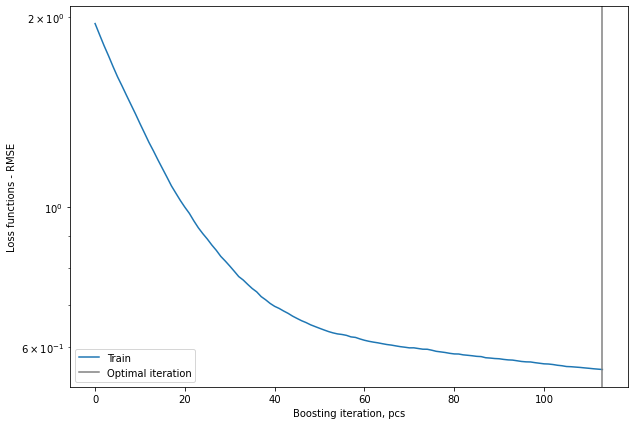

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.80
RMSE: 0.6
Relative RMSE(%):  0.240
MSE: 0.3
R square: 64.6%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.980
a1: 0.571
R^2: 0.657
Uncertainty
a0: 0.98+/-0.07
a1: 0.571+/-0.029


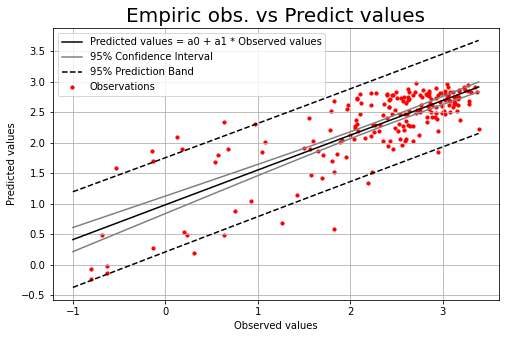

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

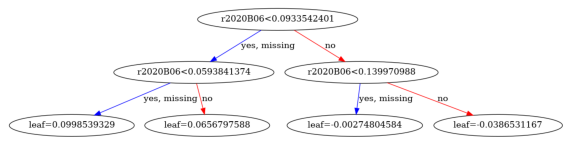

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

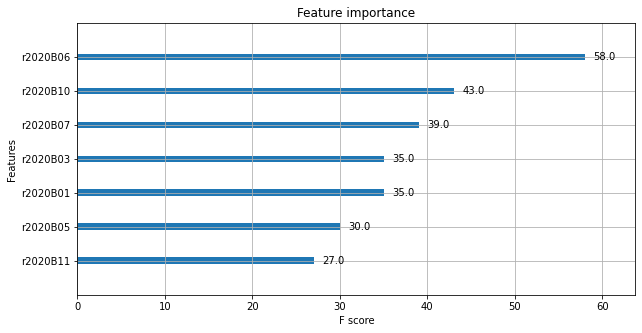

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

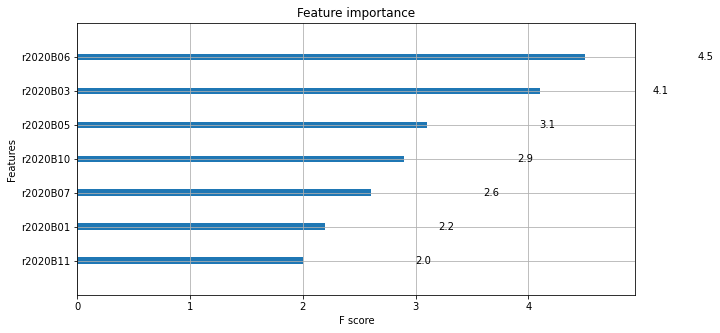

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

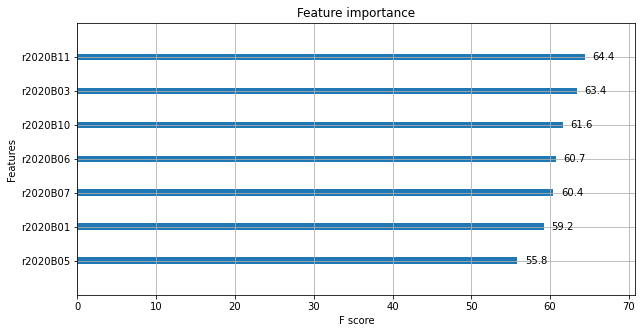

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


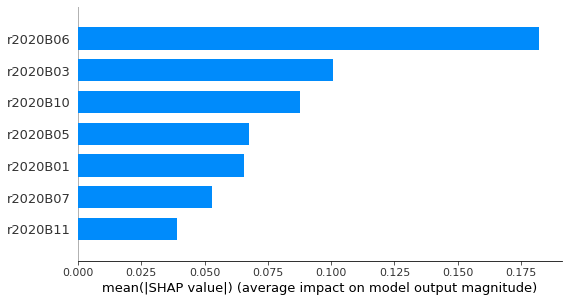

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

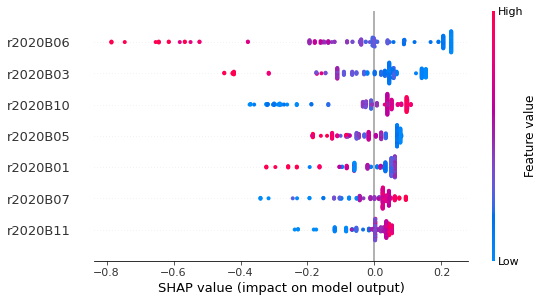

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

invalid value encountered in true_divide
invalid value encountered in true_divide


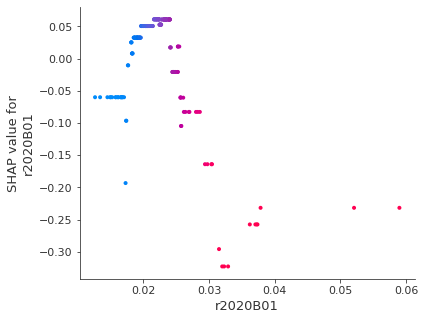

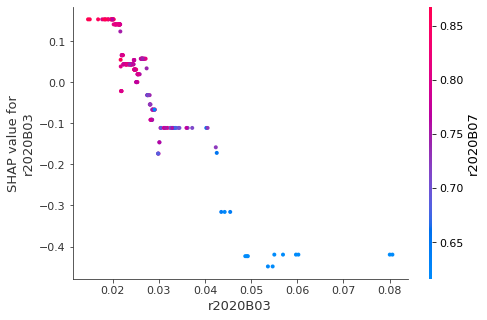

invalid value encountered in true_divide
invalid value encountered in true_divide


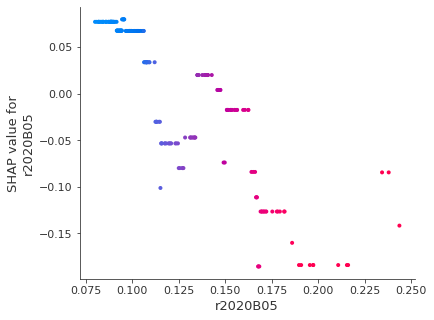

invalid value encountered in true_divide
invalid value encountered in true_divide


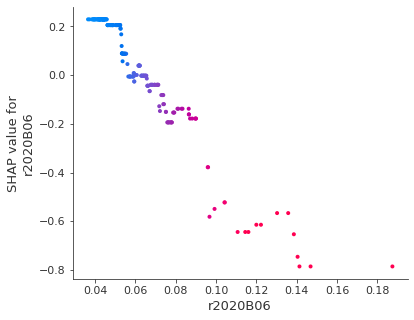

invalid value encountered in true_divide
invalid value encountered in true_divide


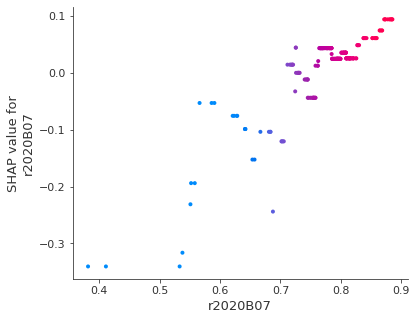

invalid value encountered in true_divide
invalid value encountered in true_divide


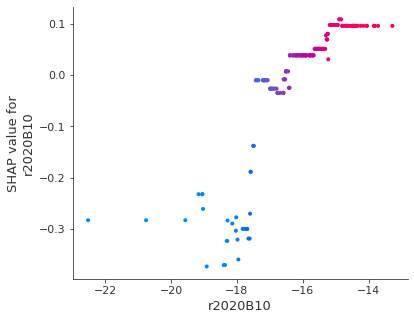

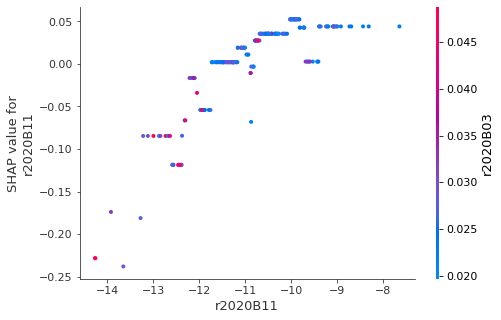

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [47]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_AG_biomass_Sentinel_data_2020.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_AG_biomass_Sentinel_data_2020.txt")